In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Gathering

In [2]:
df=pd.read_csv('damage_grade.csv')
df

Unnamed: 0      area_assesed  building_id damage_grade  district_id  \
0            4237              Both  23c156192c6      Grade 3           24   
1            2966              Both  1d77e67676c      Grade 3           20   
2            5682              Both  2bcd7588b13      Grade 2           30   
3           44764  Building removed  27d4a422391      Grade 5           27   
4           18744              Both  2381eea64b2      Grade 4           24   
...           ...               ...          ...          ...          ...   
49995       47636          Exterior  2755de9c258      Grade 5           27   
49996       12168              Both  37f03d4b2f6      Grade 1           38   
49997       34885              Both  3313e1930cd      Grade 3           35   
49998       23618          Exterior  1edd99fb9e2      Grade 5           21   
49999       32660  Building removed  2d67348b8ba      Grade 5           31   

       has_geotechnical_risk  has_geotechnical_risk_fault_crack  \
0                        0.0                                  0   
1                        0.0                                  0   
2                        0.0                                  0   
3                        0.0                                  0   
4                        0.0                                  0   
...                      ...                                ...   
49995                    0.0                                  0   
49996                    0.0                                  0   
49997                    0.0                                  0   
49998                    1.0                                  0   
49999                    0.0                                  0   

       has_geotechnical_risk_flood  has_geotechnical_risk_land_settlement  \
0                                0                                      0   
1                                0                                      0   
2                                0                                      0   
3                                0                                      0   
4                                0                                      0   
...                            ...                                    ...   
49995                            0                                      0   
49996                            0                                      0   
49997                            0                                      0   
49998                            0                                      0   
49999                            0                                      0   

       has_geotechnical_risk_landslide  ...  has_superstructure_stone_flag  \
0                                    0  ...                            0.0   
1                                    0  ...                            0.0   
2                                    0  ...                            0.0   
3                                    0  ...                            0.0   
4                                    0  ...                            0.0   
...                                ...  ...                            ...   
49995                                0  ...                            0.0   
49996                                0  ...                            0.0   
49997                                0  ...                            0.0   
49998                                0  ...                            0.0   
49999                                0  ...                            0.0   

       has_superstructure_cement_mortar_stone  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
49995                                     0.0   
49996      

# Problem Statement

This project is Determing the degree that is done to  buildings,
thus when an earthquake occur we can help identify safe and unsafe buildings, 
thus avoiding death and injuries resulting from earthquakes.
Power of machine learning potentially prevent massive loss of lives while simultaneously making rescue efforts easy and efficient,
for reducing the destruction and damage caused to buildings by earthquakes.
The model which is built in this project will help in reducing the destruction and loss of human lives.
The damage to a building is catrgorized into five grades, Each grade depicts the amount of damage caused to buildings after an earthquake.

Requirement Specification (benifit of client after creating an model):

>> This Project will help to "Predict the loss" or damage caused to buildings during earthquakes.
>> It will help " to save the cost to recover" damage done to offices, colleges, schools, hospitals, etc.
>> It will " Save the human lives" by predicting the grade of the buildings.
>> "Necessary efforts" can be done on building "After grade estimation to rescue it" from earthquacks.
>> This project uses machine learning algorithms like Random Forest , KNN, adaboost, etc.
    which helps in training and testing the model, evaluating the performance of the model. Based on the performance
    or efficiency of the model, we can decide whether the result is accurate or not.
>> It will "save the cost of constructing buildings" again by making " rescue efforts easy and efficient".
>> It will "Prevent Possible damage" caused by the "volcanic eruptions" due to earthquackes.
>> It "maintains the economy" of the country by " saving the money" required for "rebuilding".

In this Level DFD we can further classify the prediction of grade into five categories. They are:
    Grade 1(Minor) => There is light or no damage to walls of the building
    Grade 2(Medium) => There is flexural cracks on non-structural walls
    Grade 3(Major) => There is damage on buildings due to accidental affects
    Grade 4(Partial collapse) => There is some part of the building which is collapsed
    Grade 5(Total collapse) => There is significant damage to shear walls and entire building is collapsed.

The pre-processing techniques used for data preparation are:
    i. Conversion of the data: The categorical and ordinal data is to be converted into numeric values 
        because machine learning models can only handle numeric values.
    ii. Ignoring the missing values: If the dataset contains missing data, we can remove that row or column
        which contains missing values. It is an efficient method but if there is a lot of missing data in the dataset 
        then it should not be performed.
    iii. filling the missing value: we can fill the missing values manually by choosing the mean , median. etc
    iv. Machine Learning : we can also make predictions by using the existing data and fill the missing values in the 
        dataset.
    v. Outliers detection:There can be some error data present in the dataset which diverge our attention from other 
        values in the dataset
        

# Explolatory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              50000 non-null  int64  
 1   area_assesed                            50000 non-null  object 
 2   building_id                             50000 non-null  object 
 3   damage_grade                            50000 non-null  object 
 4   district_id                             50000 non-null  int64  
 5   has_geotechnical_risk                   50000 non-null  float64
 6   has_geotechnical_risk_fault_crack       50000 non-null  int64  
 7   has_geotechnical_risk_flood             50000 non-null  int64  
 8   has_geotechnical_risk_land_settlement   50000 non-null  int64  
 9   has_geotechnical_risk_landslide         50000 non-null  int64  
 10  has_geotechnical_risk_liquefaction      50000 non-null  in

In [4]:
print('number of rows :',df.shape[0])
print('number of columns :',df.shape[1])

number of rows : 50000
number of columns : 54


In [5]:
df.columns

Index(['Unnamed: 0', 'area_assesed', 'building_id', 'damage_grade',
       'district_id', 'has_geotechnical_risk',
       'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'has_repair_started', 'vdcmun_id', 'ward_id', 'legal_ownership_status',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_s

In [6]:
df['Unnamed: 0'].nunique()

50000

### find unique values

In [7]:
for i in df.columns:
    print(i, '>>>' , df[i].nunique())

Unnamed: 0 >>> 50000
area_assesed >>> 5
building_id >>> 50000
damage_grade >>> 5
district_id >>> 31
has_geotechnical_risk >>> 2
has_geotechnical_risk_fault_crack >>> 2
has_geotechnical_risk_flood >>> 2
has_geotechnical_risk_land_settlement >>> 2
has_geotechnical_risk_landslide >>> 2
has_geotechnical_risk_liquefaction >>> 2
has_geotechnical_risk_other >>> 2
has_geotechnical_risk_rock_fall >>> 2
has_repair_started >>> 2
vdcmun_id >>> 1330
ward_id >>> 9237
legal_ownership_status >>> 4
count_families >>> 10
has_secondary_use >>> 2
has_secondary_use_agriculture >>> 2
has_secondary_use_hotel >>> 2
has_secondary_use_rental >>> 2
has_secondary_use_institution >>> 2
has_secondary_use_school >>> 2
has_secondary_use_industry >>> 2
has_secondary_use_health_post >>> 2
has_secondary_use_gov_office >>> 2
has_secondary_use_use_police >>> 2
has_secondary_use_other >>> 2
count_floors_pre_eq >>> 8
count_floors_post_eq >>> 9
age_building >>> 136
plinth_area_sq_ft >>> 1209
height_ft_pre_eq >>> 54
height_ft

### Find null values

In [8]:
for i in df.columns:
    print(i, '>>>',df[i].isna().sum())

Unnamed: 0 >>> 0
area_assesed >>> 0
building_id >>> 0
damage_grade >>> 0
district_id >>> 0
has_geotechnical_risk >>> 0
has_geotechnical_risk_fault_crack >>> 0
has_geotechnical_risk_flood >>> 0
has_geotechnical_risk_land_settlement >>> 0
has_geotechnical_risk_landslide >>> 0
has_geotechnical_risk_liquefaction >>> 0
has_geotechnical_risk_other >>> 0
has_geotechnical_risk_rock_fall >>> 0
has_repair_started >>> 2606
vdcmun_id >>> 0
ward_id >>> 0
legal_ownership_status >>> 0
count_families >>> 1
has_secondary_use >>> 0
has_secondary_use_agriculture >>> 0
has_secondary_use_hotel >>> 0
has_secondary_use_rental >>> 0
has_secondary_use_institution >>> 0
has_secondary_use_school >>> 0
has_secondary_use_industry >>> 0
has_secondary_use_health_post >>> 0
has_secondary_use_gov_office >>> 0
has_secondary_use_use_police >>> 0
has_secondary_use_other >>> 0
count_floors_pre_eq >>> 0
count_floors_post_eq >>> 0
age_building >>> 0
plinth_area_sq_ft >>> 0
height_ft_pre_eq >>> 0
height_ft_post_eq >>> 0
land

In [9]:
# has_repair_started >>> 2606

In [10]:
(2606/50000)*100

5.212

In [11]:
df[['has_repair_started']]

has_repair_started
0                     0.0
1                     0.0
2                     1.0
3                     1.0
4                     0.0
...                   ...
49995                 0.0
49996                 0.0
49997                 0.0
49998                 0.0
49999                 1.0

[50000 rows x 1 columns]

In [12]:
df[['has_repair_started']].isna().sum()

has_repair_started    2606
dtype: int64

In [13]:
df['has_repair_started'].mode()

0    0.0
dtype: float64

In [14]:
df.sample(10)

Unnamed: 0         area_assesed   building_id damage_grade  \
3150        44808                 Both   1d4ef54c1e8      Grade 2   
13167       30901     Building removed   28261d2e7e8      Grade 5   
32667        2337     Building removed   297d234fc78      Grade 5   
49345       30813     Building removed   33713300d32      Grade 5   
14157       18899                 Both   2c103761d0a      Grade 2   
5207        14764                 Both  16e470c0ccdf      Grade 4   
17128       41466     Building removed   28f6c446c09      Grade 5   
30303       35431  Not able to inspect   28dcf387e8b      Grade 5   
21161        9023             Exterior  220d39d35baf      Grade 5   
30006       16390     Building removed   224cc523aef      Grade 5   

       district_id  has_geotechnical_risk  has_geotechnical_risk_fault_crack  \
3150            20                    0.0                                  0   
13167           27                    0.0                                  0   
32667           28                    1.0                                  0   
49345           35                    0.0                                  0   
14157           30                    0.0                                  0   
5207            25                    0.0                                  0   
17128           28                    0.0                                  0   
30303           28                    0.0                                  0   
21161           37                    1.0                                  1   
30006           23                    0.0                                  0   

       has_geotechnical_risk_flood  has_geotechnical_risk_land_settlement  \
3150                             0                                      0   
13167                            0                                      0   
32667                            0                                      0   
49345                            0                                      0   
14157                            0                                      0   
5207                             0                                      0   
17128                            0                                      0   
30303                            0                                      0   
21161                            0                                      1   
30006                            0                                      0   

       has_geotechnical_risk_landslide  ...  has_superstructure_stone_flag  \
3150                                 0  ...                            0.0   
13167                                0  ...                            0.0   
32667                                1  ...                            0.0   
49345                                0  ...                            0.0   
14157                                0  ...                            0.0   
5207                                 0  ...                            0.0   
17128                                0  ...                            0.0   
30303                                0  ...                            0.0   
21161                                0  ...                            1.0   
30006                                0  ...                            0.0   

       has_superstructure_cement_mortar_stone  \
3150                                      0.0   
13167                                     0.0   
32667                                     0.0   
49345                                     0.0   
14157                                     0.0   
5207                                      0.0   
17128                                     0.0   
30303                                     0.0   
21161                                     0.0   
30006                                     1.0   

       has_superstructure_mud_mortar_brick  \
3150                                   0.0   
13167                      

In [15]:
for i in df.columns:
    print(i ,'>>>',df[i].unique())
    print('*'*50)

Unnamed: 0 >>> [ 4237  2966  5682 ... 34885 23618 32660]
**************************************************
area_assesed >>> ['Both' 'Building removed' 'Exterior' 'Interior' 'Not able to inspect']
**************************************************
building_id >>> ['23c156192c6' '1d77e67676c' '2bcd7588b13' ... '3313e1930cd' '1edd99fb9e2'
 '2d67348b8ba']
**************************************************
damage_grade >>> ['Grade 3' 'Grade 2' 'Grade 5' 'Grade 4' 'Grade 1']
**************************************************
district_id >>> [24 20 30 27 26 21 23 37 31 25 28 36 22 12 35 46 13 11 47 40 38  7 10 44
  9 39 29 45 43 51 48]
**************************************************
has_geotechnical_risk >>> [0. 1.]
**************************************************
has_geotechnical_risk_fault_crack >>> [0 1]
**************************************************
has_geotechnical_risk_flood >>> [0 1]
**************************************************
has_geotechnical_risk_land_settlement >>> 

In [16]:
df.columns

Index(['Unnamed: 0', 'area_assesed', 'building_id', 'damage_grade',
       'district_id', 'has_geotechnical_risk',
       'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'has_repair_started', 'vdcmun_id', 'ward_id', 'legal_ownership_status',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_s

## Unnamed: 0

In [17]:
df[['Unnamed: 0']]

Unnamed: 0
0            4237
1            2966
2            5682
3           44764
4           18744
...           ...
49995       47636
49996       12168
49997       34885
49998       23618
49999       32660

[50000 rows x 1 columns]

In [18]:
df[['Unnamed: 0']].nunique()

Unnamed: 0    50000
dtype: int64

All values are unique values so we have to drop it

## area_assesed

Indicates the nature of the damage assessment in terms of the areas of the building that were assessed

In [19]:
df[['area_assesed']]

area_assesed
0                  Both
1                  Both
2                  Both
3      Building removed
4                  Both
...                 ...
49995          Exterior
49996              Both
49997              Both
49998          Exterior
49999  Building removed

[50000 rows x 1 columns]

In [20]:
df[['area_assesed']].nunique()

area_assesed    5
dtype: int64

In [21]:
df.area_assesed.unique()

array(['Both', 'Building removed', 'Exterior', 'Interior',
       'Not able to inspect'], dtype=object)

In [22]:
df.area_assesed.isna().sum()

0

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='area_assesed', ylabel='damage_grade'>

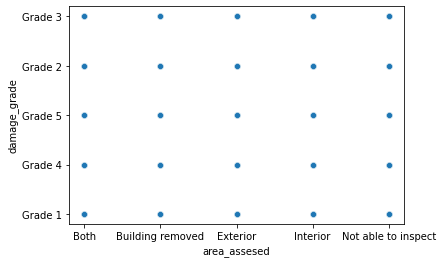

In [24]:
sns.scatterplot(x=df.area_assesed,y=df.damage_grade)

## building_id

In [25]:
df[['building_id']]

building_id
0      23c156192c6
1      1d77e67676c
2      2bcd7588b13
3      27d4a422391
4      2381eea64b2
...            ...
49995  2755de9c258
49996  37f03d4b2f6
49997  3313e1930cd
49998  1edd99fb9e2
49999  2d67348b8ba

[50000 rows x 1 columns]

In [26]:
df.building_id.nunique()

50000

All are unique values so we have to remove it

## damage_grade

Damage grade assigned to the building after assessement(target variable)

In [27]:
df[['damage_grade']]

damage_grade
0          Grade 3
1          Grade 3
2          Grade 2
3          Grade 5
4          Grade 4
...            ...
49995      Grade 5
49996      Grade 1
49997      Grade 3
49998      Grade 5
49999      Grade 5

[50000 rows x 1 columns]

In [28]:
df.damage_grade.nunique()

5

In [29]:
df.damage_grade.unique()

array(['Grade 3', 'Grade 2', 'Grade 5', 'Grade 4', 'Grade 1'],
      dtype=object)

In [30]:
df.damage_grade.value_counts()

Grade 5    16670
Grade 4    11926
Grade 3     9671
Grade 2     6898
Grade 1     4835
Name: damage_grade, dtype: int64

In [31]:
df.damage_grade.isna().sum()

0

No null values object datatype: required encoding(nominal datasets) 5 unique: ['Grade 3', 'Grade 2', 'Grade 5', 'Grade 4', 'Grade 1']

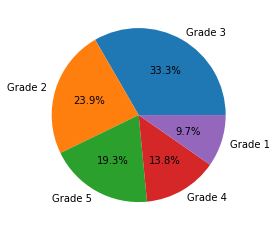

In [32]:
plt.pie(df.damage_grade.value_counts(),autopct='%1.1f%%',labels=df.damage_grade.unique())
plt.show()

## district_id

District where the building is located

In [33]:
df.district_id.unique()

array([24, 20, 30, 27, 26, 21, 23, 37, 31, 25, 28, 36, 22, 12, 35, 46, 13,
       11, 47, 40, 38,  7, 10, 44,  9, 39, 29, 45, 43, 51, 48],
      dtype=int64)

In [34]:
df.district_id.nunique()

31

In [35]:
df.district_id.isna().sum()

0

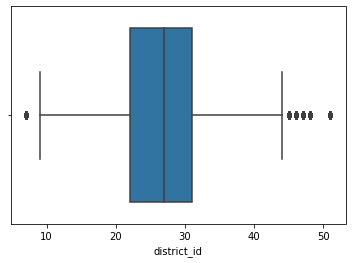

In [36]:
sns.boxplot(df.district_id)
plt.show()

## has_geotechnical_risk

Indicates if building has geotechnical risks

In [37]:
df.has_geotechnical_risk.unique()

array([0., 1.])

In [38]:
df.has_geotechnical_risk.nunique()

2

In [39]:
df.has_geotechnical_risk.value_counts()

0.0    43829
1.0     6171
Name: has_geotechnical_risk, dtype: int64

In [40]:
df.has_geotechnical_risk.isna().sum()

0

encoding is done 0 have more weightage

## has_geotechnical_risk_fault_crack

In [41]:
df.has_geotechnical_risk_fault_crack

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: has_geotechnical_risk_fault_crack, Length: 50000, dtype: int64

In [42]:
df.has_geotechnical_risk_fault_crack.unique()

array([0, 1], dtype=int64)

In [43]:
df.has_geotechnical_risk_fault_crack.nunique()

2

In [44]:
df.has_geotechnical_risk_fault_crack.value_counts()

0    47862
1     2138
Name: has_geotechnical_risk_fault_crack, dtype: int64

In [45]:
df.has_geotechnical_risk_fault_crack.isna().sum()

0

## has_geotechnical_risk_flood

Indicates if building has geotechnical risks related to flood

In [46]:
def get_info(column):
    print('unique are :', df[column].unique())
    print('_'*50)
    print('nunique are :', df[column].nunique())
    print('_'*50)
    print(df[column].value_counts())
    print('-'*50)
    print('null value are :',df[column].isna().sum())
    print('_'*50)

In [47]:
get_info('has_geotechnical_risk_flood')

unique are : [0 1]
__________________________________________________
nunique are : 2
__________________________________________________
0    49553
1      447
Name: has_geotechnical_risk_flood, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


## has_geotechnical_risk_land_settlement

In [48]:
get_info("has_geotechnical_risk_land_settlement")

unique are : [0 1]
__________________________________________________
nunique are : 2
__________________________________________________
0    48280
1     1720
Name: has_geotechnical_risk_land_settlement, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


## has_geotechnical_risk_landslide

In [49]:
df.columns[9]

'has_geotechnical_risk_landslide'

In [50]:
get_info("has_geotechnical_risk_landslide")

unique are : [0 1]
__________________________________________________
nunique are : 2
__________________________________________________
0    46504
1     3496
Name: has_geotechnical_risk_landslide, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


## has_geotechnical_risk_liquefaction

In [51]:
df.columns[10]

'has_geotechnical_risk_liquefaction'

In [52]:
get_info('has_geotechnical_risk_liquefaction')

unique are : [0 1]
__________________________________________________
nunique are : 2
__________________________________________________
0    49899
1      101
Name: has_geotechnical_risk_liquefaction, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


## has_geotechnical_risk_other

In [53]:
df.columns[11]

'has_geotechnical_risk_other'

In [54]:
get_info(df.columns[11])

unique are : [0 1]
__________________________________________________
nunique are : 2
__________________________________________________
0    49956
1       44
Name: has_geotechnical_risk_other, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


## has_geotechnical_risk_rock_fall

In [55]:
df.columns[12]

'has_geotechnical_risk_rock_fall'

In [56]:
get_info(df.columns[12])

unique are : [0 1]
__________________________________________________
nunique are : 2
__________________________________________________
0    48291
1     1709
Name: has_geotechnical_risk_rock_fall, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


## has_repair_started

In [57]:
df.columns[13]

'has_repair_started'

In [58]:
get_info(df.columns[13])

unique are : [ 0.  1. nan]
__________________________________________________
nunique are : 2
__________________________________________________
0.0    32384
1.0    15010
Name: has_repair_started, dtype: int64
--------------------------------------------------
null value are : 2606
__________________________________________________


## vdcmun_id

Municipality where the building is located

In [59]:
df.columns[14]

'vdcmun_id'

In [60]:
get_info(df.columns[14])

unique are : [2457 2025 3010 ...  929 5103 1002]
__________________________________________________
nunique are : 1330
__________________________________________________
3120    813
2025    453
2731    413
3650    376
2603    375
       ... 
925       1
4547      1
4543      1
1002      1
4507      1
Name: vdcmun_id, Length: 1330, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


<AxesSubplot:xlabel='vdcmun_id'>

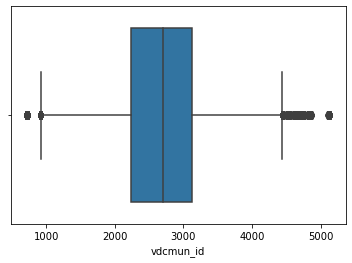

In [61]:
sns.boxplot(df.vdcmun_id)

<AxesSubplot:xlabel='vdcmun_id', ylabel='Density'>

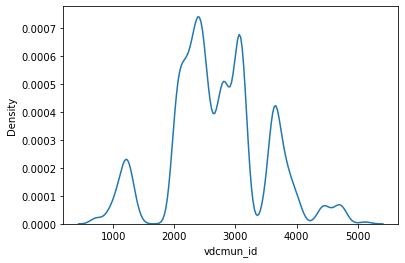

In [62]:
sns.kdeplot(df.vdcmun_id)

Not unique values . Outliers are present(need to remove outliers: IQR ) not normally distributed(scaling: minmaxscaler)

## ward_id

In [63]:
df.columns[15]

'ward_id'

In [64]:
get_info(df.columns[15])

unique are : [245708 202505 301009 ... 124005 242003 100203]
__________________________________________________
nunique are : 9237
__________________________________________________
312005    123
312004    118
312008     93
312011     92
312009     90
         ... 
241506      1
132304      1
473404      1
383705      1
472002      1
Name: ward_id, Length: 9237, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


<AxesSubplot:xlabel='ward_id'>

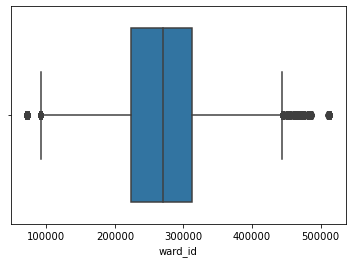

In [65]:
sns.boxplot(df.ward_id)

<AxesSubplot:xlabel='ward_id', ylabel='Density'>

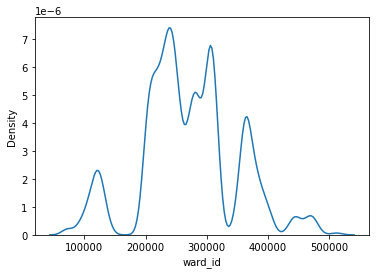

In [66]:
sns.kdeplot(df.ward_id)

Not unique values . Outliers are present(need to remove outliers: IQR ) not normally distributed(scaling: minmaxscaler)

## legal_ownership_status

In [67]:
df.columns[16]

'legal_ownership_status'

In [68]:
get_info(df.columns[16])

unique are : ['Private' 'Public' 'Other' 'Institutional']
__________________________________________________
nunique are : 4
__________________________________________________
Private          48060
Public            1158
Institutional      480
Other              302
Name: legal_ownership_status, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


Categorial data present unique values : ['Private' 'Public' 'Other' 'Institutional'] encoding required: nominal data: onehotencoding,getdummies

## count_families

In [69]:
df.columns[17]

'count_families'

In [70]:
get_info('count_families')

unique are : [ 1.  2.  3.  0.  4.  5.  7.  9.  6. 11. nan]
__________________________________________________
nunique are : 10
__________________________________________________
1.0     43260
0.0      4136
2.0      2201
3.0       304
4.0        70
5.0        19
6.0         5
9.0         2
7.0         1
11.0        1
Name: count_families, dtype: int64
--------------------------------------------------
null value are : 1
__________________________________________________


<AxesSubplot:xlabel='count_families'>

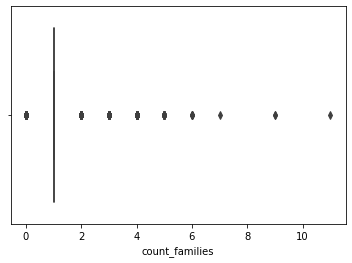

In [71]:
sns.boxplot(df.count_families)

<AxesSubplot:xlabel='count_families', ylabel='Density'>

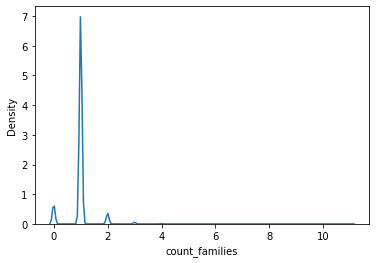

In [72]:
sns.kdeplot(df.count_families)

Nan value present highly bias dataset are 1 count families are more outliers are present

## has_secondary_use

In [73]:
df.columns[18]

'has_secondary_use'

In [74]:
get_info('has_secondary_use')

unique are : [0. 1.]
__________________________________________________
nunique are : 2
__________________________________________________
0.0    44360
1.0     5640
Name: has_secondary_use, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


## has_secondary_use_agriculture

In [75]:
df.columns[19]

'has_secondary_use_agriculture'

In [76]:
get_info('has_secondary_use_agriculture')

unique are : [0 1]
__________________________________________________
nunique are : 2
__________________________________________________
0    46764
1     3236
Name: has_secondary_use_agriculture, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


## has_secondary_use_hotel

In [77]:
df.columns[20]

'has_secondary_use_hotel'

In [78]:
get_info('has_secondary_use_hotel')

unique are : [0 1]
__________________________________________________
nunique are : 2
__________________________________________________
0    48302
1     1698
Name: has_secondary_use_hotel, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


## has_secondary_use_rental

In [79]:
df.columns[21]

'has_secondary_use_rental'

In [80]:
get_info('has_secondary_use_rental')

unique are : [0 1]
__________________________________________________
nunique are : 2
__________________________________________________
0    49574
1      426
Name: has_secondary_use_rental, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


## has_secondary_use_institution

In [81]:
df.columns[22]

'has_secondary_use_institution'

In [82]:
get_info('has_secondary_use_institution')

unique are : [0 1]
__________________________________________________
nunique are : 2
__________________________________________________
0    49954
1       46
Name: has_secondary_use_institution, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


## has_secondary_use_school

In [83]:
df.columns[23]

'has_secondary_use_school'

In [84]:
get_info('has_secondary_use_school')

unique are : [0 1]
__________________________________________________
nunique are : 2
__________________________________________________
0    49974
1       26
Name: has_secondary_use_school, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


## has_secondary_use_industry

In [85]:
df.columns[24]

'has_secondary_use_industry'

In [86]:
get_info('has_secondary_use_industry')

unique are : [0 1]
__________________________________________________
nunique are : 2
__________________________________________________
0    49934
1       66
Name: has_secondary_use_industry, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


## has_secondary_use_health_post

In [87]:
df.columns[25]

'has_secondary_use_health_post'

In [88]:
get_info('has_secondary_use_health_post')

unique are : [0 1]
__________________________________________________
nunique are : 2
__________________________________________________
0    49991
1        9
Name: has_secondary_use_health_post, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


## has_secondary_use_gov_office

In [89]:
df.columns[26]

'has_secondary_use_gov_office'

In [90]:
get_info('has_secondary_use_gov_office')

unique are : [0 1]
__________________________________________________
nunique are : 2
__________________________________________________
0    49991
1        9
Name: has_secondary_use_gov_office, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


## has_secondary_use_use_police

In [91]:
df.columns[27]

'has_secondary_use_use_police'

In [92]:
get_info('has_secondary_use_use_police')

unique are : [0 1]
__________________________________________________
nunique are : 2
__________________________________________________
0    49994
1        6
Name: has_secondary_use_use_police, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


## has_secondary_use_other

In [93]:
df.columns[28]

'has_secondary_use_other'

In [94]:
get_info('has_secondary_use_other')

unique are : [0 1]
__________________________________________________
nunique are : 2
__________________________________________________
0    49758
1      242
Name: has_secondary_use_other, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


## count_floors_pre_eq

In [95]:
df.columns[29]

'count_floors_pre_eq'

In [96]:
get_info('count_floors_pre_eq')

unique are : [1 2 3 4 5 6 7 9]
__________________________________________________
nunique are : 8
__________________________________________________
2    30095
3    10624
1     7790
4     1038
5      412
6       38
7        2
9        1
Name: count_floors_pre_eq, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


<AxesSubplot:xlabel='count_floors_pre_eq'>

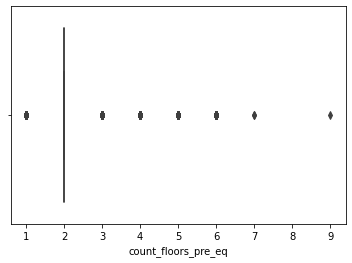

In [97]:
sns.boxplot(df.count_floors_pre_eq)

## count_floors_post_eq

In [98]:
df.columns[30]

'count_floors_post_eq'

In [99]:
get_info('count_floors_post_eq')

unique are : [1 2 0 3 4 5 6 7 9]
__________________________________________________
nunique are : 9
__________________________________________________
2    19913
0    15807
1     8662
3     4692
4      640
5      248
6       35
7        2
9        1
Name: count_floors_post_eq, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


<AxesSubplot:xlabel='count_floors_post_eq'>

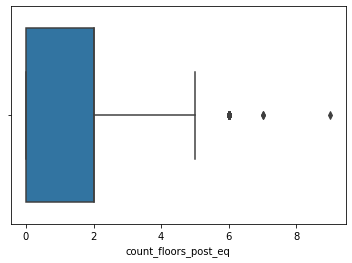

In [100]:
sns.boxplot(df.count_floors_post_eq)

<AxesSubplot:xlabel='count_floors_post_eq', ylabel='Density'>

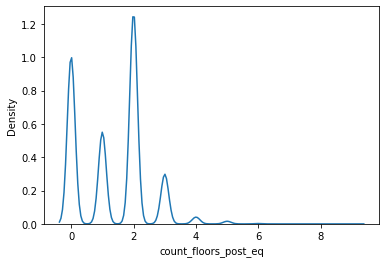

In [101]:
sns.kdeplot(df.count_floors_post_eq)

## age_building

In [102]:
df.columns[31]

'age_building'

In [103]:
get_info('age_building')

unique are : [ 20  10   2   8  22  43   3  50   7  15  13  11  12  19  35  32  70  18
   5  56   9  25  14  28  17  30  54   6   1  97  27  23  16   4  40  42
  85   0 999  21  36  34  24  37  80  26  98  44  45  31  73 100  60  52
  48  33  87  51 101  83  47  59  49  90  58  38  29  41  46  75  55  65
  95  66  82  71 105  64 110  84  53  39 102  99  89 125  62  68  67  63
  86  61  88  57 172  78  76 104 120  72 200 170 106 150 173  69 190  92
  74  93  91  96 164 130  79 140 103  81 196 113 107 112 111  77 145 124
 135 142 133 160 115 108 123 180  94 114]
__________________________________________________
nunique are : 136
__________________________________________________
15     3215
20     3120
25     2651
10     2460
30     2159
       ... 
106       1
173       1
172       1
108       1
133       1
Name: age_building, Length: 136, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


<AxesSubplot:xlabel='age_building', ylabel='Density'>

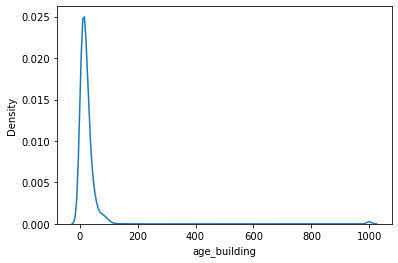

In [104]:
sns.kdeplot(df.age_building)

<AxesSubplot:xlabel='age_building'>

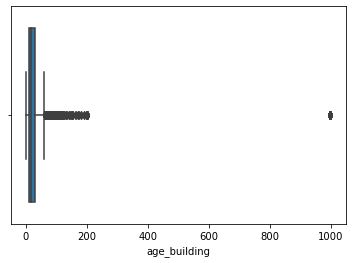

In [105]:
sns.boxplot(df.age_building)

In [106]:
df.columns[32]

'plinth_area_sq_ft'

In [107]:
get_info('height_ft_post_eq')

unique are : [ 8 20  6  0 14 18  9 28 11 15 19 10 16 17 12 36 22 21 13 31  7 30 24 50
 23 38 40 25 35 32 27 45 26 65 54 60 33 42 29 47 37 34 48 75 44 52 39 99
 63 41 51 43]
__________________________________________________
nunique are : 52
__________________________________________________
0     15807
14     4203
18     3504
12     3303
16     3251
15     2210
20     1924
10     1834
8      1732
7      1648
9      1598
13     1195
6      1109
17     1052
21     1028
24      785
22      730
11      582
27      390
19      390
25      378
30      352
28      183
23      154
36      128
40      118
32      108
35       66
26       64
45       56
50       16
33       13
38       11
34       11
54       11
29       10
48        7
31        7
42        6
37        6
44        5
60        5
99        1
41        1
39        1
47        1
43        1
75        1
52        1
51        1
65        1
63        1
Name: height_ft_post_eq, dtype: int64
----------------------------------------------

<AxesSubplot:xlabel='height_ft_post_eq', ylabel='Density'>

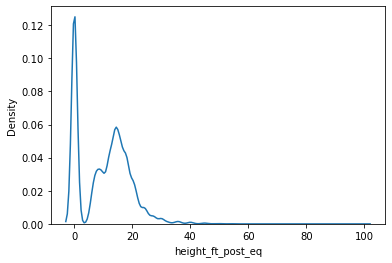

In [108]:
sns.kdeplot(df.height_ft_post_eq)

<AxesSubplot:xlabel='height_ft_post_eq'>

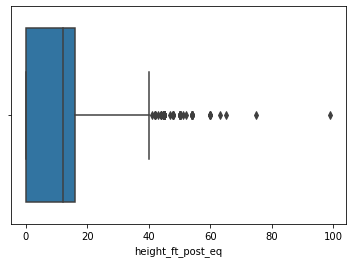

In [109]:
sns.boxplot(df.height_ft_post_eq)

## height_ft_pre_eq

In [110]:
df.columns[33]

'height_ft_pre_eq'

In [111]:
get_info('height_ft_pre_eq')

unique are : [ 8 20  6 14 12 18 17  9 21 28 16 11 15 10 36 22 13 19  7 31 24 25 30 50
 23 38 40 35 29 27 32 42 45 26 34 65 55 54 99 60 33 37 48 52 39 44 63 49
 41 72 51 43 47 46]
__________________________________________________
nunique are : 54
__________________________________________________
14    6465
18    6324
16    5113
12    5002
15    3547
20    3134
21    2416
10    1982
17    1702
13    1680
24    1623
9     1523
8     1506
22    1262
7     1180
19     745
25     744
11     659
6      631
27     617
30     582
28     292
23     287
32     187
40     156
36     149
35     138
26     110
45      59
33      25
29      20
99      19
31      18
34      17
50      16
54      13
38      12
48       9
42       8
37       6
60       5
44       4
49       2
65       1
39       1
55       1
52       1
51       1
72       1
41       1
43       1
47       1
46       1
63       1
Name: height_ft_pre_eq, dtype: int64
--------------------------------------------------
null value are : 0
_

<AxesSubplot:xlabel='height_ft_pre_eq', ylabel='Density'>

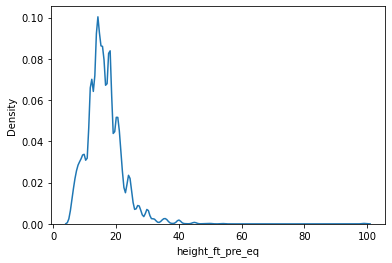

In [112]:
sns.kdeplot(df.height_ft_pre_eq)

<AxesSubplot:xlabel='height_ft_pre_eq'>

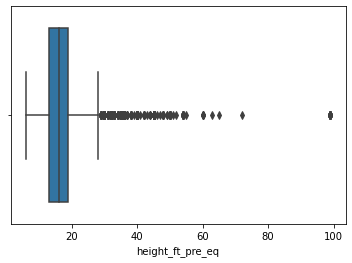

In [113]:
sns.boxplot(df.height_ft_pre_eq)

In [114]:
df.columns[34]

'height_ft_post_eq'

In [115]:
get_info('height_ft_post_eq')

unique are : [ 8 20  6  0 14 18  9 28 11 15 19 10 16 17 12 36 22 21 13 31  7 30 24 50
 23 38 40 25 35 32 27 45 26 65 54 60 33 42 29 47 37 34 48 75 44 52 39 99
 63 41 51 43]
__________________________________________________
nunique are : 52
__________________________________________________
0     15807
14     4203
18     3504
12     3303
16     3251
15     2210
20     1924
10     1834
8      1732
7      1648
9      1598
13     1195
6      1109
17     1052
21     1028
24      785
22      730
11      582
27      390
19      390
25      378
30      352
28      183
23      154
36      128
40      118
32      108
35       66
26       64
45       56
50       16
33       13
38       11
34       11
54       11
29       10
48        7
31        7
42        6
37        6
44        5
60        5
99        1
41        1
39        1
47        1
43        1
75        1
52        1
51        1
65        1
63        1
Name: height_ft_post_eq, dtype: int64
----------------------------------------------

<AxesSubplot:xlabel='height_ft_post_eq', ylabel='Density'>

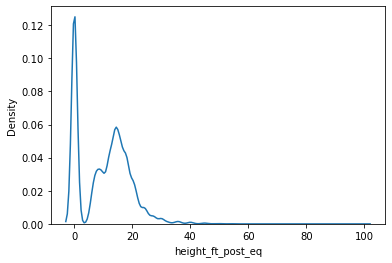

In [116]:
sns.kdeplot(df.height_ft_post_eq)

<AxesSubplot:xlabel='height_ft_post_eq'>

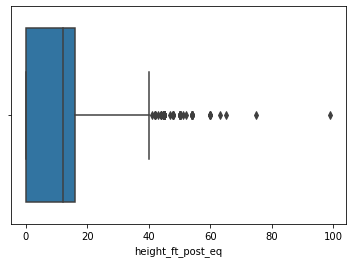

In [117]:
sns.boxplot(df.height_ft_post_eq)

## land_surface_condition

In [118]:
df.columns[35]

'land_surface_condition'

In [119]:
get_info('land_surface_condition')

unique are : ['Flat' 'Steep slope' 'Moderate slope']
__________________________________________________
nunique are : 3
__________________________________________________
Flat              41587
Moderate slope     6864
Steep slope        1549
Name: land_surface_condition, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


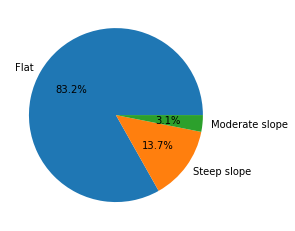

In [120]:
plt.pie(df.land_surface_condition.value_counts(),autopct='%1.1f%%',labels=df.land_surface_condition.unique())
plt.show()

## foundation_type

In [121]:
df.columns[36]

'foundation_type'

In [122]:
get_info('foundation_type')

unique are : ['Mud mortar-Stone/Brick' 'Cement-Stone/Brick' 'RC' 'Bamboo/Timber'
 'Other']
__________________________________________________
nunique are : 5
__________________________________________________
Mud mortar-Stone/Brick    42023
Bamboo/Timber              2871
Cement-Stone/Brick         2755
RC                         2044
Other                       307
Name: foundation_type, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


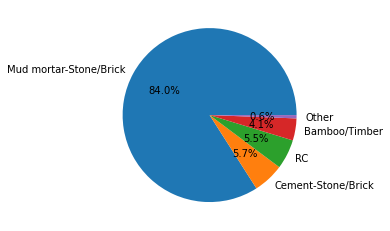

In [123]:
plt.pie(df.foundation_type.value_counts(),autopct='%1.1f%%',labels=df.foundation_type.unique())
plt.show()

## roof_type

In [124]:
df.columns[37]

'roof_type'

In [125]:
get_info('roof_type')

unique are : ['Bamboo/Timber-Light roof' 'Bamboo/Timber-Heavy roof' 'RCC/RB/RBC']
__________________________________________________
nunique are : 3
__________________________________________________
Bamboo/Timber-Light roof    34978
Bamboo/Timber-Heavy roof    11857
RCC/RB/RBC                   3165
Name: roof_type, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


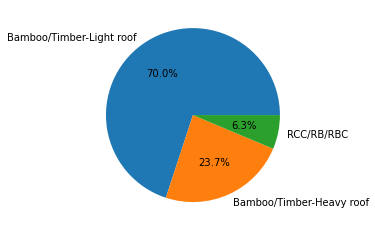

In [126]:
plt.pie(df.roof_type.value_counts(),autopct='%1.1f%%',labels=df.roof_type.unique())
plt.show()

## ground_floor_type

In [127]:
df.columns[38]

'ground_floor_type'

In [128]:
get_info('ground_floor_type')

unique are : ['Mud' 'Timber' 'RC' 'Brick/Stone' 'Other']
__________________________________________________
nunique are : 5
__________________________________________________
Mud            40042
RC              4876
Brick/Stone     4776
Timber           215
Other             91
Name: ground_floor_type, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


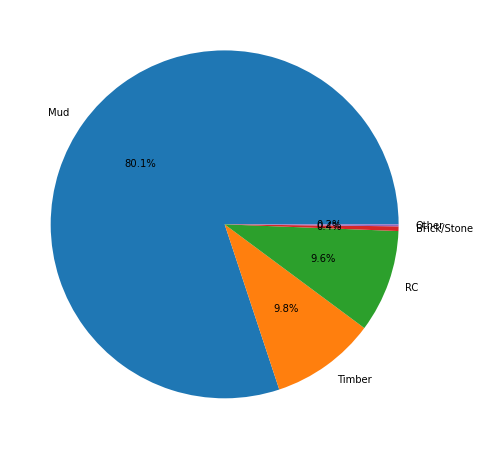

In [129]:
plt.figure(figsize=(8,8))
plt.pie(df.ground_floor_type.value_counts(),autopct='%1.1f%%',labels=df.ground_floor_type.unique())
plt.show()

## other_floor_type

In [130]:
df.columns[39]

'other_floor_type'

In [131]:
get_info('other_floor_type')

unique are : ['Not applicable' 'Timber-Planck' 'TImber/Bamboo-Mud' 'RCC/RB/RBC']
__________________________________________________
nunique are : 4
__________________________________________________
TImber/Bamboo-Mud    31557
Timber-Planck         8402
Not applicable        7682
RCC/RB/RBC            2359
Name: other_floor_type, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


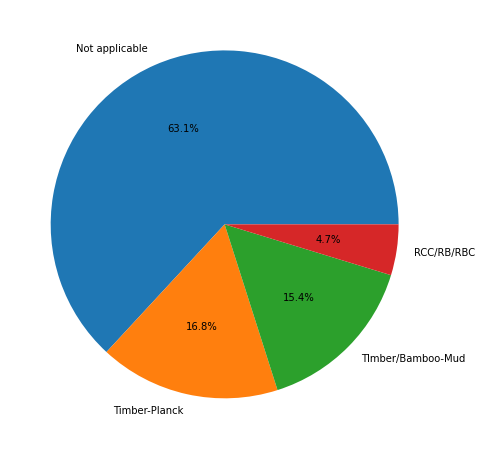

In [132]:
plt.figure(figsize=(8,8))
plt.pie(df.other_floor_type.value_counts(),autopct='%1.1f%%',labels=df.other_floor_type.unique())
plt.show()

## position

In [133]:
df.columns[40]

'position'

In [134]:
get_info('position')

unique are : ['Not attached' 'Attached-1 side' 'Attached-2 side' 'Attached-3 side']
__________________________________________________
nunique are : 4
__________________________________________________
Not attached       38591
Attached-1 side     8442
Attached-2 side     2508
Attached-3 side      459
Name: position, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


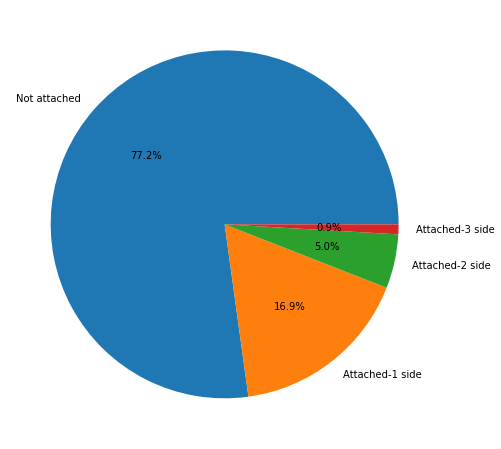

In [135]:
plt.figure(figsize=(8,8))
plt.pie(df.position.value_counts(),autopct='%1.1f%%',labels=df.position.unique())
plt.show()

## plan_configuration

In [136]:
df.columns[41]

'plan_configuration'

In [137]:
get_info('plan_configuration')

unique are : ['Rectangular' 'Square' 'L-shape' 'Multi-projected' 'Others'
 'Building with Central Courtyard' 'U-shape' 'T-shape' 'E-shape' 'H-shape']
__________________________________________________
nunique are : 10
__________________________________________________
Rectangular                        47986
Square                              1107
L-shape                              711
T-shape                               65
Multi-projected                       47
Others                                42
U-shape                               23
E-shape                                8
H-shape                                6
Building with Central Courtyard        5
Name: plan_configuration, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


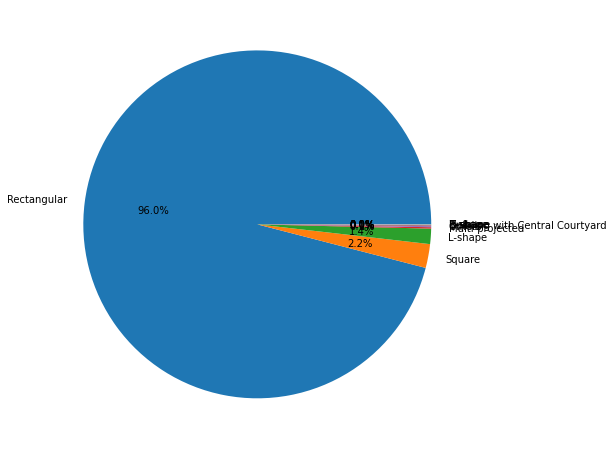

In [138]:
plt.figure(figsize=(8,8))
plt.pie(df.plan_configuration.value_counts(),autopct='%1.1f%%',labels=df.plan_configuration.unique())
plt.show()

In [139]:
df.columns[42:53]

Index(['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other'],
      dtype='object')

In [140]:
for i in df.columns[42:45]:
    print('************************',i,'***************************')
    print('_'*100)
    get_info(i)
    print('END**'*25)
    print('*'*100)

************************ has_superstructure_adobe_mud ***************************
____________________________________________________________________________________________________
unique are : [0. 1.]
__________________________________________________
nunique are : 2
__________________________________________________
0.0    45599
1.0     4401
Name: has_superstructure_adobe_mud, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________
END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**
****************************************************************************************************
************************ has_superstructure_mud_mortar_stone ***************************
____________________________________________________________________________________________________
unique are : [1. 0.]
____________________________________________

In [141]:
for i in df.columns[45:50]:
    print('************************',i,'***************************')
    print('_'*100)
    get_info(i)
    print('END**'*25)
    print('*'*100)

************************ has_superstructure_cement_mortar_stone ***************************
____________________________________________________________________________________________________
unique are : [0. 1.]
__________________________________________________
nunique are : 2
__________________________________________________
0.0    49047
1.0      953
Name: has_superstructure_cement_mortar_stone, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________
END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**
****************************************************************************************************
************************ has_superstructure_mud_mortar_brick ***************************
____________________________________________________________________________________________________
unique are : [0. 1.]
________________________

In [142]:
for i in df.columns[50:53]:
    print('************************',i,'***************************')
    print('_'*100)
    get_info(i)
    print('END**'*25)
    print('*'*100)

************************ has_superstructure_rc_non_engineered ***************************
____________________________________________________________________________________________________
unique are : [0. 1.]
__________________________________________________
nunique are : 2
__________________________________________________
0.0    47926
1.0     2074
Name: has_superstructure_rc_non_engineered, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________
END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**END**
****************************************************************************************************
************************ has_superstructure_rc_engineered ***************************
____________________________________________________________________________________________________
unique are : [0. 1.]
_______________________________

## condition_post_eq

In [143]:
df.columns[53]

'condition_post_eq'

In [144]:
get_info('condition_post_eq')

unique are : ['Damaged-Not used' 'Damaged-Used in risk' 'Damaged-Repaired and used'
 'Damaged-Rubble Clear-New building built' 'Damaged-Rubble unclear'
 'Damaged-Rubble clear' 'Not damaged' 'Covered by landslide']
__________________________________________________
nunique are : 8
__________________________________________________
Damaged-Not used                           11844
Damaged-Repaired and used                  10052
Damaged-Used in risk                        8907
Damaged-Rubble unclear                      6901
Damaged-Rubble clear                        6300
Not damaged                                 3390
Damaged-Rubble Clear-New building built     2591
Covered by landslide                          15
Name: condition_post_eq, dtype: int64
--------------------------------------------------
null value are : 0
__________________________________________________


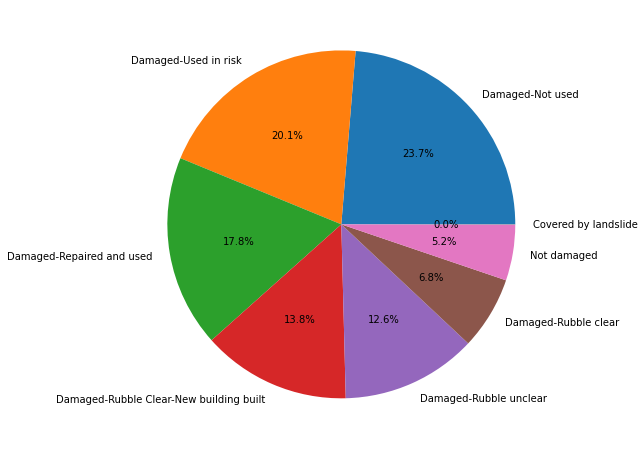

In [145]:
plt.figure(figsize=(8,8))
plt.pie(df.condition_post_eq.value_counts(),autopct='%1.1f%%',labels=df.condition_post_eq.unique())
plt.show()

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              50000 non-null  int64  
 1   area_assesed                            50000 non-null  object 
 2   building_id                             50000 non-null  object 
 3   damage_grade                            50000 non-null  object 
 4   district_id                             50000 non-null  int64  
 5   has_geotechnical_risk                   50000 non-null  float64
 6   has_geotechnical_risk_fault_crack       50000 non-null  int64  
 7   has_geotechnical_risk_flood             50000 non-null  int64  
 8   has_geotechnical_risk_land_settlement   50000 non-null  int64  
 9   has_geotechnical_risk_landslide         50000 non-null  int64  
 10  has_geotechnical_risk_liquefaction      50000 non-null  in

In [147]:
df.columns[41]

'plan_configuration'

********************** land_surface_condition **********************


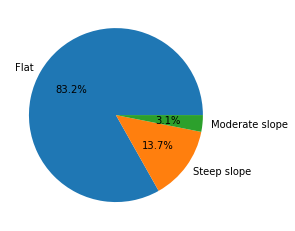

********************** foundation_type **********************


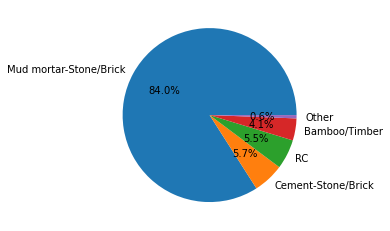

********************** roof_type **********************


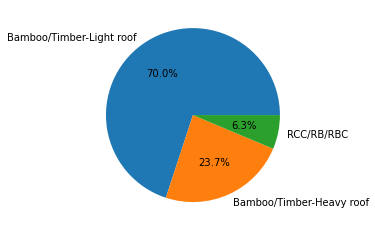

********************** ground_floor_type **********************


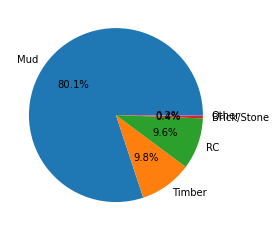

********************** other_floor_type **********************


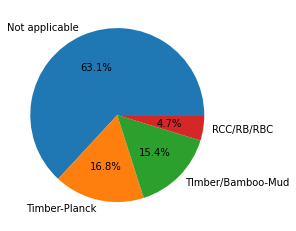

********************** position **********************


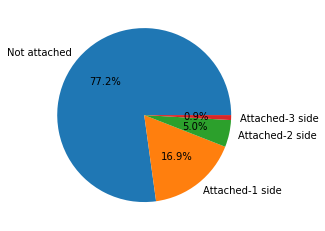

********************** plan_configuration **********************


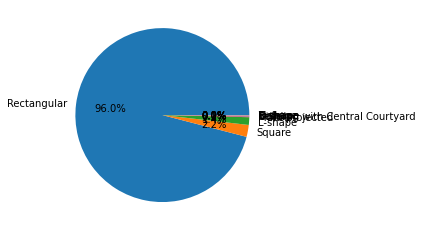

In [148]:
for column in df.columns[35:42]:
    print('**********************',column,'**********************')
    plt.figure(figsize=(4,4))
    plt.subplot(1,1,1)
    plt.pie(df[column].value_counts(),autopct='%1.1f%%',labels=df[column].unique())
    plt.show()

<AxesSubplot:>

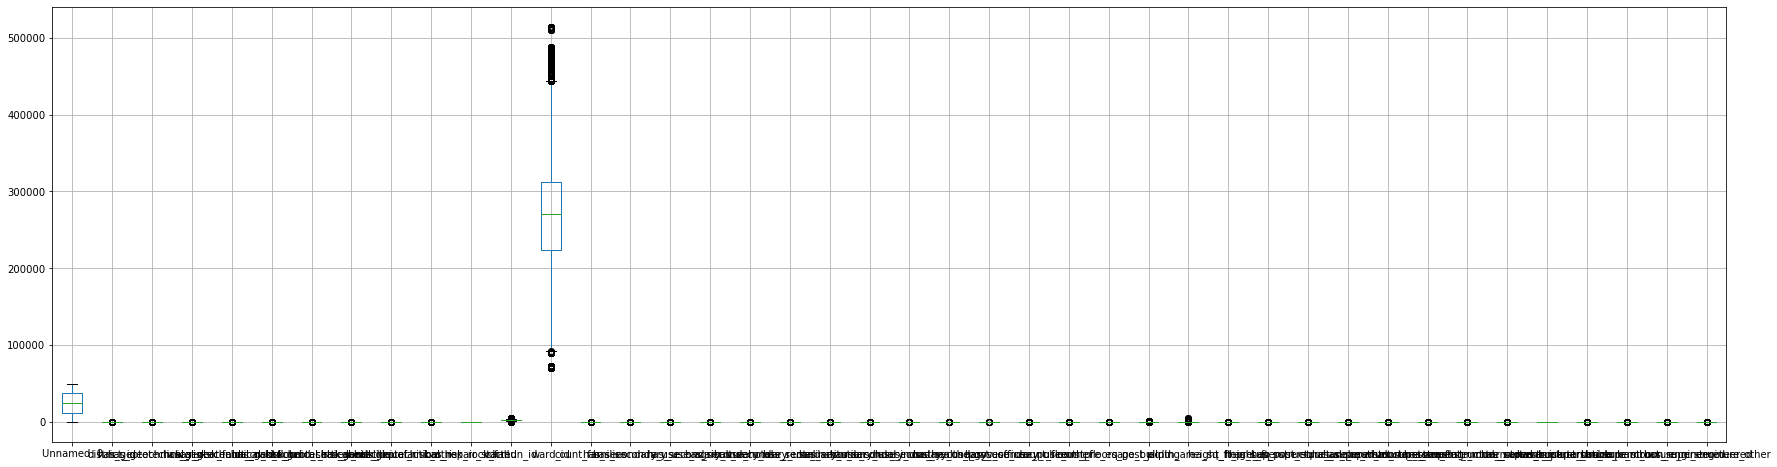

In [149]:
plt.figure(figsize=(30,8))
df.boxplot()

# FEATURE ENGINEERING

In [150]:
df.columns[0]

'Unnamed: 0'

In [151]:
df[['Unnamed: 0']].nunique()

Unnamed: 0    50000
dtype: int64

In [152]:
df.drop(columns='Unnamed: 0',inplace =True)

In [153]:
df.head()

area_assesed  building_id damage_grade  district_id  \
0              Both  23c156192c6      Grade 3           24   
1              Both  1d77e67676c      Grade 3           20   
2              Both  2bcd7588b13      Grade 2           30   
3  Building removed  27d4a422391      Grade 5           27   
4              Both  2381eea64b2      Grade 4           24   

   has_geotechnical_risk  has_geotechnical_risk_fault_crack  \
0                    0.0                                  0   
1                    0.0                                  0   
2                    0.0                                  0   
3                    0.0                                  0   
4                    0.0                                  0   

   has_geotechnical_risk_flood  has_geotechnical_risk_land_settlement  \
0                            0                                      0   
1                            0                                      0   
2                            0                                      0   
3                            0                                      0   
4                            0                                      0   

   has_geotechnical_risk_landslide  has_geotechnical_risk_liquefaction  ...  \
0                                0                                   0  ...   
1                                0                                   0  ...   
2                                0                                   0  ...   
3                                0                                   0  ...   
4                                0                                   0  ...   

   has_superstructure_stone_flag  has_superstructure_cement_mortar_stone  \
0                            0.0                                     0.0   
1                            0.0                                     0.0   
2                            0.0                                     0.0   
3                            0.0                                     0.0   
4                            0.0                                     0.0   

   has_superstructure_mud_mortar_brick  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  1.0   
4                                  0.0   

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                                     0.0                        0.0   
1                                     1.0                        1.0   
2                                     0.0                        0.0   
3                                     0.0                        0.0   
4                                     0.0                        0.0   

  has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0                       0.0                                   0.0   
1                       0.0                                   0.0   
2                       0.0                                   0.0   
3                       0.0                                   0.0   
4                       0.0                                   0.0   

   has_superstructure_rc_engineered  has_superstructure_other  \
0                               0.0                       0.0   
1                               0.0                       0.0   
2                               0.0                       0.0   
3                               0.0                       0.0   
4                               0.0                       0.0   

                         condition_post_eq  
0                         Damaged-Not used  
1                     Damaged-Used in risk  
2                Damaged-Repaired and used  
3  Damaged-Rubble Clear-New building built  
4                         Damaged-Not used  

[5 rows x 53 columns]

In [154]:
df.groupby(df['damage_grade']).get_group('Grade 1').iloc[:,[2,-1]].condition_post_eq.unique()

array(['Damaged-Repaired and used', 'Not damaged'], dtype=object)

In [155]:
df.groupby(df['damage_grade']).get_group('Grade 2').iloc[:,[2,-1]].condition_post_eq.unique()

array(['Damaged-Repaired and used', 'Damaged-Used in risk',
       'Damaged-Not used', 'Not damaged'], dtype=object)

In [156]:
df.groupby(df['damage_grade']).get_group('Grade 3').iloc[:,[2,-1]].condition_post_eq.unique()

array(['Damaged-Not used', 'Damaged-Used in risk',
       'Damaged-Repaired and used'], dtype=object)

In [157]:
df.groupby(df['damage_grade']).get_group('Grade 4').iloc[:,[2,-1]].condition_post_eq.unique()

array(['Damaged-Not used', 'Damaged-Repaired and used',
       'Damaged-Used in risk'], dtype=object)

In [158]:
df.groupby(df['damage_grade']).get_group('Grade 5').iloc[:,[2,-1]].condition_post_eq.unique()

array(['Damaged-Rubble Clear-New building built',
       'Damaged-Rubble unclear', 'Damaged-Rubble clear',
       'Damaged-Not used', 'Damaged-Repaired and used',
       'Damaged-Used in risk', 'Covered by landslide'], dtype=object)

In [159]:
df.drop(columns=['building_id'],inplace=True)

In [160]:
df

area_assesed damage_grade  district_id  has_geotechnical_risk  \
0                  Both      Grade 3           24                    0.0   
1                  Both      Grade 3           20                    0.0   
2                  Both      Grade 2           30                    0.0   
3      Building removed      Grade 5           27                    0.0   
4                  Both      Grade 4           24                    0.0   
...                 ...          ...          ...                    ...   
49995          Exterior      Grade 5           27                    0.0   
49996              Both      Grade 1           38                    0.0   
49997              Both      Grade 3           35                    0.0   
49998          Exterior      Grade 5           21                    1.0   
49999  Building removed      Grade 5           31                    0.0   

       has_geotechnical_risk_fault_crack  has_geotechnical_risk_flood  \
0                                      0                            0   
1                                      0                            0   
2                                      0                            0   
3                                      0                            0   
4                                      0                            0   
...                                  ...                          ...   
49995                                  0                            0   
49996                                  0                            0   
49997                                  0                            0   
49998                                  0                            0   
49999                                  0                            0   

       has_geotechnical_risk_land_settlement  has_geotechnical_risk_landslide  \
0                                          0                                0   
1                                          0                                0   
2                                          0                                0   
3                                          0                                0   
4                                          0                                0   
...                                      ...                              ...   
49995                                      0                                0   
49996                                      0                                0   
49997                                      0                                0   
49998                                      0                                0   
49999                                      0                                0   

       has_geotechnical_risk_liquefaction  has_geotechnical_risk_other  ...  \
0                                       0                            0  ...   
1                                       0                            0  ...   
2                                       0                            0  ...   
3                                       0                            0  ...   
4                                       0                            0  ...   
...                                   ...                          ...  ...   
49995                                   0                            0  ...   
49996                                   0                            0  ...   
49997                                   0                            0  ...   
49998                                   0                            0  ...   
49999                                   0                            0  ...   

       has_superstructure_stone_flag  has_superstructure_cement_mortar_stone  \
0                                0.0                                     0.0   
1                                0.0                                     0.0   
2                                0.0                       

To avoid data leakage split the data

In [161]:
x=df.drop(columns=['condition_post_eq','damage_grade'])
y=df.damage_grade
z=df.condition_post_eq

In [162]:
x

area_assesed  district_id  has_geotechnical_risk  \
0                  Both           24                    0.0   
1                  Both           20                    0.0   
2                  Both           30                    0.0   
3      Building removed           27                    0.0   
4                  Both           24                    0.0   
...                 ...          ...                    ...   
49995          Exterior           27                    0.0   
49996              Both           38                    0.0   
49997              Both           35                    0.0   
49998          Exterior           21                    1.0   
49999  Building removed           31                    0.0   

       has_geotechnical_risk_fault_crack  has_geotechnical_risk_flood  \
0                                      0                            0   
1                                      0                            0   
2                                      0                            0   
3                                      0                            0   
4                                      0                            0   
...                                  ...                          ...   
49995                                  0                            0   
49996                                  0                            0   
49997                                  0                            0   
49998                                  0                            0   
49999                                  0                            0   

       has_geotechnical_risk_land_settlement  has_geotechnical_risk_landslide  \
0                                          0                                0   
1                                          0                                0   
2                                          0                                0   
3                                          0                                0   
4                                          0                                0   
...                                      ...                              ...   
49995                                      0                                0   
49996                                      0                                0   
49997                                      0                                0   
49998                                      0                                0   
49999                                      0                                0   

       has_geotechnical_risk_liquefaction  has_geotechnical_risk_other  \
0                                       0                            0   
1                                       0                            0   
2                                       0                            0   
3                                       0                            0   
4                                       0                            0   
...                                   ...                          ...   
49995                                   0                            0   
49996                                   0                            0   
49997                                   0                            0   
49998                                   0                            0   
49999                                   0                            0   

       has_geotechnical_risk_rock_fall  ...  \
0                                    0  ...   
1                                    0  ...   
2                                    0  ...   
3                                    0  ...   
4                                    0  ...   
...                                ...  ...   
49995                                0  ...   
49996                                0  ...   
49997                                0  ...   
49998                                1  ...  

In [163]:
y

0        Grade 3
1        Grade 3
2        Grade 2
3        Grade 5
4        Grade 4
          ...   
49995    Grade 5
49996    Grade 1
49997    Grade 3
49998    Grade 5
49999    Grade 5
Name: damage_grade, Length: 50000, dtype: object

In [164]:
z

0                               Damaged-Not used
1                           Damaged-Used in risk
2                      Damaged-Repaired and used
3        Damaged-Rubble Clear-New building built
4                               Damaged-Not used
                          ...                   
49995                     Damaged-Rubble unclear
49996                                Not damaged
49997                       Damaged-Used in risk
49998                     Damaged-Rubble unclear
49999    Damaged-Rubble Clear-New building built
Name: condition_post_eq, Length: 50000, dtype: object

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=21,stratify=y)

In [167]:
x_train

area_assesed  district_id  has_geotechnical_risk  \
4618          Both           27                    0.0   
17107         Both           40                    0.0   
45433         Both           38                    0.0   
3828          Both           20                    0.0   
24588         Both           37                    0.0   
...            ...          ...                    ...   
17051         Both           22                    1.0   
7352      Exterior           27                    0.0   
8677      Exterior           21                    0.0   
769           Both           28                    0.0   
21151         Both           31                    0.0   

       has_geotechnical_risk_fault_crack  has_geotechnical_risk_flood  \
4618                                   0                            0   
17107                                  0                            0   
45433                                  0                            0   
3828                                   0                            0   
24588                                  0                            0   
...                                  ...                          ...   
17051                                  0                            0   
7352                                   0                            0   
8677                                   0                            0   
769                                    0                            0   
21151                                  0                            0   

       has_geotechnical_risk_land_settlement  has_geotechnical_risk_landslide  \
4618                                       0                                0   
17107                                      0                                0   
45433                                      0                                0   
3828                                       0                                0   
24588                                      0                                0   
...                                      ...                              ...   
17051                                      0                                1   
7352                                       0                                0   
8677                                       0                                0   
769                                        0                                0   
21151                                      0                                0   

       has_geotechnical_risk_liquefaction  has_geotechnical_risk_other  \
4618                                    0                            0   
17107                                   0                            0   
45433                                   0                            0   
3828                                    0                            0   
24588                                   0                            0   
...                                   ...                          ...   
17051                                   0                            0   
7352                                    0                            0   
8677                                    0                            0   
769                                     0                            0   
21151                                   0                            0   

       has_geotechnical_risk_rock_fall  ...  \
4618                                 0  ...   
17107                                0  ...   
45433                                0  ...   
3828                                 0  ...   
24588                                0  ...   
...                                ...  ...   
17051                                1  ...   
7352                                 0  ...   
8677                                 0  ...   
769                                  0  ...   
21151                                0  ...   

     

In [168]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 4618 to 21151
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   area_assesed                            40000 non-null  object 
 1   district_id                             40000 non-null  int64  
 2   has_geotechnical_risk                   40000 non-null  float64
 3   has_geotechnical_risk_fault_crack       40000 non-null  int64  
 4   has_geotechnical_risk_flood             40000 non-null  int64  
 5   has_geotechnical_risk_land_settlement   40000 non-null  int64  
 6   has_geotechnical_risk_landslide         40000 non-null  int64  
 7   has_geotechnical_risk_liquefaction      40000 non-null  int64  
 8   has_geotechnical_risk_other             40000 non-null  int64  
 9   has_geotechnical_risk_rock_fall         40000 non-null  int64  
 10  has_repair_started                      37907 non-null 

In [169]:
y_train.value_counts()

Grade 5    13336
Grade 4     9541
Grade 3     7737
Grade 2     5518
Grade 1     3868
Name: damage_grade, dtype: int64

In [170]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 7151 to 11180
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   area_assesed                            10000 non-null  object 
 1   district_id                             10000 non-null  int64  
 2   has_geotechnical_risk                   10000 non-null  float64
 3   has_geotechnical_risk_fault_crack       10000 non-null  int64  
 4   has_geotechnical_risk_flood             10000 non-null  int64  
 5   has_geotechnical_risk_land_settlement   10000 non-null  int64  
 6   has_geotechnical_risk_landslide         10000 non-null  int64  
 7   has_geotechnical_risk_liquefaction      10000 non-null  int64  
 8   has_geotechnical_risk_other             10000 non-null  int64  
 9   has_geotechnical_risk_rock_fall         10000 non-null  int64  
 10  has_repair_started                      9487 non-null  

In [171]:
x_test

area_assesed  district_id  has_geotechnical_risk  \
7151           Exterior           27                    0.0   
31810              Both           24                    0.0   
14841          Exterior           31                    0.0   
39617              Both           36                    0.0   
4225   Building removed           23                    0.0   
...                 ...          ...                    ...   
32085              Both           46                    0.0   
30897  Building removed           23                    0.0   
19730              Both           35                    0.0   
12837              Both           36                    0.0   
11180  Building removed           20                    0.0   

       has_geotechnical_risk_fault_crack  has_geotechnical_risk_flood  \
7151                                   0                            0   
31810                                  0                            0   
14841                                  0                            0   
39617                                  0                            0   
4225                                   0                            0   
...                                  ...                          ...   
32085                                  0                            0   
30897                                  0                            0   
19730                                  0                            0   
12837                                  0                            0   
11180                                  0                            0   

       has_geotechnical_risk_land_settlement  has_geotechnical_risk_landslide  \
7151                                       0                                0   
31810                                      0                                0   
14841                                      0                                0   
39617                                      0                                0   
4225                                       0                                0   
...                                      ...                              ...   
32085                                      0                                0   
30897                                      0                                0   
19730                                      0                                0   
12837                                      0                                0   
11180                                      0                                0   

       has_geotechnical_risk_liquefaction  has_geotechnical_risk_other  \
7151                                    0                            0   
31810                                   0                            0   
14841                                   0                            0   
39617                                   0                            0   
4225                                    0                            0   
...                                   ...                          ...   
32085                                   0                            0   
30897                                   0                            0   
19730                                   0                            0   
12837                                   0                            0   
11180                                   0                            0   

       has_geotechnical_risk_rock_fall  ...  \
7151                                 0  ...   
31810                                0  ...   
14841                                0  ...   
39617                                0  ...   
4225                                 0  ...   
...                                ...  ...   
32085                                0  ...   
30897                                0  ...   
19730                                0  ...   
12837                                0  ...  

In [172]:
#x_train.info()

# area_assesed

In [173]:
area_assesed_train=pd.get_dummies(x_train['area_assesed'],drop_first=True,prefix ='area_assesed')
area_assesed_test=pd.get_dummies(x_test['area_assesed'],drop_first=True,prefix ='area_assssed')

In [174]:
x_train=x_train.join(area_assesed_train)

In [175]:
x_test=x_test.join(area_assesed_test)

 # district_id  

In [176]:
df.district_id.unique()

array([24, 20, 30, 27, 26, 21, 23, 37, 31, 25, 28, 36, 22, 12, 35, 46, 13,
       11, 47, 40, 38,  7, 10, 44,  9, 39, 29, 45, 43, 51, 48],
      dtype=int64)

In [177]:
df.district_id.isna().sum()

0

<AxesSubplot:xlabel='district_id'>

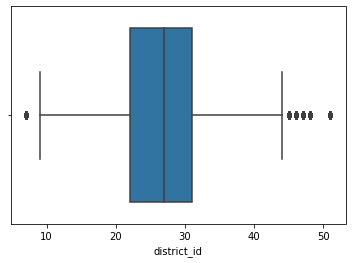

In [178]:
sns.boxplot(df.district_id)

<AxesSubplot:xlabel='district_id', ylabel='Density'>

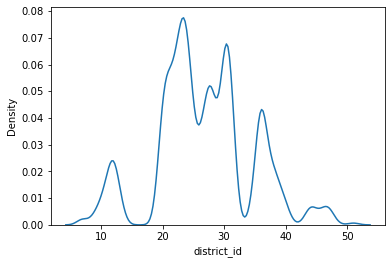

In [179]:
sns.kdeplot(df.district_id)

In [180]:
import numpy as np

In [181]:
def remove_outliers_train(column):
    q1=x_train[column].quantile(0.25)
    q3=x_train[column].quantile(0.75)
    iqr=q3 - q1
    upper_tail=q3+1.5*iqr
    lower_tail=q1-1.5*iqr
    x_train[column] = np.where(x_train[column] > upper_tail , upper_tail, np.where(x_train[column]< lower_tail,lower_tail,x_train[column]))

In [182]:
def remove_outliers_test(column):
    q1=x_test[column].quantile(0.25)
    q3=x_test[column].quantile(0.75)
    iqr=q3-q1
    upper_tail=q3+1.5*iqr
    lower_tail=q1-1.5*iqr
    x_test[column] = np.where(x_test[column] > upper_tail , upper_tail, np.where(x_test[column]< lower_tail,lower_tail,x_test[column]))

In [183]:
def show_outlier_test(column) :
    plt.figure(figsize=(10,6))
    
    plt.subplot(2,2,1)
    display(sns.boxplot(x_test[column]))
    plt.subplot(2,2,2)
    display(sns.distplot(x_test[column]))
    plt.show()

In [184]:
def show_outlier_train(column) :
    plt.figure(figsize=(10,6))
    
    plt.subplot(2,2,1)
    display(sns.boxplot(x_train[column]))
    plt.subplot(2,2,2)
    display(sns.distplot(x_train[column]))
    plt.show()

In [185]:
x_train.columns

Index(['area_assesed', 'district_id', 'has_geotechnical_risk',
       'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'has_repair_started', 'vdcmun_id', 'ward_id', 'legal_ownership_status',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_t

In [186]:
def check_null_duplicate(column):
    print('...................................',column,'......................................')
    print('null value in training data:',x_train[column].isna().sum())
    print('null value in testing data:',x_test[column].isna().sum())
    print('-'*100)
    print('Duplicate value in training data:',x_train[column].isna().sum())
    print('Duplicate value in testing data:',x_test[column].isna().sum())
    print('-'*100)
    print('Unique value in training data:',x_train[column].unique())
    print('Unique value in testing data:',x_test[column].unique())
          

In [187]:
check_null_duplicate('district_id')

................................... district_id ......................................
null value in training data: 0
null value in testing data: 0
----------------------------------------------------------------------------------------------------
Duplicate value in training data: 0
Duplicate value in testing data: 0
----------------------------------------------------------------------------------------------------
Unique value in training data: [27 40 38 20 37 36 30 23 26 22 13 29 24 47 28 31 25 39 35 11 12 10 21 46
  9 45 44  7 51 48 43]
Unique value in testing data: [27 24 31 36 23 38 25 26 30 21 47 13 20 40 10 22 35 39 28 11 12 44 37 46
 45 29 51  7  9 48 43]


<AxesSubplot:xlabel='district_id'>

<AxesSubplot:xlabel='district_id', ylabel='Density'>

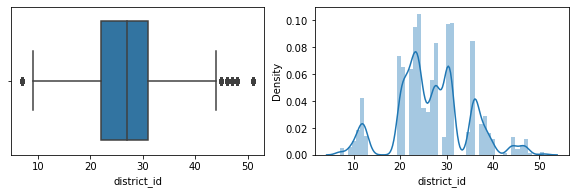

In [188]:
show_outlier_train('district_id')

<AxesSubplot:xlabel='district_id'>

<AxesSubplot:xlabel='district_id', ylabel='Density'>

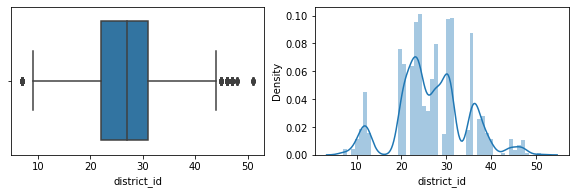

In [189]:
show_outlier_test('district_id')

In [190]:
remove_outliers_train('district_id')

In [191]:
remove_outliers_test('district_id')

<AxesSubplot:xlabel='district_id'>

<AxesSubplot:xlabel='district_id', ylabel='Density'>

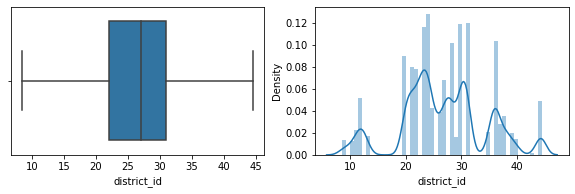

In [192]:
show_outlier_train('district_id')

<AxesSubplot:xlabel='district_id'>

<AxesSubplot:xlabel='district_id', ylabel='Density'>

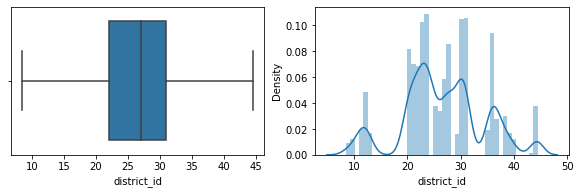

In [193]:
show_outlier_test('district_id')

# has_ geotechnical_risk

In [194]:
print(x_train.has_geotechnical_risk.unique())
print(x_test.has_geotechnical_risk.unique())

[0. 1.]
[0. 1.]


<AxesSubplot:xlabel='has_geotechnical_risk'>

<AxesSubplot:xlabel='has_geotechnical_risk', ylabel='Density'>

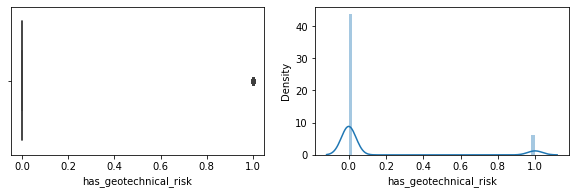

In [195]:
show_outlier_train('has_geotechnical_risk')

<AxesSubplot:xlabel='has_geotechnical_risk', ylabel='Density'>

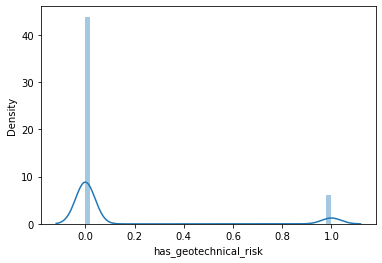

In [196]:
sns.distplot(x_train.has_geotechnical_risk)

In [197]:
print(x_train.has_geotechnical_risk.value_counts())
print('-'*50)
x_test.has_geotechnical_risk.value_counts()

0.0    35068
1.0     4932
Name: has_geotechnical_risk, dtype: int64
--------------------------------------------------


0.0    8761
1.0    1239
Name: has_geotechnical_risk, dtype: int64

In [198]:
for column in (x_train.columns[2:10]):
    print(column,'>>',x_train[column].unique())

has_geotechnical_risk >> [0. 1.]
has_geotechnical_risk_fault_crack >> [0 1]
has_geotechnical_risk_flood >> [0 1]
has_geotechnical_risk_land_settlement >> [0 1]
has_geotechnical_risk_landslide >> [0 1]
has_geotechnical_risk_liquefaction >> [0 1]
has_geotechnical_risk_other >> [0 1]
has_geotechnical_risk_rock_fall >> [0 1]


# vdcmun_id

<AxesSubplot:xlabel='vdcmun_id'>

<AxesSubplot:xlabel='vdcmun_id', ylabel='Density'>

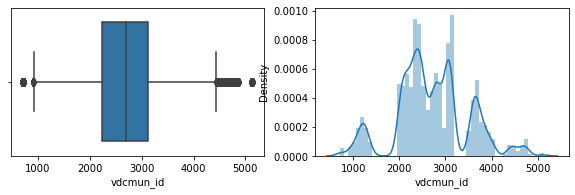

In [199]:
show_outlier_train('vdcmun_id')

<AxesSubplot:xlabel='vdcmun_id'>

<AxesSubplot:xlabel='vdcmun_id', ylabel='Density'>

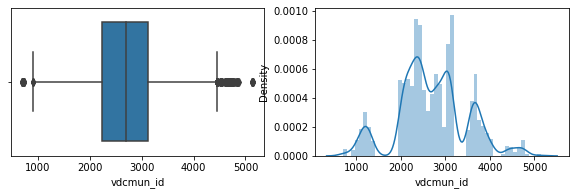

In [200]:
show_outlier_test('vdcmun_id')

In [201]:
remove_outliers_train('vdcmun_id')

In [202]:
remove_outliers_test('vdcmun_id')

<AxesSubplot:xlabel='vdcmun_id'>

<AxesSubplot:xlabel='vdcmun_id', ylabel='Density'>

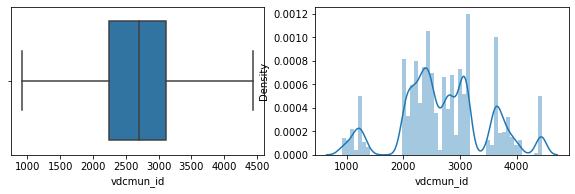

In [203]:
show_outlier_train('vdcmun_id')

<AxesSubplot:xlabel='vdcmun_id'>

<AxesSubplot:xlabel='vdcmun_id', ylabel='Density'>

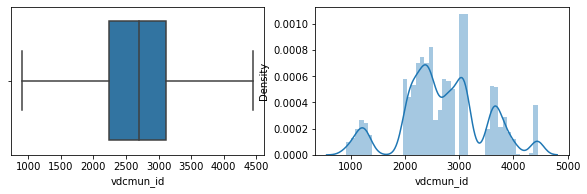

In [204]:
show_outlier_test('vdcmun_id')

# ward_id

In [205]:
check_null_duplicate('ward_id')

................................... ward_id ......................................
null value in training data: 0
null value in testing data: 0
----------------------------------------------------------------------------------------------------
Duplicate value in training data: 0
Duplicate value in testing data: 0
----------------------------------------------------------------------------------------------------
Unique value in training data: [271805 402211 382205 ... 370206 105701 465007]
Unique value in testing data: [270402 240108 312203 ... 461103 351804 203405]


<AxesSubplot:xlabel='ward_id'>

<AxesSubplot:xlabel='ward_id', ylabel='Density'>

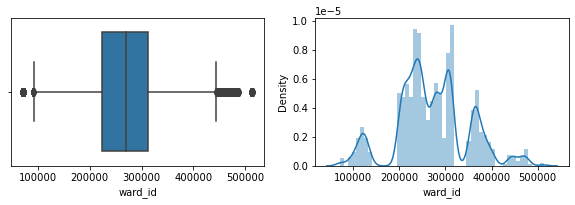

In [206]:
show_outlier_train('ward_id')

<AxesSubplot:xlabel='ward_id'>

<AxesSubplot:xlabel='ward_id', ylabel='Density'>

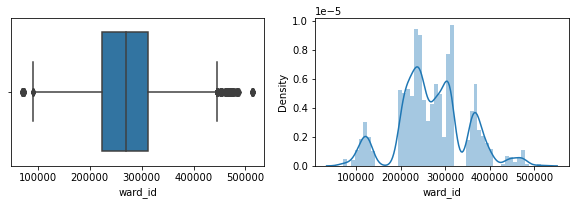

In [207]:
show_outlier_test('ward_id')

In [208]:
remove_outliers_train('ward_id')

In [209]:
remove_outliers_test('ward_id')

<AxesSubplot:xlabel='ward_id'>

<AxesSubplot:xlabel='ward_id', ylabel='Density'>

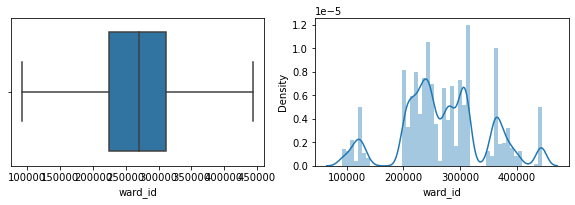

In [210]:
show_outlier_train('ward_id')

<AxesSubplot:xlabel='ward_id'>

<AxesSubplot:xlabel='ward_id', ylabel='Density'>

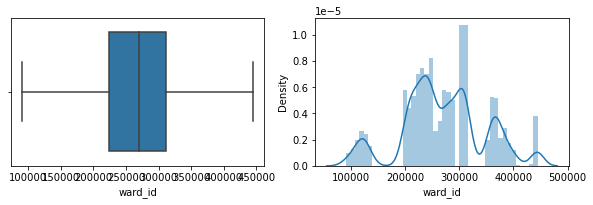

In [211]:
show_outlier_test('ward_id')

In [212]:
x_train.columns

Index(['area_assesed', 'district_id', 'has_geotechnical_risk',
       'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'has_repair_started', 'vdcmun_id', 'ward_id', 'legal_ownership_status',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_t

In [213]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 4618 to 21151
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   area_assesed                            40000 non-null  object 
 1   district_id                             40000 non-null  float64
 2   has_geotechnical_risk                   40000 non-null  float64
 3   has_geotechnical_risk_fault_crack       40000 non-null  int64  
 4   has_geotechnical_risk_flood             40000 non-null  int64  
 5   has_geotechnical_risk_land_settlement   40000 non-null  int64  
 6   has_geotechnical_risk_landslide         40000 non-null  int64  
 7   has_geotechnical_risk_liquefaction      40000 non-null  int64  
 8   has_geotechnical_risk_other             40000 non-null  int64  
 9   has_geotechnical_risk_rock_fall         40000 non-null  int64  
 10  has_repair_started                      37907 non-null 

# legal_ownership_status

In [214]:
check_null_duplicate('legal_ownership_status')

................................... legal_ownership_status ......................................
null value in training data: 0
null value in testing data: 0
----------------------------------------------------------------------------------------------------
Duplicate value in training data: 0
Duplicate value in testing data: 0
----------------------------------------------------------------------------------------------------
Unique value in training data: ['Private' 'Public' 'Institutional' 'Other']
Unique value in testing data: ['Private' 'Public' 'Institutional' 'Other']


In [215]:
x_train.legal_ownership_status

4618     Private
17107    Private
45433    Private
3828     Private
24588    Private
          ...   
17051    Private
7352     Private
8677     Private
769      Private
21151    Private
Name: legal_ownership_status, Length: 40000, dtype: object

In [216]:
legal_ownership_status_train=pd.get_dummies(x_train['legal_ownership_status'],drop_first=True,prefix='legal_ownership_status')
legal_ownership_status_test=pd.get_dummies(x_test['legal_ownership_status'],drop_first=True,prefix='legal_ownership_status')

x_train=x_train.join(legal_ownership_status_train)

x_test=x_test.join(legal_ownership_status_test)

In [217]:
x_train

area_assesed  district_id  has_geotechnical_risk  \
4618          Both         27.0                    0.0   
17107         Both         40.0                    0.0   
45433         Both         38.0                    0.0   
3828          Both         20.0                    0.0   
24588         Both         37.0                    0.0   
...            ...          ...                    ...   
17051         Both         22.0                    1.0   
7352      Exterior         27.0                    0.0   
8677      Exterior         21.0                    0.0   
769           Both         28.0                    0.0   
21151         Both         31.0                    0.0   

       has_geotechnical_risk_fault_crack  has_geotechnical_risk_flood  \
4618                                   0                            0   
17107                                  0                            0   
45433                                  0                            0   
3828                                   0                            0   
24588                                  0                            0   
...                                  ...                          ...   
17051                                  0                            0   
7352                                   0                            0   
8677                                   0                            0   
769                                    0                            0   
21151                                  0                            0   

       has_geotechnical_risk_land_settlement  has_geotechnical_risk_landslide  \
4618                                       0                                0   
17107                                      0                                0   
45433                                      0                                0   
3828                                       0                                0   
24588                                      0                                0   
...                                      ...                              ...   
17051                                      0                                1   
7352                                       0                                0   
8677                                       0                                0   
769                                        0                                0   
21151                                      0                                0   

       has_geotechnical_risk_liquefaction  has_geotechnical_risk_other  \
4618                                    0                            0   
17107                                   0                            0   
45433                                   0                            0   
3828                                    0                            0   
24588                                   0                            0   
...                                   ...                          ...   
17051                                   0                            0   
7352                                    0                            0   
8677                                    0                            0   
769                                     0                            0   
21151                                   0                            0   

       has_geotechnical_risk_rock_fall  ...  \
4618                                 0  ...   
17107                                0  ...   
45433                                0  ...   
3828                                 0  ...   
24588                                0  ...   
...                                ...  ...   
17051                                1  ...   
7352                                 0  ...   
8677                                 0  ...   
769                                  0  ...   
21151                                0  ...   

     

In [218]:
def endcoding(column):
    column_train=pd.get_dummies(x_train[column],drop_first=True, prefix=column)
    column_test=pd.get_dummies(x_test[column],drop_first=True, prefix=column)
    
    x_train=x_train.join(column_train)
    
    x_test=x_test.join(column_test)
    
    return x_train,x_test

In [219]:
x_train.columns

Index(['area_assesed', 'district_id', 'has_geotechnical_risk',
       'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'has_repair_started', 'vdcmun_id', 'ward_id', 'legal_ownership_status',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_t

# count_families

In [220]:
check_null_duplicate('count_families')

................................... count_families ......................................
null value in training data: 1
null value in testing data: 0
----------------------------------------------------------------------------------------------------
Duplicate value in training data: 1
Duplicate value in testing data: 0
----------------------------------------------------------------------------------------------------
Unique value in training data: [ 1.  0.  2.  3.  4.  5.  6. 11.  9.  7. nan]
Unique value in testing data: [1. 0. 2. 3. 4. 5. 6.]


In [221]:
q1=x_train['count_families'].quantile(0.25)
q3=x_train['count_families'].quantile(0.75)
iqr=q3-q1
upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

In [222]:
upper_tail

1.0

In [223]:
lower_tail

1.0

In [224]:
x_train.count_families.unique()

array([ 1.,  0.,  2.,  3.,  4.,  5.,  6., 11.,  9.,  7., nan])

In [225]:
x_train.count_families.value_counts()

1.0     34665
0.0      3248
2.0      1773
3.0       235
4.0        56
5.0        14
6.0         4
9.0         2
7.0         1
11.0        1
Name: count_families, dtype: int64

<AxesSubplot:xlabel='count_families'>

<AxesSubplot:xlabel='count_families', ylabel='Density'>

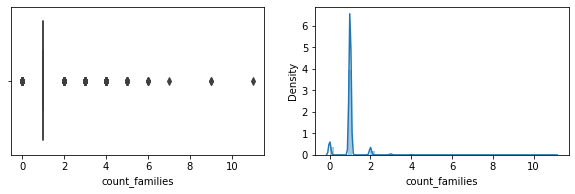

In [226]:
show_outlier_train('count_families')

In [227]:
x_train.count_families.fillna(1.0,inplace=True)

In [228]:
x_train.count_families.mode()

0    1.0
dtype: float64

In [229]:
x_test.count_families.fillna(1.0,inplace=True)

In [230]:
check_null_duplicate('count_families')

................................... count_families ......................................
null value in training data: 0
null value in testing data: 0
----------------------------------------------------------------------------------------------------
Duplicate value in training data: 0
Duplicate value in testing data: 0
----------------------------------------------------------------------------------------------------
Unique value in training data: [ 1.  0.  2.  3.  4.  5.  6. 11.  9.  7.]
Unique value in testing data: [1. 0. 2. 3. 4. 5. 6.]


<AxesSubplot:xlabel='count_families'>

<AxesSubplot:xlabel='count_families', ylabel='Density'>

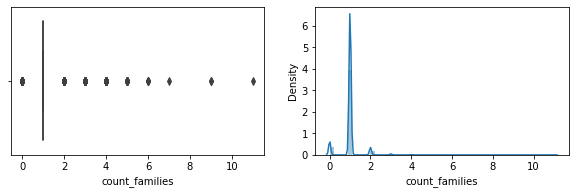

In [231]:
show_outlier_train('count_families')

<AxesSubplot:xlabel='count_families'>

<AxesSubplot:xlabel='count_families', ylabel='Density'>

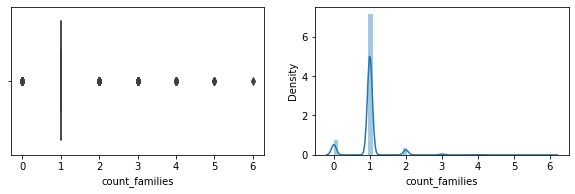

In [232]:
show_outlier_test('count_families')

In [233]:
remove_outliers_train('count_families')

In [234]:
remove_outliers_test('count_families')

<AxesSubplot:xlabel='count_families'>

<AxesSubplot:xlabel='count_families', ylabel='Density'>

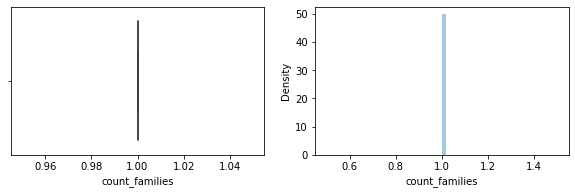

In [235]:
show_outlier_test('count_families')

<AxesSubplot:xlabel='count_families'>

<AxesSubplot:xlabel='count_families', ylabel='Density'>

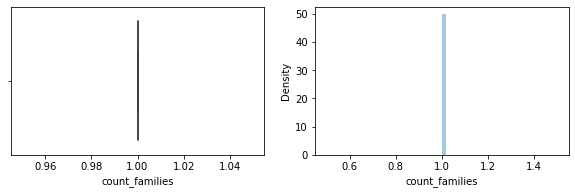

In [236]:
show_outlier_train('count_families')

In [237]:
list1 = ['has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other']

In [238]:
for i in list1:
    check_null_duplicate(i)
    print('-'*50)
    print(df[i].unique())

................................... has_secondary_use ......................................
null value in training data: 0
null value in testing data: 0
----------------------------------------------------------------------------------------------------
Duplicate value in training data: 0
Duplicate value in testing data: 0
----------------------------------------------------------------------------------------------------
Unique value in training data: [0. 1.]
Unique value in testing data: [0. 1.]
--------------------------------------------------
[0. 1.]
................................... has_secondary_use_agriculture ......................................
null value in training data: 0
null value in testing data: 0
----------------------------------------------------------------------------------------------------
Duplicate value in training data: 0
Duplicate value in testing data: 0
---------------------------------------------------------------------------------------------------

In [239]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 4618 to 21151
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   area_assesed                            40000 non-null  object 
 1   district_id                             40000 non-null  float64
 2   has_geotechnical_risk                   40000 non-null  float64
 3   has_geotechnical_risk_fault_crack       40000 non-null  int64  
 4   has_geotechnical_risk_flood             40000 non-null  int64  
 5   has_geotechnical_risk_land_settlement   40000 non-null  int64  
 6   has_geotechnical_risk_landslide         40000 non-null  int64  
 7   has_geotechnical_risk_liquefaction      40000 non-null  int64  
 8   has_geotechnical_risk_other             40000 non-null  int64  
 9   has_geotechnical_risk_rock_fall         40000 non-null  int64  
 10  has_repair_started                      37907 non-null 

# has_repair_started

In [240]:
check_null_duplicate('has_repair_started')

................................... has_repair_started ......................................
null value in training data: 2093
null value in testing data: 513
----------------------------------------------------------------------------------------------------
Duplicate value in training data: 2093
Duplicate value in testing data: 513
----------------------------------------------------------------------------------------------------
Unique value in training data: [ 0.  1. nan]
Unique value in testing data: [ 0.  1. nan]


In [241]:
x_train.has_repair_started.mode()

0    0.0
dtype: float64

In [242]:
x_test.has_repair_started.mode()

0    0.0
dtype: float64

In [243]:
x_train.has_repair_started.fillna(0,inplace=True)

In [244]:
x_test.has_repair_started.fillna(0,inplace=True)

In [245]:
check_null_duplicate('has_repair_started')

................................... has_repair_started ......................................
null value in training data: 0
null value in testing data: 0
----------------------------------------------------------------------------------------------------
Duplicate value in training data: 0
Duplicate value in testing data: 0
----------------------------------------------------------------------------------------------------
Unique value in training data: [0. 1.]
Unique value in testing data: [0. 1.]


<AxesSubplot:xlabel='has_repair_started'>

<AxesSubplot:xlabel='has_repair_started', ylabel='Density'>

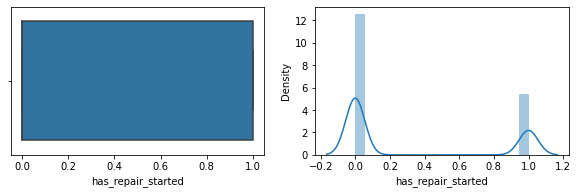

In [246]:
show_outlier_train('has_repair_started')

In [247]:
x_train.has_repair_started.unique()

array([0., 1.])

In [248]:
x_train.columns

Index(['area_assesed', 'district_id', 'has_geotechnical_risk',
       'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'has_repair_started', 'vdcmun_id', 'ward_id', 'legal_ownership_status',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_t

# count_floors_pre_eq

In [249]:
check_null_duplicate('count_floors_pre_eq')

................................... count_floors_pre_eq ......................................
null value in training data: 0
null value in testing data: 0
----------------------------------------------------------------------------------------------------
Duplicate value in training data: 0
Duplicate value in testing data: 0
----------------------------------------------------------------------------------------------------
Unique value in training data: [3 2 1 4 5 6 9 7]
Unique value in testing data: [3 1 2 4 5 6]


In [250]:
x_train.count_floors_pre_eq.value_counts()

2    24100
3     8507
1     6219
4      820
5      319
6       32
7        2
9        1
Name: count_floors_pre_eq, dtype: int64

In [251]:
x_test.count_floors_pre_eq.value_counts()

2    5995
3    2117
1    1571
4     218
5      93
6       6
Name: count_floors_pre_eq, dtype: int64

<AxesSubplot:xlabel='count_floors_pre_eq'>

<AxesSubplot:xlabel='count_floors_pre_eq', ylabel='Density'>

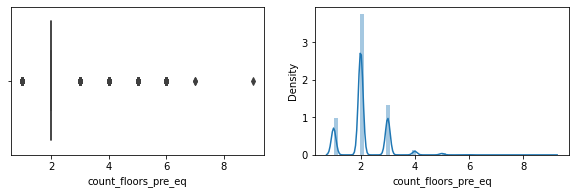

In [252]:
show_outlier_train('count_floors_pre_eq')

<AxesSubplot:xlabel='count_floors_pre_eq'>

<AxesSubplot:xlabel='count_floors_pre_eq', ylabel='Density'>

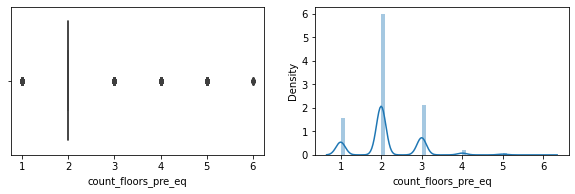

In [253]:
show_outlier_test('count_floors_pre_eq')

In [254]:
remove_outliers_test('count_floors_pre_eq')

In [255]:
remove_outliers_train('count_floors_pre_eq')

<AxesSubplot:xlabel='count_floors_pre_eq'>

<AxesSubplot:xlabel='count_floors_pre_eq', ylabel='Density'>

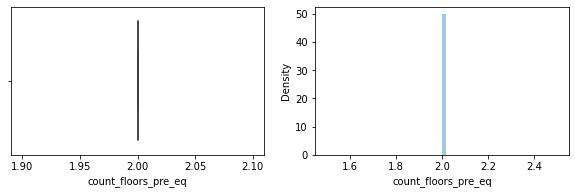

In [256]:
show_outlier_train('count_floors_pre_eq')

<AxesSubplot:xlabel='count_floors_pre_eq'>

<AxesSubplot:xlabel='count_floors_pre_eq', ylabel='Density'>

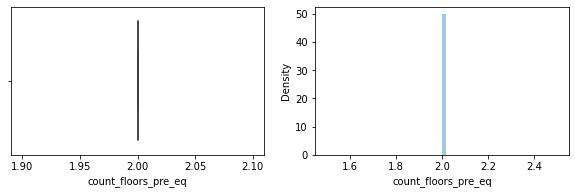

In [257]:
show_outlier_test('count_floors_pre_eq')

# count_floors_post_eq

In [258]:
check_null_duplicate('count_floors_post_eq')

................................... count_floors_post_eq ......................................
null value in training data: 0
null value in testing data: 0
----------------------------------------------------------------------------------------------------
Duplicate value in training data: 0
Duplicate value in testing data: 0
----------------------------------------------------------------------------------------------------
Unique value in training data: [3 2 1 0 4 5 6 9 7]
Unique value in testing data: [0 1 2 3 4 5 6]


In [259]:
x_train.count_floors_post_eq.value_counts()

2    15926
0    12651
1     6935
3     3763
4      500
5      192
6       30
7        2
9        1
Name: count_floors_post_eq, dtype: int64

In [260]:
x_test.count_floors_post_eq.value_counts()

2    3987
0    3156
1    1727
3     929
4     140
5      56
6       5
Name: count_floors_post_eq, dtype: int64

In [261]:
remove_outliers_train('count_floors_post_eq')

In [262]:
remove_outliers_test('count_floors_post_eq')

<AxesSubplot:xlabel='count_floors_post_eq'>

<AxesSubplot:xlabel='count_floors_post_eq', ylabel='Density'>

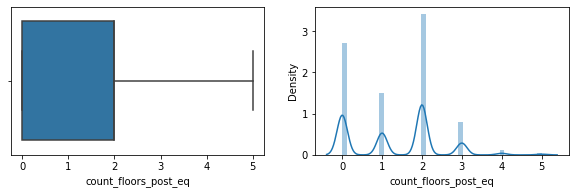

In [263]:
show_outlier_train('count_floors_post_eq')

<AxesSubplot:xlabel='count_floors_post_eq'>

<AxesSubplot:xlabel='count_floors_post_eq', ylabel='Density'>

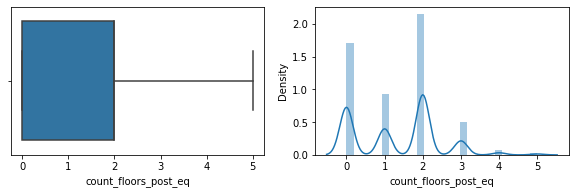

In [264]:
show_outlier_test('count_floors_post_eq')

# age_building

In [265]:
check_null_duplicate('age_building')

................................... age_building ......................................
null value in training data: 0
null value in testing data: 0
----------------------------------------------------------------------------------------------------
Duplicate value in training data: 0
Duplicate value in testing data: 0
----------------------------------------------------------------------------------------------------
Unique value in training data: [ 20  27  10  21   3  15  22  42  17  11  18  45  60  50  13  12  35  90
   7  29  30   9  58  16  31  32   8  70 200   5   6   4  40  62   1  26
  14  48  28  52  25 100  36  19  23   2   0  53  80  34  56  85  37  38
  55  65  24  68  59  82 999  54  51  46  44  41  75  33  64  69  95  39
 105  47  57  96  88  43  61  99  63 110 120  83  72  49  86  76 111  66
 125  78  74  73  84  77  79  98 150  67 104  89 102  71 115  93 107  94
 145 140  87 103  92  81 180 106  97 130 170 108 113 164 101 142 124 133
 173 196 190 114 112  91]
Unique val

In [266]:
x_train.age_building.value_counts()

15     2588
20     2477
25     2090
10     1961
12     1716
       ... 
170       1
133       1
102       1
106       1
142       1
Name: age_building, Length: 132, dtype: int64

In [267]:
x_test.age_building.value_counts()

20     643
15     627
25     561
10     499
30     443
      ... 
86       1
160      1
69       1
99       1
170      1
Name: age_building, Length: 112, dtype: int64

<AxesSubplot:xlabel='age_building'>

<AxesSubplot:xlabel='age_building', ylabel='Density'>

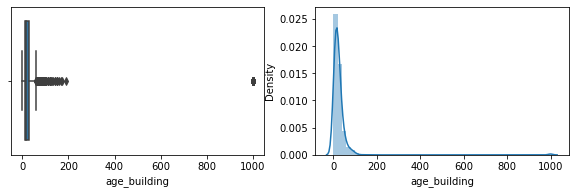

In [268]:
show_outlier_test('age_building')

<AxesSubplot:xlabel='age_building'>

<AxesSubplot:xlabel='age_building', ylabel='Density'>

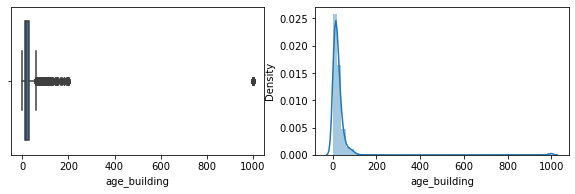

In [269]:
show_outlier_train('age_building')

In [270]:
remove_outliers_test('age_building')
remove_outliers_train('age_building')

<AxesSubplot:xlabel='age_building'>

<AxesSubplot:xlabel='age_building', ylabel='Density'>

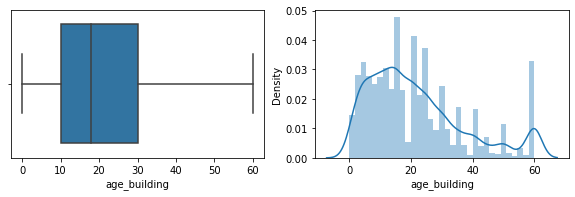

In [271]:
show_outlier_test('age_building')

<AxesSubplot:xlabel='age_building'>

<AxesSubplot:xlabel='age_building', ylabel='Density'>

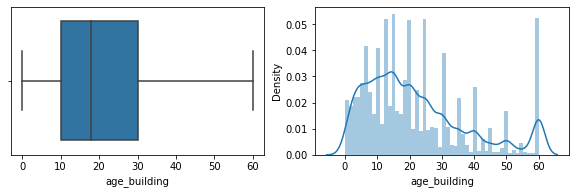

In [272]:
show_outlier_train('age_building')

# plinth_area_sq_ft

In [273]:
check_null_duplicate('plinth_area_sq_ft')

................................... plinth_area_sq_ft ......................................
null value in training data: 0
null value in testing data: 0
----------------------------------------------------------------------------------------------------
Duplicate value in training data: 0
Duplicate value in testing data: 0
----------------------------------------------------------------------------------------------------
Unique value in training data: [324 450 400 ... 839 559 823]
Unique value in testing data: [ 219  545  429  385  448  308  324  221  384  800  660  159  414  450
  360  480  155  900  312  140  459  540  210  400  390  300  192 1193
 1200  503  460  650  350  550  592  405  375  700  340 1500  315  180
  600  264  475 1000  710  233  500  290  612  408  346  208  240  792
  845  880  100  280  314  250  920  432  303  260  246  474  214  402
  263  285  420  200 1458   92  365  330  418  348  406  462  275  310
  548  528  770  468  276  799  380  870  228  141  338 

In [274]:
x_train.plinth_area_sq_ft.value_counts()

300     1474
450     1263
400     1111
350     1097
360      772
        ... 
1242       1
1274       1
1370       1
1530       1
1823       1
Name: plinth_area_sq_ft, Length: 1154, dtype: int64

<AxesSubplot:xlabel='plinth_area_sq_ft'>

<AxesSubplot:xlabel='plinth_area_sq_ft', ylabel='Density'>

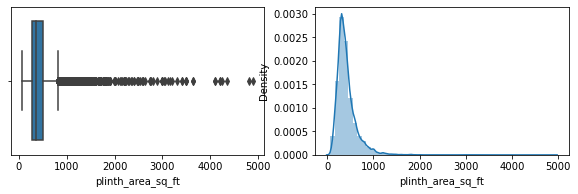

In [275]:
show_outlier_train('plinth_area_sq_ft')

<AxesSubplot:xlabel='plinth_area_sq_ft'>

<AxesSubplot:xlabel='plinth_area_sq_ft', ylabel='Density'>

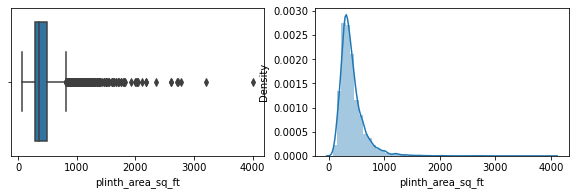

In [276]:
show_outlier_test('plinth_area_sq_ft')

In [277]:
remove_outliers_test('plinth_area_sq_ft')
remove_outliers_train('plinth_area_sq_ft')

<AxesSubplot:xlabel='plinth_area_sq_ft'>

<AxesSubplot:xlabel='plinth_area_sq_ft', ylabel='Density'>

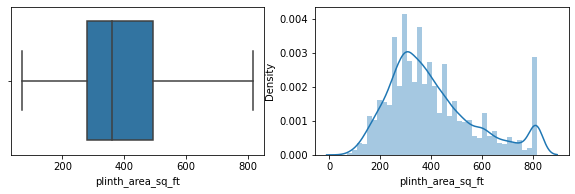

In [278]:
show_outlier_test('plinth_area_sq_ft')

<AxesSubplot:xlabel='plinth_area_sq_ft'>

<AxesSubplot:xlabel='plinth_area_sq_ft', ylabel='Density'>

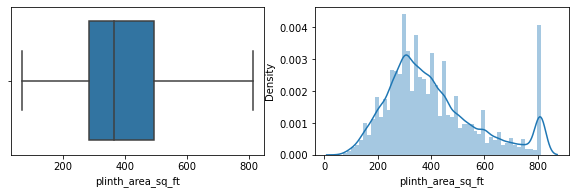

In [279]:
show_outlier_train('plinth_area_sq_ft')

# height_ft_pre_eq

In [280]:
check_null_duplicate('height_ft_pre_eq')

................................... height_ft_pre_eq ......................................
null value in training data: 0
null value in testing data: 0
----------------------------------------------------------------------------------------------------
Duplicate value in training data: 0
Duplicate value in testing data: 0
----------------------------------------------------------------------------------------------------
Unique value in training data: [21 14 16 20 18 30 24 27 12 17 10  6  8 19 25  7  9 15 13 26 11 22 23 28
 35 40 32 99 36 48 42 37 45 50 60 31 44 54 29 33 38 39 49 34 52 46 72 55
 47 63 65 43]
Unique value in testing data: [18  7 12 22 24 13 40 16 25 20 14 10 21 17  6  8 19 38 15 11  9 35 36 34
 28 27 30 54 45 23 32 33 26 50 41 42 29 37 51 31 48 60 99 44]


In [281]:
x_train.height_ft_pre_eq.value_counts()

14    5144
18    5075
16    4067
12    4011
15    2858
20    2510
21    1954
10    1588
17    1366
13    1356
24    1283
9     1203
8     1194
22    1008
7      955
25     606
19     598
11     515
6      503
27     488
30     476
23     235
28     230
32     151
36     125
40     113
35     105
26      91
45      46
33      17
29      17
31      16
99      16
34      15
50      11
54      10
38       9
42       7
48       7
37       4
60       3
44       3
49       2
39       1
46       1
52       1
55       1
72       1
43       1
65       1
47       1
63       1
Name: height_ft_pre_eq, dtype: int64

<AxesSubplot:xlabel='height_ft_pre_eq'>

<AxesSubplot:xlabel='height_ft_pre_eq', ylabel='Density'>

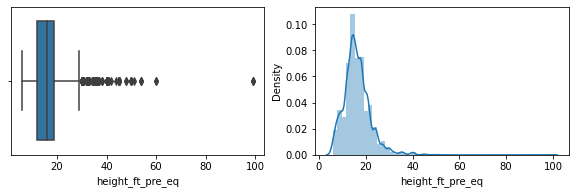

In [282]:
show_outlier_test('height_ft_pre_eq')

<AxesSubplot:xlabel='height_ft_pre_eq'>

<AxesSubplot:xlabel='height_ft_pre_eq', ylabel='Density'>

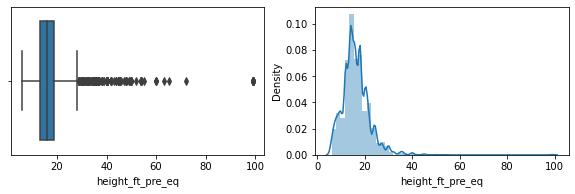

In [283]:
show_outlier_train('height_ft_pre_eq')

In [284]:
remove_outliers_test('height_ft_pre_eq')

In [285]:
remove_outliers_train('height_ft_pre_eq')

<AxesSubplot:xlabel='height_ft_pre_eq'>

<AxesSubplot:xlabel='height_ft_pre_eq', ylabel='Density'>

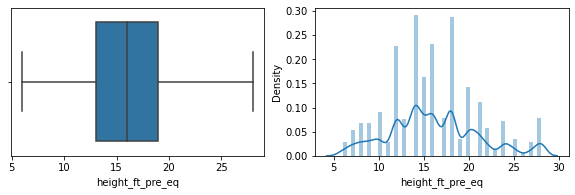

In [286]:
show_outlier_train('height_ft_pre_eq')

<AxesSubplot:xlabel='height_ft_pre_eq'>

<AxesSubplot:xlabel='height_ft_pre_eq', ylabel='Density'>

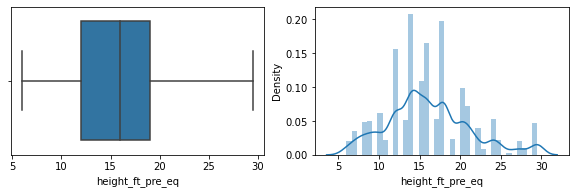

In [287]:
show_outlier_test('height_ft_pre_eq')

# height_ft_post_eq

In [288]:
x_train.height_ft_post_eq

4618     21
17107    14
45433     8
3828     20
24588    14
         ..
17051    12
7352     30
8677     17
769       7
21151    16
Name: height_ft_post_eq, Length: 40000, dtype: int64

In [289]:
check_null_duplicate('height_ft_post_eq')

................................... height_ft_post_eq ......................................
null value in training data: 0
null value in testing data: 0
----------------------------------------------------------------------------------------------------
Duplicate value in training data: 0
Duplicate value in testing data: 0
----------------------------------------------------------------------------------------------------
Unique value in training data: [21 14  8 20  0 27 12 24 10  7  6 16 18 19  9 30 15 11 17 13 22 25 23 40
 28 26 36 32 48 35 42 37 45 31 50 60 44 54 99 33 39 34 52 29 38 75 47 63
 65 43]
Unique value in testing data: [ 0  7  9 12 22 40  8 16 13 14 10 21 17 20 18 19 15 38  6 11 24 36 28 27
 30 35 54 45 25 33 23 32 26 50 41 29 37 51 31 48 60 44]


In [290]:
x_test.height_ft_post_eq.value_counts()

0     3156
14     808
16     684
18     671
12     660
15     445
20     385
10     362
8      353
7      334
9      307
13     233
6      229
17     220
21     204
24     161
22     147
11     128
19      82
27      81
25      76
30      69
40      36
28      36
23      28
32      21
36      18
35      16
45      13
26      11
33       5
50       4
29       3
38       3
37       2
54       2
60       2
44       1
51       1
41       1
48       1
31       1
Name: height_ft_post_eq, dtype: int64

<AxesSubplot:xlabel='height_ft_post_eq'>

<AxesSubplot:xlabel='height_ft_post_eq', ylabel='Density'>

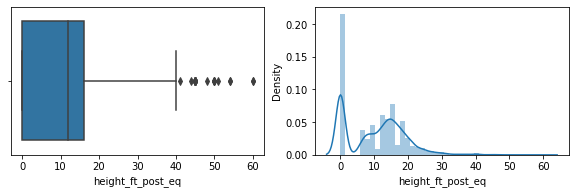

In [291]:
show_outlier_test('height_ft_post_eq')

<AxesSubplot:xlabel='height_ft_post_eq'>

<AxesSubplot:xlabel='height_ft_post_eq', ylabel='Density'>

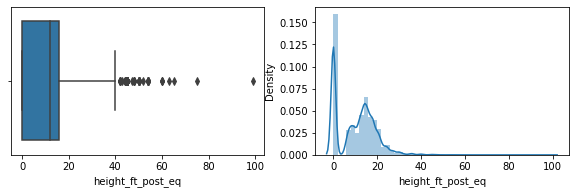

In [292]:
show_outlier_train('height_ft_post_eq')

In [293]:
remove_outliers_train('height_ft_post_eq')

In [294]:
remove_outliers_test('height_ft_post_eq')

<AxesSubplot:xlabel='height_ft_post_eq'>

<AxesSubplot:xlabel='height_ft_post_eq', ylabel='Density'>

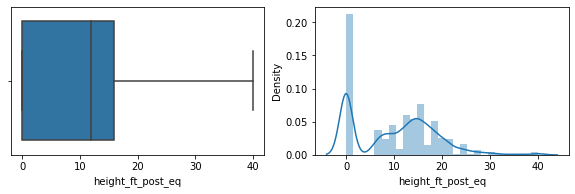

In [295]:
show_outlier_test('height_ft_post_eq')

<AxesSubplot:xlabel='height_ft_post_eq'>

<AxesSubplot:xlabel='height_ft_post_eq', ylabel='Density'>

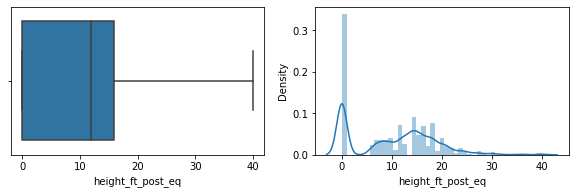

In [296]:
show_outlier_train('height_ft_post_eq')

In [297]:
x_train.columns

Index(['area_assesed', 'district_id', 'has_geotechnical_risk',
       'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'has_repair_started', 'vdcmun_id', 'ward_id', 'legal_ownership_status',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_t

# land_surface_condition

In [298]:
check_null_duplicate('land_surface_condition')

................................... land_surface_condition ......................................
null value in training data: 0
null value in testing data: 0
----------------------------------------------------------------------------------------------------
Duplicate value in training data: 0
Duplicate value in testing data: 0
----------------------------------------------------------------------------------------------------
Unique value in training data: ['Flat' 'Moderate slope' 'Steep slope']
Unique value in testing data: ['Flat' 'Moderate slope' 'Steep slope']


In [299]:
x_train.land_surface_condition.value_counts()

Flat              33312
Moderate slope     5457
Steep slope        1231
Name: land_surface_condition, dtype: int64

In [300]:
x_train.shape

(40000, 57)

In [301]:
land_surface_condition_train=pd.get_dummies(x_train['land_surface_condition'],drop_first=True,prefix='land_surface_condition')
land_surface_condition_test=pd.get_dummies(x_test['land_surface_condition'],drop_first=True,prefix='land_surface_condition')

x_train=x_train.join(land_surface_condition_train)
x_test=x_test.join(land_surface_condition_test)

In [302]:
x_test.shape

(10000, 59)

# foundation_type

In [303]:
x_train.foundation_type.value_counts()

Mud mortar-Stone/Brick    33647
Bamboo/Timber              2259
Cement-Stone/Brick         2207
RC                         1637
Other                       250
Name: foundation_type, dtype: int64

In [304]:
train1=pd.get_dummies(x_train['foundation_type'],drop_first=True,prefix='foundation_type')
test1=pd.get_dummies(x_test['foundation_type'],drop_first=True,prefix='foundation_type')

In [305]:
x_train=x_train.join(train1)

In [306]:
x_test=x_test.join(test1)

In [307]:
x_train.shape

(40000, 63)

# roof_type

In [308]:
x_train.roof_type.value_counts()

Bamboo/Timber-Light roof    27998
Bamboo/Timber-Heavy roof     9477
RCC/RB/RBC                   2525
Name: roof_type, dtype: int64

In [309]:
train1=pd.get_dummies(x_train['roof_type'],drop_first=True,prefix='roof_type')

In [310]:
test1=pd.get_dummies(x_test['roof_type'],drop_first=True,prefix='roof_type')

In [311]:
x_train=x_train.join(train1)

In [312]:
x_test=x_test.join(test1)

In [313]:
x_train.shape

(40000, 65)

# ground_floor_type

In [314]:
x_train.ground_floor_type.value_counts()

Mud            32054
RC              3887
Brick/Stone     3821
Timber           168
Other             70
Name: ground_floor_type, dtype: int64

In [315]:
train1=pd.get_dummies(x_train['ground_floor_type'],drop_first=True,prefix='ground_floor_type')
test1=pd.get_dummies(x_test['ground_floor_type'],drop_first=True,prefix='ground_floor_type')

x_train=x_train.join(train1)
x_test=x_test.join(test1)

In [316]:
x_train.shape

(40000, 69)

# other_floor_type

In [317]:
x_train.other_floor_type.value_counts()

TImber/Bamboo-Mud    25234
Timber-Planck         6737
Not applicable        6139
RCC/RB/RBC            1890
Name: other_floor_type, dtype: int64

In [318]:
train1=pd.get_dummies(x_train['other_floor_type'],drop_first=True,prefix='other_floor_type')
test1=pd.get_dummies(x_test['other_floor_type'],drop_first=True,prefix='other_floor_type')

x_train=x_train.join(train1)
x_test=x_test.join(test1)

In [319]:
x_train.shape

(40000, 72)

# position

In [320]:
x_test.position.value_counts()

Not attached       7701
Attached-1 side    1699
Attached-2 side     508
Attached-3 side      92
Name: position, dtype: int64

In [321]:
train1=pd.get_dummies(x_train['position'],drop_first=True,prefix='position')
test1=pd.get_dummies(x_test['position'],drop_first=True,prefix='position')

x_train=x_train.join(train1)
x_test=x_test.join(test1)

In [322]:
x_train.shape

(40000, 75)

# plan_configuration

In [323]:
x_test.plan_configuration.value_counts()

Rectangular                        9600
Square                              215
L-shape                             138
T-shape                              18
Others                               12
Multi-projected                      11
E-shape                               2
U-shape                               2
H-shape                               1
Building with Central Courtyard       1
Name: plan_configuration, dtype: int64

In [324]:
train1=pd.get_dummies(x_train['plan_configuration'],drop_first=True,prefix='plan_configuration')
test1=pd.get_dummies(x_test['plan_configuration'],drop_first=True,prefix='plan_configuration')

x_train=x_train.join(train1)
x_test=x_test.join(test1)

In [325]:
x_train.shape

(40000, 84)

In [326]:
x_test.columns

Index(['area_assesed', 'district_id', 'has_geotechnical_risk',
       'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'has_repair_started', 'vdcmun_id', 'ward_id', 'legal_ownership_status',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_t

In [327]:
list2=['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']

In [328]:
for column in list2:
    check_null_duplicate(column)
    print('-'*50)
    print(x_train[column].unique())
    print(x_test[column].unique())
    print('-'*50)
    print(x_train[column].value_counts())
    print(x_test[column].value_counts())

................................... has_superstructure_adobe_mud ......................................
null value in training data: 0
null value in testing data: 0
----------------------------------------------------------------------------------------------------
Duplicate value in training data: 0
Duplicate value in testing data: 0
----------------------------------------------------------------------------------------------------
Unique value in training data: [1. 0.]
Unique value in testing data: [0. 1.]
--------------------------------------------------
[1. 0.]
[0. 1.]
--------------------------------------------------
0.0    36418
1.0     3582
Name: has_superstructure_adobe_mud, dtype: int64
0.0    9181
1.0     819
Name: has_superstructure_adobe_mud, dtype: int64
................................... has_superstructure_mud_mortar_stone ......................................
null value in training data: 0
null value in testing data: 0
-----------------------------------------------

In [329]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 4618 to 21151
Data columns (total 84 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   area_assesed                            40000 non-null  object 
 1   district_id                             40000 non-null  float64
 2   has_geotechnical_risk                   40000 non-null  float64
 3   has_geotechnical_risk_fault_crack       40000 non-null  int64  
 4   has_geotechnical_risk_flood             40000 non-null  int64  
 5   has_geotechnical_risk_land_settlement   40000 non-null  int64  
 6   has_geotechnical_risk_landslide         40000 non-null  int64  
 7   has_geotechnical_risk_liquefaction      40000 non-null  int64  
 8   has_geotechnical_risk_other             40000 non-null  int64  
 9   has_geotechnical_risk_rock_fall         40000 non-null  int64  
 10  has_repair_started                      40000 non-null 

In [330]:
x_train.drop(columns=['area_assesed','legal_ownership_status','land_surface_condition',
                      'foundation_type','roof_type','ground_floor_type','other_floor_type',
                      'position','plan_configuration'],inplace=True)

In [331]:
x_train.shape

(40000, 75)

In [332]:
x_test.drop(columns=['area_assesed','legal_ownership_status','land_surface_condition',
                     'foundation_type','roof_type','ground_floor_type','other_floor_type',
                     'position','plan_configuration'],inplace=True)

In [333]:
x_test.shape

(10000, 75)

<AxesSubplot:>

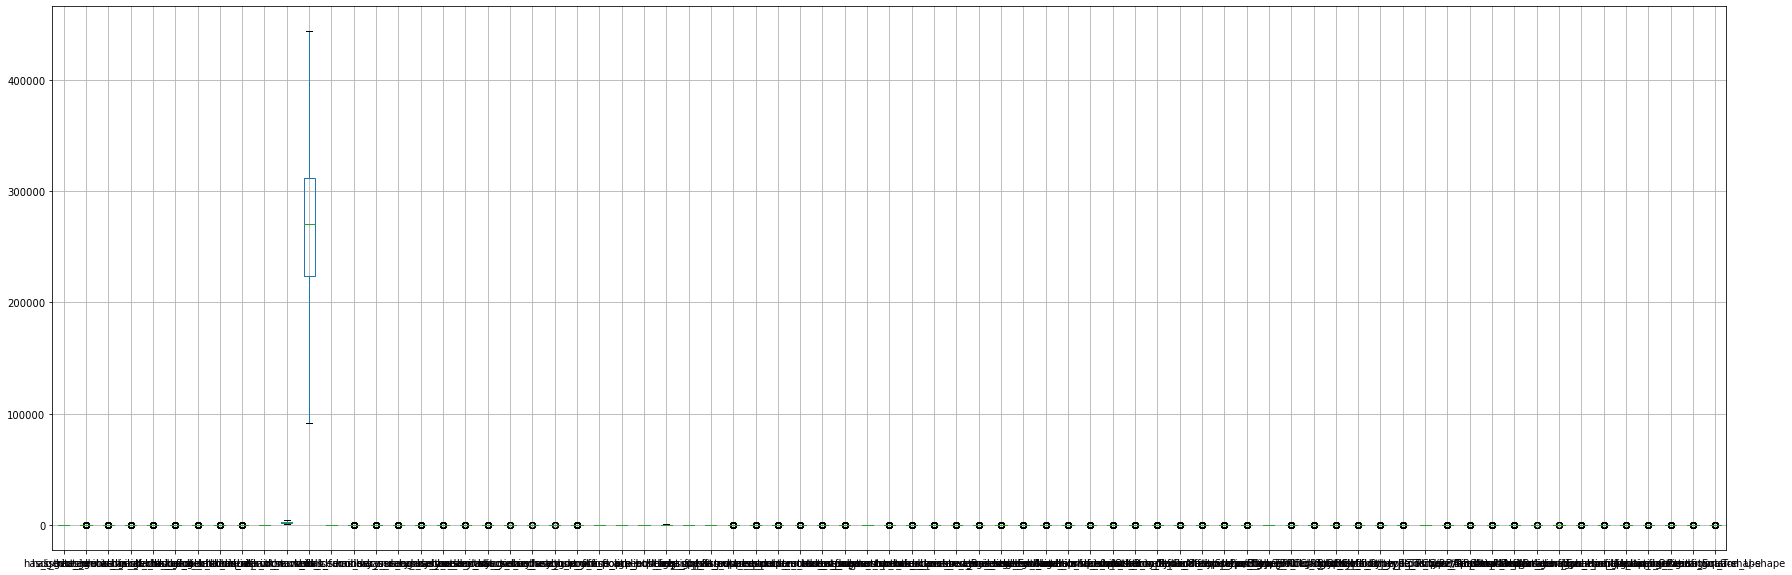

In [334]:
plt.figure(figsize=(30,10))
x_train.boxplot()

In [335]:
x_train.shape

(40000, 75)

In [336]:
x_test.shape

(10000, 75)

In [337]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 4618 to 21151
Data columns (total 75 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   district_id                             40000 non-null  float64
 1   has_geotechnical_risk                   40000 non-null  float64
 2   has_geotechnical_risk_fault_crack       40000 non-null  int64  
 3   has_geotechnical_risk_flood             40000 non-null  int64  
 4   has_geotechnical_risk_land_settlement   40000 non-null  int64  
 5   has_geotechnical_risk_landslide         40000 non-null  int64  
 6   has_geotechnical_risk_liquefaction      40000 non-null  int64  
 7   has_geotechnical_risk_other             40000 non-null  int64  
 8   has_geotechnical_risk_rock_fall         40000 non-null  int64  
 9   has_repair_started                      40000 non-null  float64
 10  vdcmun_id                               40000 non-null 

# Feature Selection

In [338]:
x_train

district_id  has_geotechnical_risk  has_geotechnical_risk_fault_crack  \
4618          27.0                    0.0                                  0   
17107         40.0                    0.0                                  0   
45433         38.0                    0.0                                  0   
3828          20.0                    0.0                                  0   
24588         37.0                    0.0                                  0   
...            ...                    ...                                ...   
17051         22.0                    1.0                                  0   
7352          27.0                    0.0                                  0   
8677          21.0                    0.0                                  0   
769           28.0                    0.0                                  0   
21151         31.0                    0.0                                  0   

       has_geotechnical_risk_flood  has_geotechnical_risk_land_settlement  \
4618                             0                                      0   
17107                            0                                      0   
45433                            0                                      0   
3828                             0                                      0   
24588                            0                                      0   
...                            ...                                    ...   
17051                            0                                      0   
7352                             0                                      0   
8677                             0                                      0   
769                              0                                      0   
21151                            0                                      0   

       has_geotechnical_risk_landslide  has_geotechnical_risk_liquefaction  \
4618                                 0                                   0   
17107                                0                                   0   
45433                                0                                   0   
3828                                 0                                   0   
24588                                0                                   0   
...                                ...                                 ...   
17051                                1                                   0   
7352                                 0                                   0   
8677                                 0                                   0   
769                                  0                                   0   
21151                                0                                   0   

       has_geotechnical_risk_other  has_geotechnical_risk_rock_fall  \
4618                             0                                0   
17107                            0                                0   
45433                            0                                0   
3828                             0                                0   
24588                            0                                0   
...                            ...                              ...   
17051                            0                                1   
7352                             0                                0   
8677                             0                                0   
769                              0                                0   
21151                            0                                0   

       has_repair_started  ...  position_Not attached  \
4618                  0.0  ...                      0   
17107                 1.0  ...                      1   
45433                 1.0  ...                      0   
3828                  1.0  ...                      1   
24588                 0.0  ...                

In [339]:
x_train.corr()

district_id  has_geotechnical_risk  \
district_id                               1.000000              -0.048726   
has_geotechnical_risk                    -0.048726               1.000000   
has_geotechnical_risk_fault_crack        -0.032519               0.559537   
has_geotechnical_risk_flood              -0.012077               0.248716   
has_geotechnical_risk_land_settlement    -0.035891               0.501590   
...                                            ...                    ...   
plan_configuration_Others                 0.019056               0.003614   
plan_configuration_Rectangular           -0.001254               0.000389   
plan_configuration_Square                 0.013420               0.007218   
plan_configuration_T-shape               -0.007942               0.000455   
plan_configuration_U-shape               -0.010777               0.001363   

                                       has_geotechnical_risk_fault_crack  \
district_id                                                    -0.032519   
has_geotechnical_risk                                           0.559537   
has_geotechnical_risk_fault_crack                               1.000000   
has_geotechnical_risk_flood                                     0.059791   
has_geotechnical_risk_land_settlement                           0.437041   
...                                                                  ...   
plan_configuration_Others                                      -0.005749   
plan_configuration_Rectangular                                  0.008262   
plan_configuration_Square                                       0.000320   
plan_configuration_T-shape                                     -0.003566   
plan_configuration_U-shape                                     -0.004809   

                                       has_geotechnical_risk_flood  \
district_id                                              -0.012077   
has_geotechnical_risk                                     0.248716   
has_geotechnical_risk_fault_crack                         0.059791   
has_geotechnical_risk_flood                               1.000000   
has_geotechnical_risk_land_settlement                     0.046444   
...                                                            ...   
plan_configuration_Others                                -0.002555   
plan_configuration_Rectangular                           -0.022092   
plan_configuration_Square                                 0.017040   
plan_configuration_T-shape                               -0.003199   
plan_configuration_U-shape                                0.021467   

                                       has_geotechnical_risk_land_settlement  \
district_id                                                        -0.035891   
has_geotechnical_risk                                               0.501590   
has_geotechnical_risk_fault_crack                                   0.437041   
has_geotechnical_risk_flood                                         0.046444   
has_geotechnical_risk_land_settlement                               1.000000   
...                                                                      ...   
plan_configuration_Others                                          -0.000127   
plan_configuration_Rectangular                                     -0.000588   
plan_configuration_Square                                           0.000481   
plan_configuration_T-shape                                          0.005598   
plan_configuration_U-shape                                          0.001696   

                                       has_geotechnical_risk_landslide  \
district_id                                                  -0.029791   
has_geotechnical_risk                                         0.731422   
has_geotechnical_risk_fault_crack                             0.215977   
has_geotechnical_risk_flood                                   0.148222   
has_geotechnical_risk_land_se

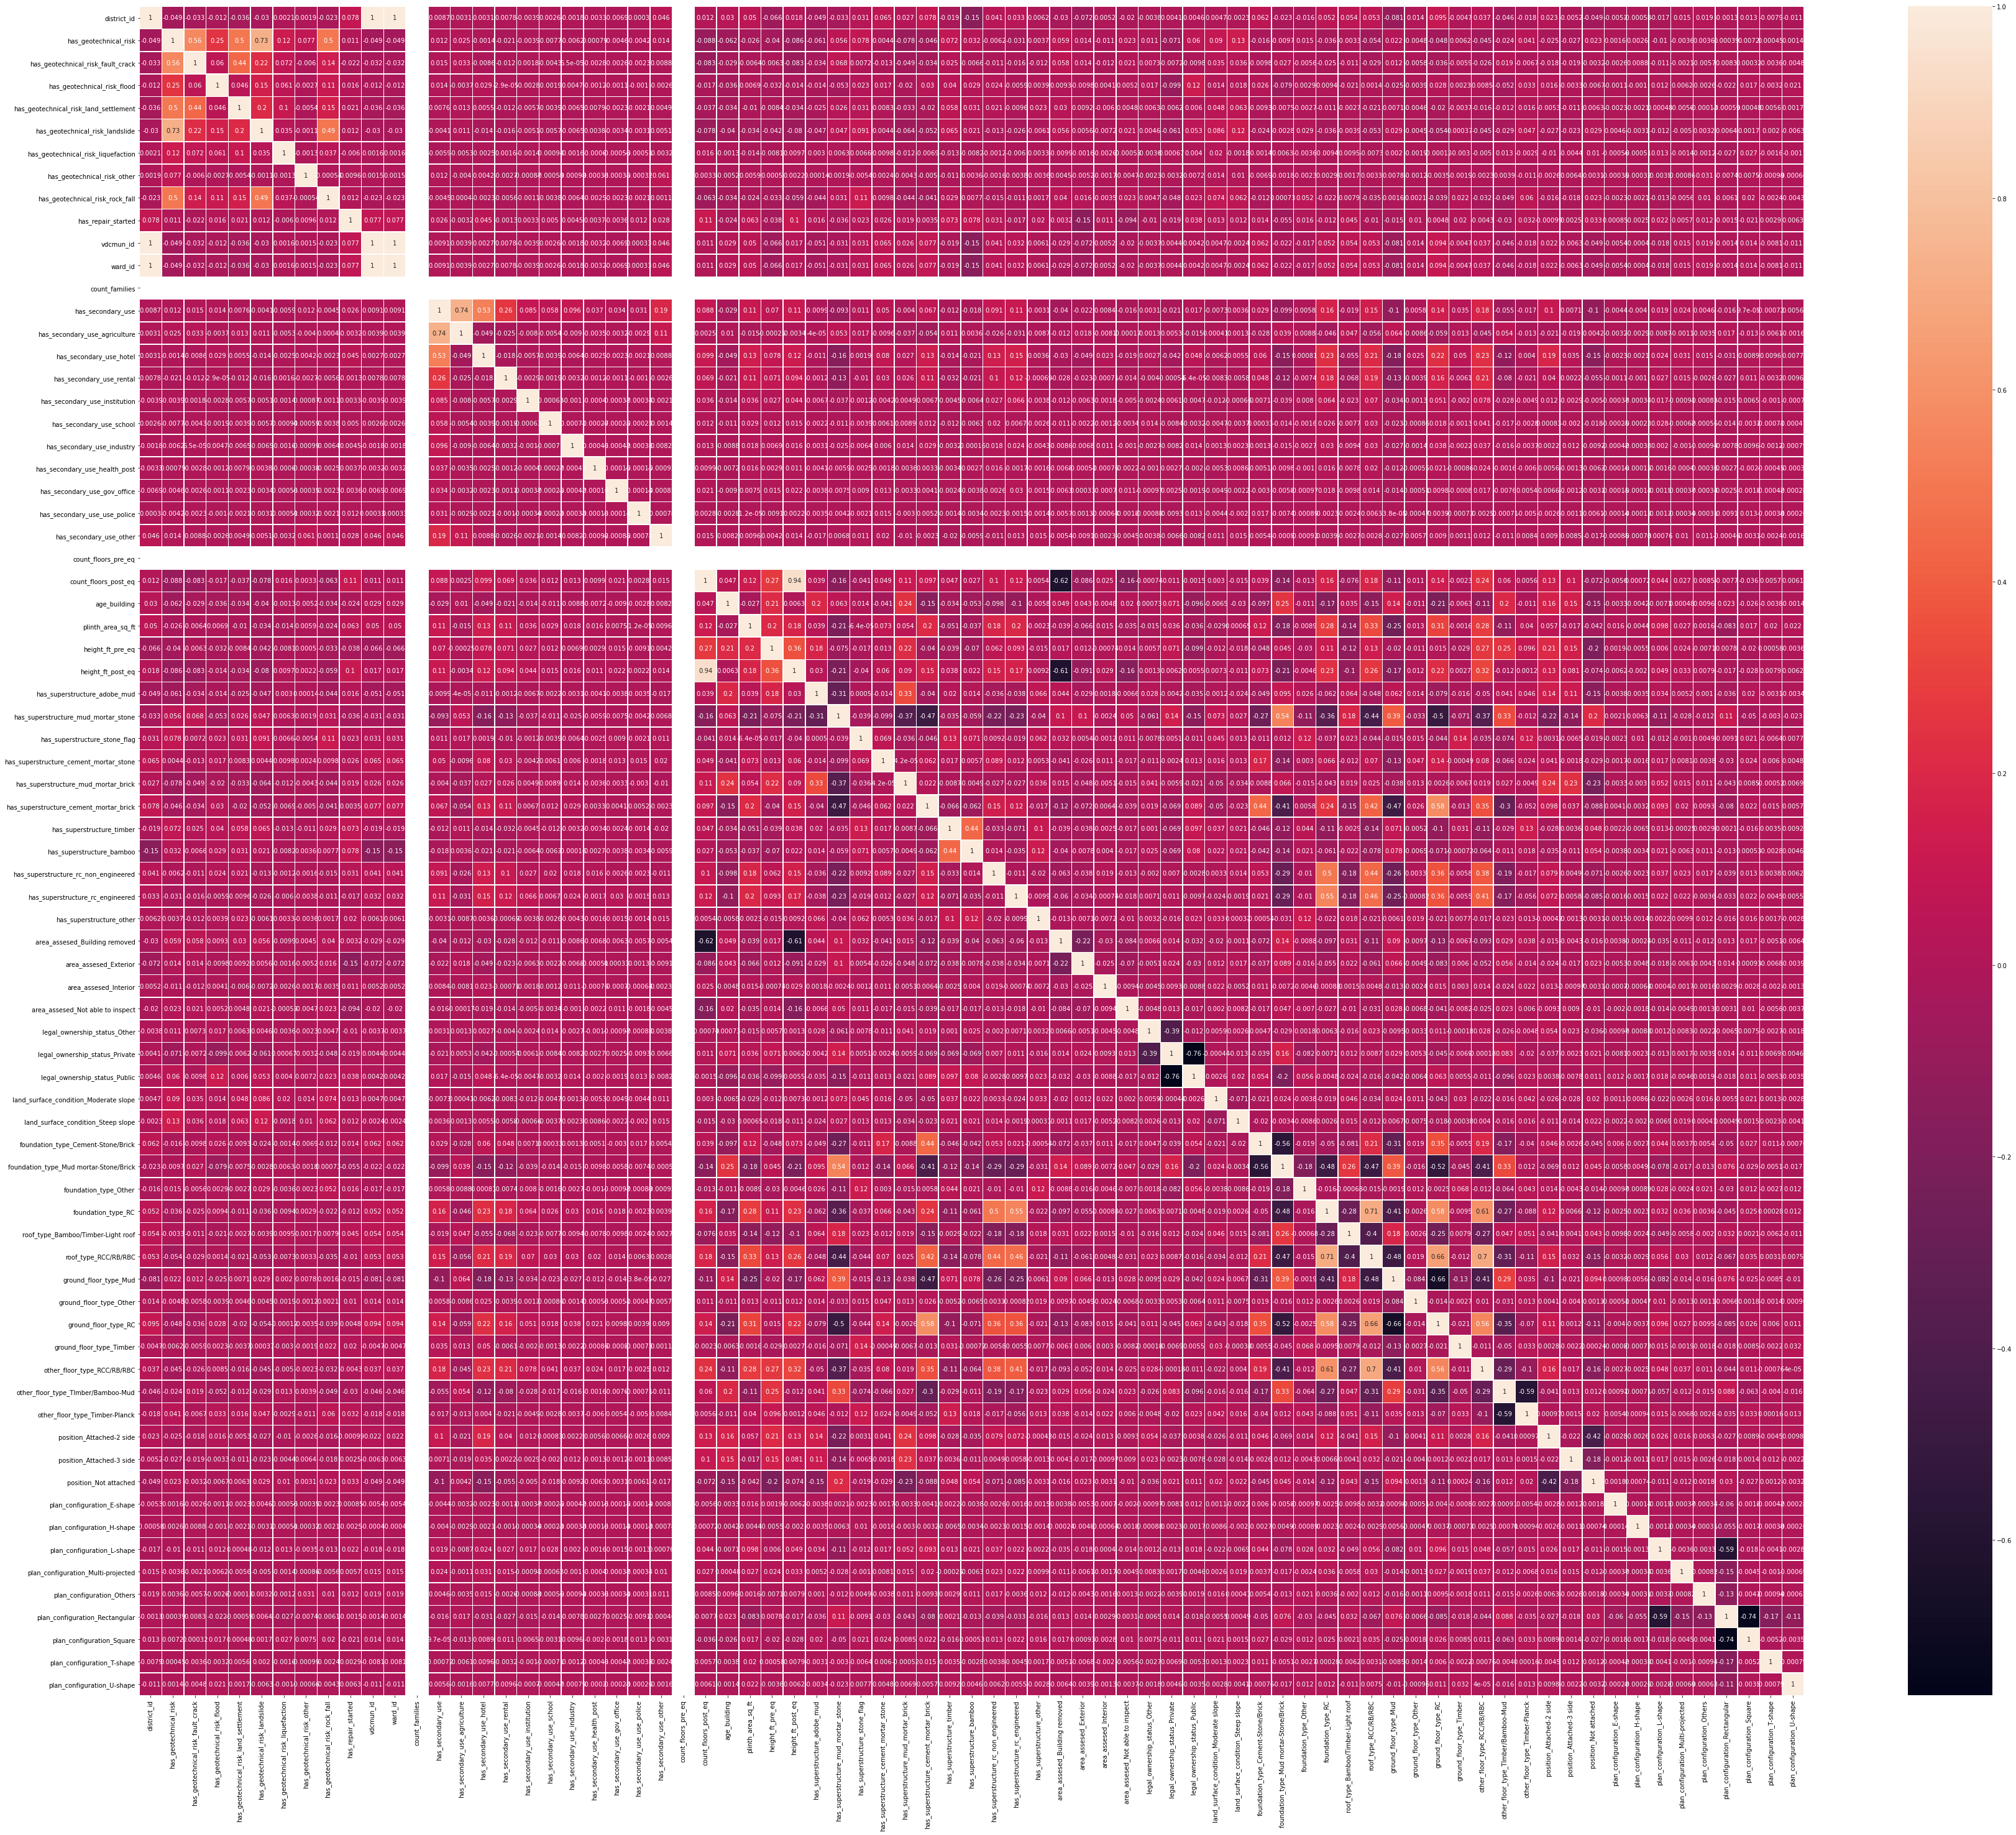

In [340]:
plt.figure(figsize=(60,50))
sns.heatmap(x_train.corr(),annot=True,linewidths=0.5)
plt.savefig('heatmap_train.jpeg')

In [341]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [342]:
import statsmodels

In [343]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [344]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [345]:
x_train.columns

Index(['district_id', 'has_geotechnical_risk',
       'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'has_repair_started', 'vdcmun_id', 'ward_id', 'count_families',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_sto

In [346]:
y_test

7151     Grade 5
31810    Grade 3
14841    Grade 4
39617    Grade 3
4225     Grade 5
          ...   
32085    Grade 2
30897    Grade 5
19730    Grade 2
12837    Grade 3
11180    Grade 5
Name: damage_grade, Length: 10000, dtype: object

In [347]:
y_train = y_train.replace({'Grade 1':[1],'Grade 2':[2],'Grade 3':[3],'Grade 4':[4],'Grade 5':[5]})

In [348]:
y_test = y_test.replace({'Grade 1':[1],'Grade 2':[2],'Grade 3':[3],'Grade 4':[4],'Grade 5':[5]})

In [349]:
y_test

7151     5
31810    3
14841    4
39617    3
4225     5
        ..
32085    2
30897    5
19730    2
12837    3
11180    5
Name: damage_grade, Length: 10000, dtype: int64

In [350]:
from sklearn.linear_model import LogisticRegression

In [351]:
log_model = LogisticRegression(random_state=10)
log_model.fit(x_train,y_train)

LogisticRegression(random_state=10)

In [352]:
log_model.score(x_train,y_train)

0.504125

In [353]:
log_model = LogisticRegression(random_state=10)
log_model.fit(x_test,y_test)

LogisticRegression(random_state=10)

In [354]:
log_model.score(x_test,y_test)

0.5103

In [355]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(40000, 75)
(40000,)
(10000, 75)
(10000,)


In [356]:
x_train.columns

Index(['district_id', 'has_geotechnical_risk',
       'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'has_repair_started', 'vdcmun_id', 'ward_id', 'count_families',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_sto

In [357]:
df.plan_configuration.unique()

array(['Rectangular', 'Square', 'L-shape', 'Multi-projected', 'Others',
       'Building with Central Courtyard', 'U-shape', 'T-shape', 'E-shape',
       'H-shape'], dtype=object)

In [358]:
for i in range(len(x_train.columns)):
    print(x_train.columns[i],"==",x_test.columns[i])

district_id == district_id
has_geotechnical_risk == has_geotechnical_risk
has_geotechnical_risk_fault_crack == has_geotechnical_risk_fault_crack
has_geotechnical_risk_flood == has_geotechnical_risk_flood
has_geotechnical_risk_land_settlement == has_geotechnical_risk_land_settlement
has_geotechnical_risk_landslide == has_geotechnical_risk_landslide
has_geotechnical_risk_liquefaction == has_geotechnical_risk_liquefaction
has_geotechnical_risk_other == has_geotechnical_risk_other
has_geotechnical_risk_rock_fall == has_geotechnical_risk_rock_fall
has_repair_started == has_repair_started
vdcmun_id == vdcmun_id
ward_id == ward_id
count_families == count_families
has_secondary_use == has_secondary_use
has_secondary_use_agriculture == has_secondary_use_agriculture
has_secondary_use_hotel == has_secondary_use_hotel
has_secondary_use_rental == has_secondary_use_rental
has_secondary_use_institution == has_secondary_use_institution
has_secondary_use_school == has_secondary_use_school
has_secondary

In [359]:
data = pd.concat([x_train,y_train],axis=1)

In [360]:
data

district_id  has_geotechnical_risk  has_geotechnical_risk_fault_crack  \
4618          27.0                    0.0                                  0   
17107         40.0                    0.0                                  0   
45433         38.0                    0.0                                  0   
3828          20.0                    0.0                                  0   
24588         37.0                    0.0                                  0   
...            ...                    ...                                ...   
17051         22.0                    1.0                                  0   
7352          27.0                    0.0                                  0   
8677          21.0                    0.0                                  0   
769           28.0                    0.0                                  0   
21151         31.0                    0.0                                  0   

       has_geotechnical_risk_flood  has_geotechnical_risk_land_settlement  \
4618                             0                                      0   
17107                            0                                      0   
45433                            0                                      0   
3828                             0                                      0   
24588                            0                                      0   
...                            ...                                    ...   
17051                            0                                      0   
7352                             0                                      0   
8677                             0                                      0   
769                              0                                      0   
21151                            0                                      0   

       has_geotechnical_risk_landslide  has_geotechnical_risk_liquefaction  \
4618                                 0                                   0   
17107                                0                                   0   
45433                                0                                   0   
3828                                 0                                   0   
24588                                0                                   0   
...                                ...                                 ...   
17051                                1                                   0   
7352                                 0                                   0   
8677                                 0                                   0   
769                                  0                                   0   
21151                                0                                   0   

       has_geotechnical_risk_other  has_geotechnical_risk_rock_fall  \
4618                             0                                0   
17107                            0                                0   
45433                            0                                0   
3828                             0                                0   
24588                            0                                0   
...                            ...                              ...   
17051                            0                                1   
7352                             0                                0   
8677                             0                                0   
769                              0                                0   
21151                            0                                0   

       has_repair_started  ...  plan_configuration_E-shape  \
4618                  0.0  ...                           0   
17107                 1.0  ...                           0   
45433                 1.0  ...                           0   
3828                  1.0  ...                           0   
24588                

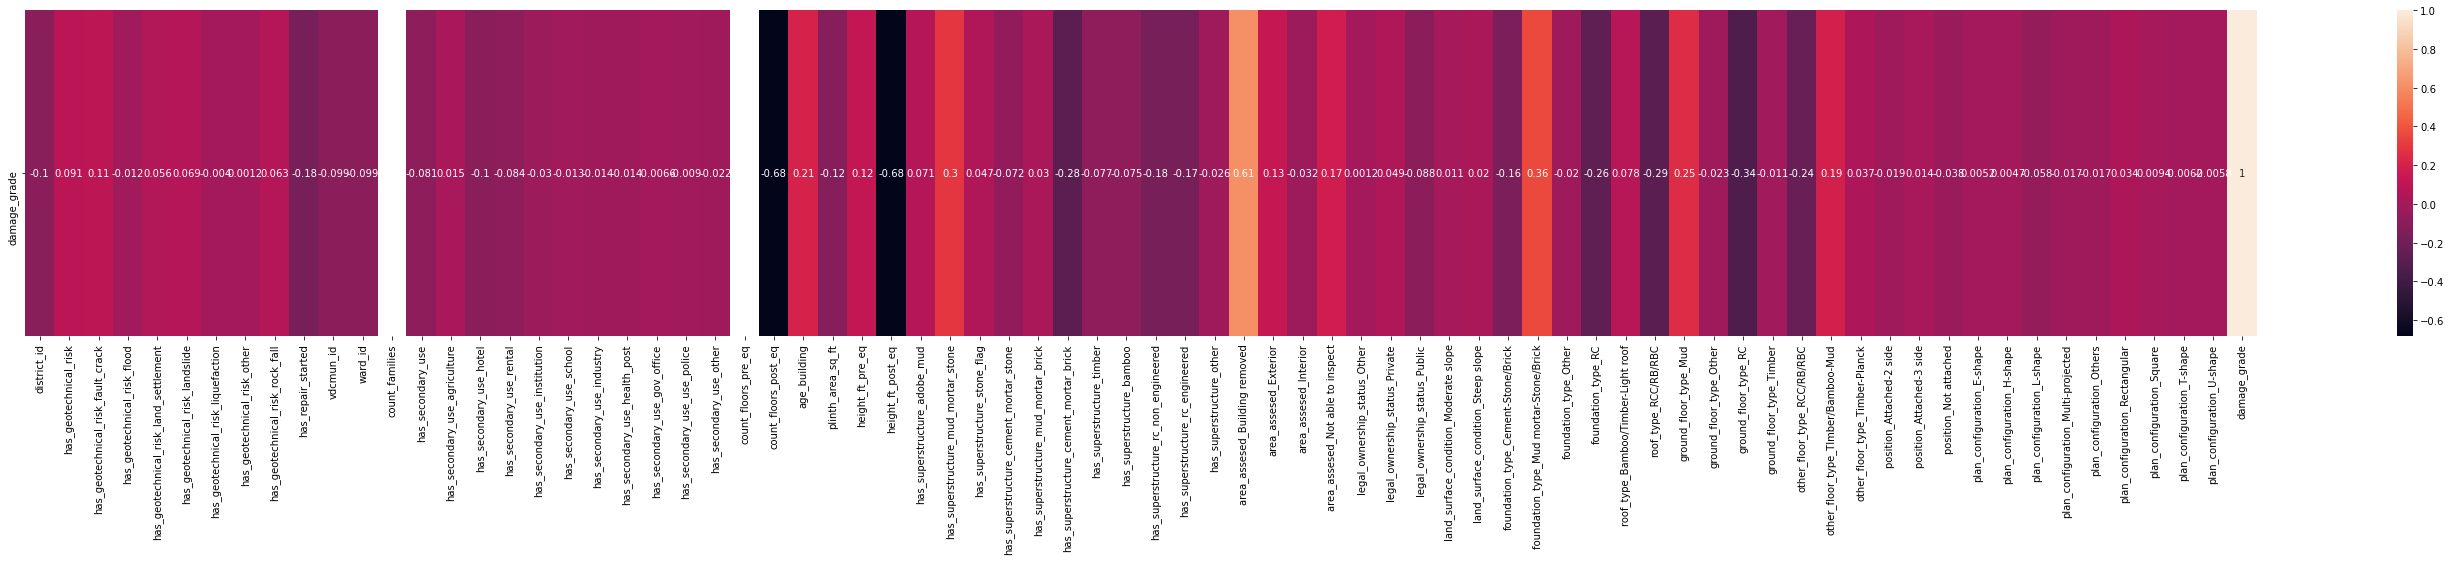

In [361]:
corr = data.corr(method='spearman').tail(1)
plt.figure(figsize=(50,6))
sns.heatmap(corr,annot=True)
plt.savefig('spearman_corr.jpeg')

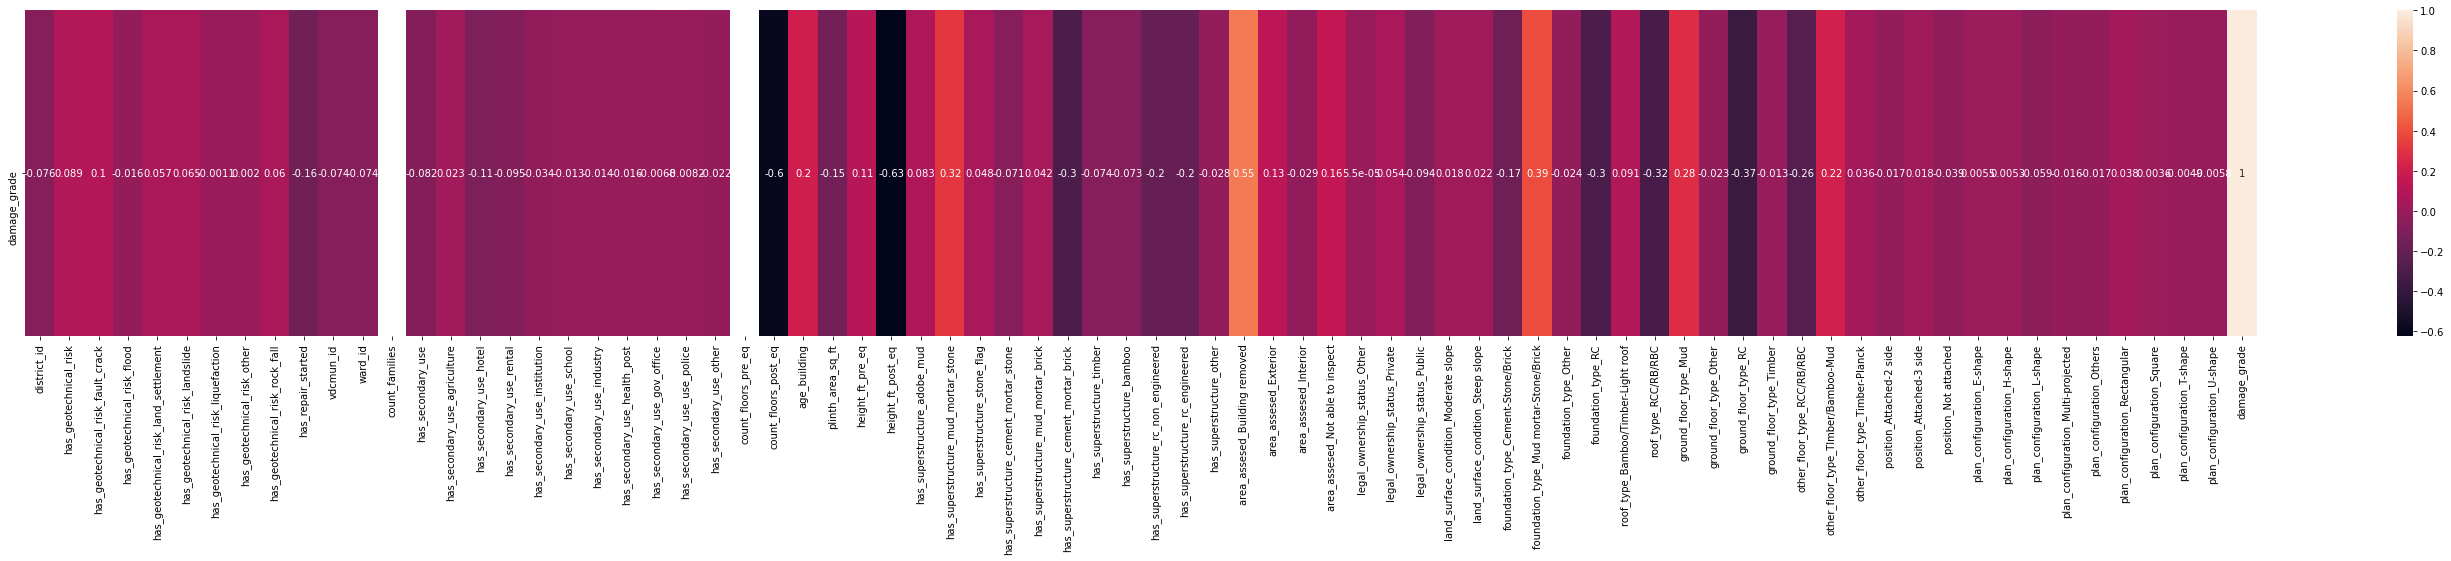

In [362]:
corr = data.corr().tail(1)
plt.figure(figsize=(50,6))
sns.heatmap(corr,annot=True)
plt.savefig('pearson_corr.jpeg')

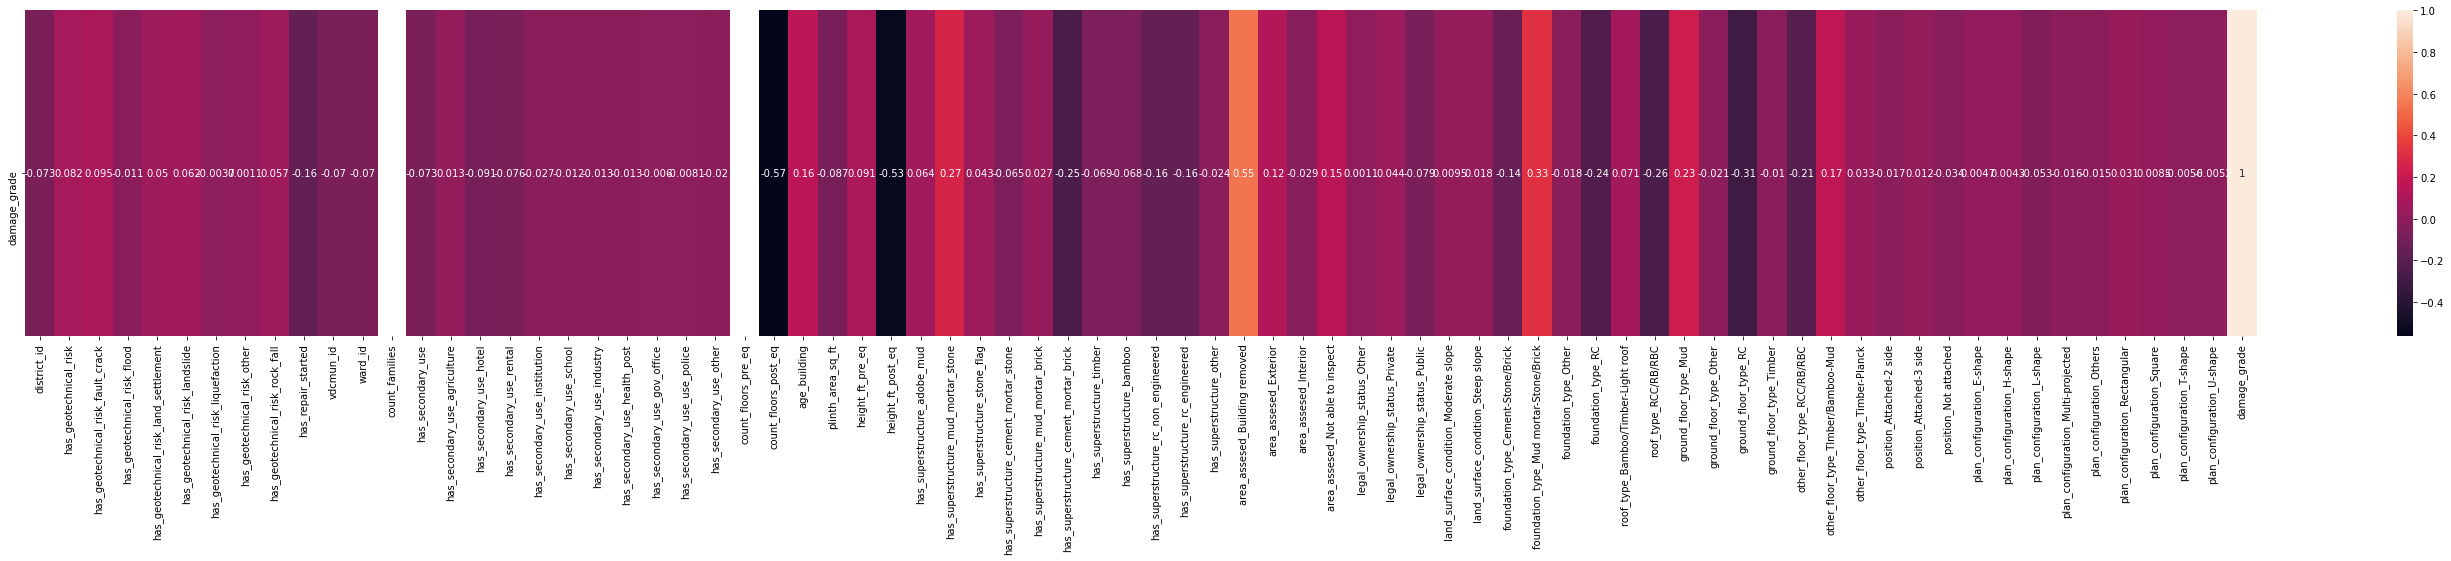

In [363]:
corr = data.corr(method='kendall').tail(1)
plt.figure(figsize=(50,6))
sns.heatmap(corr,annot=True)
plt.savefig('pearson_corr.jpeg')

In [364]:
data.corr().tail(1)

district_id  has_geotechnical_risk  \
damage_grade    -0.075948               0.089177   

              has_geotechnical_risk_fault_crack  has_geotechnical_risk_flood  \
damage_grade                           0.102984                    -0.015867   

              has_geotechnical_risk_land_settlement  \
damage_grade                               0.057485   

              has_geotechnical_risk_landslide  \
damage_grade                         0.064754   

              has_geotechnical_risk_liquefaction  has_geotechnical_risk_other  \
damage_grade                           -0.001091                     0.002003   

              has_geotechnical_risk_rock_fall  has_repair_started  ...  \
damage_grade                         0.060134           -0.156478  ...   

              plan_configuration_E-shape  plan_configuration_H-shape  \
damage_grade                    0.005461                    0.005265   

              plan_configuration_L-shape  plan_configuration_Multi-projected  \
damage_grade                   -0.058536                           -0.016094   

              plan_configuration_Others  plan_configuration_Rectangular  \
damage_grade                  -0.017323                        0.038359   

              plan_configuration_Square  plan_configuration_T-shape  \
damage_grade                   0.003568                   -0.004928   

              plan_configuration_U-shape  damage_grade  
damage_grade                    -0.00579           1.0  

[1 rows x 76 columns]

In [365]:
data.corr(method='pearson').tail(1)

district_id  has_geotechnical_risk  \
damage_grade    -0.075948               0.089177   

              has_geotechnical_risk_fault_crack  has_geotechnical_risk_flood  \
damage_grade                           0.102984                    -0.015867   

              has_geotechnical_risk_land_settlement  \
damage_grade                               0.057485   

              has_geotechnical_risk_landslide  \
damage_grade                         0.064754   

              has_geotechnical_risk_liquefaction  has_geotechnical_risk_other  \
damage_grade                           -0.001091                     0.002003   

              has_geotechnical_risk_rock_fall  has_repair_started  ...  \
damage_grade                         0.060134           -0.156478  ...   

              plan_configuration_E-shape  plan_configuration_H-shape  \
damage_grade                    0.005461                    0.005265   

              plan_configuration_L-shape  plan_configuration_Multi-projected  \
damage_grade                   -0.058536                           -0.016094   

              plan_configuration_Others  plan_configuration_Rectangular  \
damage_grade                  -0.017323                        0.038359   

              plan_configuration_Square  plan_configuration_T-shape  \
damage_grade                   0.003568                   -0.004928   

              plan_configuration_U-shape  damage_grade  
damage_grade                    -0.00579           1.0  

[1 rows x 76 columns]

In [366]:
data.corr(method='kendall').tail(1)

district_id  has_geotechnical_risk  \
damage_grade    -0.072873               0.082441   

              has_geotechnical_risk_fault_crack  has_geotechnical_risk_flood  \
damage_grade                           0.094914                    -0.010791   

              has_geotechnical_risk_land_settlement  \
damage_grade                               0.050361   

              has_geotechnical_risk_landslide  \
damage_grade                         0.062123   

              has_geotechnical_risk_liquefaction  has_geotechnical_risk_other  \
damage_grade                           -0.003656                     0.001079   

              has_geotechnical_risk_rock_fall  has_repair_started  ...  \
damage_grade                         0.056848           -0.158809  ...   

              plan_configuration_E-shape  plan_configuration_H-shape  \
damage_grade                    0.004683                    0.004282   

              plan_configuration_L-shape  plan_configuration_Multi-projected  \
damage_grade                   -0.052793                           -0.015614   

              plan_configuration_Others  plan_configuration_Rectangular  \
damage_grade                  -0.015028                        0.031059   

              plan_configuration_Square  plan_configuration_T-shape  \
damage_grade                   0.008457                    -0.00557   

              plan_configuration_U-shape  damage_grade  
damage_grade                   -0.005238           1.0  

[1 rows x 76 columns]

# fisher_score

In [367]:
!pip install skfeature

ERROR: Could not find a version that satisfies the requirement skfeature
ERROR: No matching distribution found for skfeature


In [368]:
data.var()

district_id                              58.847332
has_geotechnical_risk                     0.108100
has_geotechnical_risk_fault_crack         0.040397
has_geotechnical_risk_flood               0.008551
has_geotechnical_risk_land_settlement     0.033008
                                           ...    
plan_configuration_Rectangular            0.038723
plan_configuration_Square                 0.021803
plan_configuration_T-shape                0.001174
plan_configuration_U-shape                0.000525
damage_grade                              1.767472
Length: 76, dtype: float64

In [369]:
data.district_id.var()

58.84733161313126

In [370]:
for column in data:
    print(column,'>>>',data[column].var())

district_id >>> 58.84733161313126
has_geotechnical_risk >>> 0.10809981249536947
has_geotechnical_risk_fault_crack >>> 0.04039727930694811
has_geotechnical_risk_flood >>> 0.008550823145580684
has_geotechnical_risk_land_settlement >>> 0.033007894572338874
has_geotechnical_risk_landslide >>> 0.06508012637811499
has_geotechnical_risk_liquefaction >>> 0.002070746143652523
has_geotechnical_risk_other >>> 0.0008243399834995059
has_geotechnical_risk_rock_fall >>> 0.03254180792020289
has_repair_started >>> 0.21059308920216144
vdcmun_id >>> 583876.5237490474
ward_id >>> 5838760582.571016
count_families >>> 0.0
has_secondary_use >>> 0.10025285569640922
has_secondary_use_agriculture >>> 0.06060247506187837
has_secondary_use_hotel >>> 0.0329846021150529
has_secondary_use_rental >>> 0.008649090602263204
has_secondary_use_institution >>> 0.0009241674791868797
has_secondary_use_school >>> 0.00042482999574969645
has_secondary_use_industry >>> 0.001173648716218664
has_secondary_use_health_post >>> 0.000

# variance_threshold

In [371]:
from sklearn.feature_selection import VarianceThreshold

In [372]:
var_th = VarianceThreshold(threshold = 0)
var_th.fit_transform(data)
arr = var_th.get_support()
data.columns[np.where(arr == False)]

Index(['count_families', 'count_floors_pre_eq'], dtype='object')

# Information gain

In [373]:
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression

In [374]:
log_model.fit(x_train,y_train)
log_model.score(x_train,y_train)

0.504125

In [375]:
df['district_id'].dtype == df['has_secondary_use_rental'].dtype

True

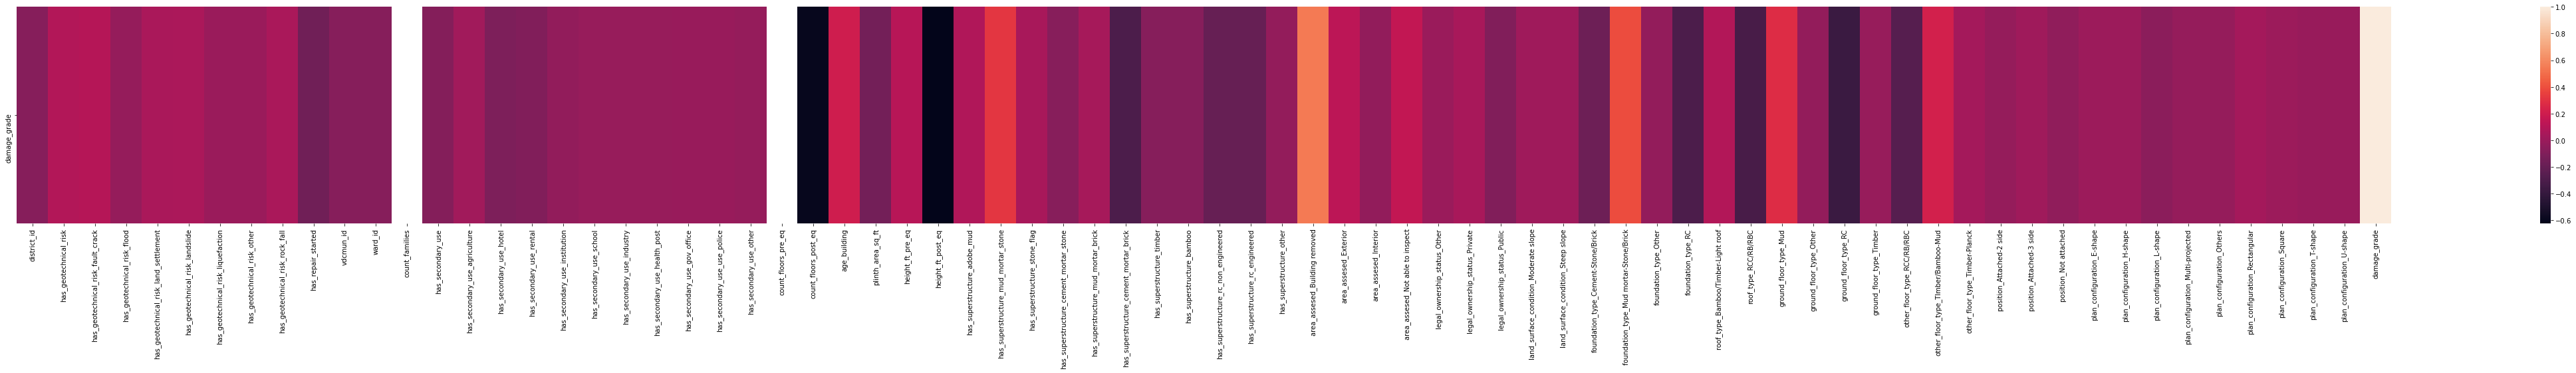

In [376]:
plt.figure(figsize=(80,6))
sns.heatmap(data.corr().tail(1))
plt.savefig('corr_.jpeg')

In [377]:
for i in data.columns:
    print(i)

district_id
has_geotechnical_risk
has_geotechnical_risk_fault_crack
has_geotechnical_risk_flood
has_geotechnical_risk_land_settlement
has_geotechnical_risk_landslide
has_geotechnical_risk_liquefaction
has_geotechnical_risk_other
has_geotechnical_risk_rock_fall
has_repair_started
vdcmun_id
ward_id
count_families
has_secondary_use
has_secondary_use_agriculture
has_secondary_use_hotel
has_secondary_use_rental
has_secondary_use_institution
has_secondary_use_school
has_secondary_use_industry
has_secondary_use_health_post
has_secondary_use_gov_office
has_secondary_use_use_police
has_secondary_use_other
count_floors_pre_eq
count_floors_post_eq
age_building
plinth_area_sq_ft
height_ft_pre_eq
height_ft_post_eq
has_superstructure_adobe_mud
has_superstructure_mud_mortar_stone
has_superstructure_stone_flag
has_superstructure_cement_mortar_stone
has_superstructure_mud_mortar_brick
has_superstructure_cement_mortar_brick
has_superstructure_timber
has_superstructure_bamboo
has_superstructure_rc_non_en

In [378]:
x_train['geotechnical_risk']=x_train['has_geotechnical_risk_fault_crack']+x_train['has_geotechnical_risk_flood']+x_train['has_geotechnical_risk_land_settlement']+x_train['has_geotechnical_risk_landslide']+x_train['has_geotechnical_risk_liquefaction']+x_train['has_geotechnical_risk_other']+x_train['has_geotechnical_risk_rock_fall']

In [379]:
x_test['geotechnical_risk']=x_test['has_geotechnical_risk_fault_crack']+x_test['has_geotechnical_risk_flood']+x_test['has_geotechnical_risk_land_settlement']+x_test['has_geotechnical_risk_landslide']+x_test['has_geotechnical_risk_liquefaction']+x_test['has_geotechnical_risk_other']+x_test['has_geotechnical_risk_rock_fall']

In [380]:
df.iloc[:,2:25].sample(20)

district_id  has_geotechnical_risk  has_geotechnical_risk_fault_crack  \
16877           28                    0.0                                  0   
49449           21                    0.0                                  0   
8357            13                    0.0                                  0   
25614           23                    1.0                                  0   
2483            21                    0.0                                  0   
45031           22                    0.0                                  0   
23519           27                    0.0                                  0   
721             27                    0.0                                  0   
40129           28                    0.0                                  0   
34979           24                    0.0                                  0   
2579            12                    0.0                                  0   
47852           24                    0.0                                  0   
48916           23                    1.0                                  0   
40746           11                    0.0                                  0   
19506           27                    0.0                                  0   
36905           31                    0.0                                  0   
33452           22                    0.0                                  0   
38863           24                    0.0                                  0   
16062           47                    0.0                                  0   
23234           38                    0.0                                  0   

       has_geotechnical_risk_flood  has_geotechnical_risk_land_settlement  \
16877                            0                                      0   
49449                            0                                      0   
8357                             0                                      0   
25614                            0                                      1   
2483                             0                                      0   
45031                            0                                      0   
23519                            0                                      0   
721                              0                                      0   
40129                            0                                      0   
34979                            0                                      0   
2579                             0                                      0   
47852                            0                                      0   
48916                            0                                      0   
40746                            0                                      0   
19506                            0                                      0   
36905                            0                                      0   
33452                            0                                      0   
38863                            0                                      0   
16062                            0                                      0   
23234                            0                                      0   

       has_geotechnical_risk_landslide  has_geotechnical_risk_liquefaction  \
16877                                0                                   0   
49449                                0                                   0   
8357                                 0                                   0   
25614                                1                                   0   
2483                                 0                                   0   
45031                                0                                   0   
23519                                0                                   0   
721                                  0                                   0   
40129 

In [381]:
x_train.sample(20)

district_id  has_geotechnical_risk  has_geotechnical_risk_fault_crack  \
6737          28.0                    0.0                                  0   
1296          24.0                    0.0                                  0   
2535          35.0                    0.0                                  0   
25416         44.5                    0.0                                  0   
16173         44.5                    0.0                                  0   
31301         28.0                    0.0                                  0   
38440         36.0                    0.0                                  0   
9750          22.0                    0.0                                  0   
41066         24.0                    0.0                                  0   
16375         24.0                    0.0                                  0   
16450         31.0                    0.0                                  0   
12861         30.0                    0.0                                  0   
29046         25.0                    0.0                                  0   
44582         13.0                    0.0                                  0   
35932         24.0                    0.0                                  0   
17543         24.0                    0.0                                  0   
12542         24.0                    0.0                                  0   
42444         13.0                    1.0                                  0   
22743         24.0                    0.0                                  0   
3493          37.0                    0.0                                  0   

       has_geotechnical_risk_flood  has_geotechnical_risk_land_settlement  \
6737                             0                                      0   
1296                             0                                      0   
2535                             0                                      0   
25416                            0                                      0   
16173                            0                                      0   
31301                            0                                      0   
38440                            0                                      0   
9750                             0                                      0   
41066                            0                                      0   
16375                            0                                      0   
16450                            0                                      0   
12861                            0                                      0   
29046                            0                                      0   
44582                            0                                      0   
35932                            0                                      0   
17543                            0                                      0   
12542                            0                                      0   
42444                            0                                      0   
22743                            0                                      0   
3493                             0                                      0   

       has_geotechnical_risk_landslide  has_geotechnical_risk_liquefaction  \
6737                                 0                                   0   
1296                                 0                                   0   
2535                                 0                                   0   
25416                                0                                   0   
16173                                0                                   0   
31301                                0                                   0   
38440                                0                                   0   
9750                                 0                                   0   
41066 

In [382]:
x_train.drop(columns=['has_geotechnical_risk_fault_crack',
'has_geotechnical_risk_flood',
'has_geotechnical_risk_land_settlement',
'has_geotechnical_risk_landslide',
'has_geotechnical_risk_liquefaction',
'has_geotechnical_risk_other',
'has_geotechnical_risk_rock_fall'],axis=1,inplace=True)

In [383]:
x_test.drop(columns=['has_geotechnical_risk_fault_crack',
'has_geotechnical_risk_flood',
'has_geotechnical_risk_land_settlement',
'has_geotechnical_risk_landslide',
'has_geotechnical_risk_liquefaction',
'has_geotechnical_risk_other',
'has_geotechnical_risk_rock_fall'],axis=1,inplace=True)

In [384]:
df

area_assesed damage_grade  district_id  has_geotechnical_risk  \
0                  Both      Grade 3           24                    0.0   
1                  Both      Grade 3           20                    0.0   
2                  Both      Grade 2           30                    0.0   
3      Building removed      Grade 5           27                    0.0   
4                  Both      Grade 4           24                    0.0   
...                 ...          ...          ...                    ...   
49995          Exterior      Grade 5           27                    0.0   
49996              Both      Grade 1           38                    0.0   
49997              Both      Grade 3           35                    0.0   
49998          Exterior      Grade 5           21                    1.0   
49999  Building removed      Grade 5           31                    0.0   

       has_geotechnical_risk_fault_crack  has_geotechnical_risk_flood  \
0                                      0                            0   
1                                      0                            0   
2                                      0                            0   
3                                      0                            0   
4                                      0                            0   
...                                  ...                          ...   
49995                                  0                            0   
49996                                  0                            0   
49997                                  0                            0   
49998                                  0                            0   
49999                                  0                            0   

       has_geotechnical_risk_land_settlement  has_geotechnical_risk_landslide  \
0                                          0                                0   
1                                          0                                0   
2                                          0                                0   
3                                          0                                0   
4                                          0                                0   
...                                      ...                              ...   
49995                                      0                                0   
49996                                      0                                0   
49997                                      0                                0   
49998                                      0                                0   
49999                                      0                                0   

       has_geotechnical_risk_liquefaction  has_geotechnical_risk_other  ...  \
0                                       0                            0  ...   
1                                       0                            0  ...   
2                                       0                            0  ...   
3                                       0                            0  ...   
4                                       0                            0  ...   
...                                   ...                          ...  ...   
49995                                   0                            0  ...   
49996                                   0                            0  ...   
49997                                   0                            0  ...   
49998                                   0                            0  ...   
49999                                   0                            0  ...   

       has_superstructure_stone_flag  has_superstructure_cement_mortar_stone  \
0                                0.0                                     0.0   
1                                0.0                                     0.0   
2                                0.0                       

In [385]:
 x_train.iloc[:,5:25].sample(10)

count_families  has_secondary_use  has_secondary_use_agriculture  \
28408             1.0                1.0                              1   
8311              1.0                1.0                              1   
26594             1.0                0.0                              0   
47368             1.0                0.0                              0   
2993              1.0                0.0                              0   
20778             1.0                0.0                              0   
42546             1.0                0.0                              0   
34710             1.0                0.0                              0   
23471             1.0                0.0                              0   
43808             1.0                0.0                              0   

       has_secondary_use_hotel  has_secondary_use_rental  \
28408                        0                         0   
8311                         0                         0   
26594                        0                         0   
47368                        0                         0   
2993                         0                         0   
20778                        0                         0   
42546                        0                         0   
34710                        0                         0   
23471                        0                         0   
43808                        0                         0   

       has_secondary_use_institution  has_secondary_use_school  \
28408                              0                         0   
8311                               0                         0   
26594                              0                         0   
47368                              0                         0   
2993                               0                         0   
20778                              0                         0   
42546                              0                         0   
34710                              0                         0   
23471                              0                         0   
43808                              0                         0   

       has_secondary_use_industry  has_secondary_use_health_post  \
28408                           0                              0   
8311                            0                              0   
26594                           0                              0   
47368                           0                              0   
2993                            0                              0   
20778                           0                              0   
42546                           0                              0   
34710                           0                              0   
23471                           0                              0   
43808                           0                              0   

       has_secondary_use_gov_office  has_secondary_use_use_police  \
28408                             0                             0   
8311                              0                             0   
26594                             0                             0   
47368                             0                             0   
2993                              0                             0   
20778                             0                             0   
42546                             0                             0   
34710                             0                             0   
23471                             0                             0   
43808                             0                             0   

       has_secondary_use_other  count_floors_pre_eq  count_floors_post_eq  \
28408                        0                  2.0                   2.0   
8311                         0                  2.0                   2.0   
26594                        0                  2.0  

In [386]:
x_train.drop(columns=['has_secondary_use_agriculture',
'has_secondary_use_hotel',
'has_secondary_use_rental',
'has_secondary_use_institution',
'has_secondary_use_school',
'has_secondary_use_industry',
'has_secondary_use_health_post',
'has_secondary_use_gov_office',
'has_secondary_use_use_police',
'has_secondary_use_other'],axis=1,inplace=True)

In [387]:
x_test.drop(columns=['has_secondary_use_agriculture',
'has_secondary_use_hotel',
'has_secondary_use_rental',
'has_secondary_use_institution',
'has_secondary_use_school',
'has_secondary_use_industry',
'has_secondary_use_health_post',
'has_secondary_use_gov_office',
'has_secondary_use_use_police',
'has_secondary_use_other'],axis=1,inplace=True)

In [388]:
x_train.shape

(40000, 59)

In [389]:
x_train.iloc[:,10:30]

plinth_area_sq_ft  height_ft_pre_eq  height_ft_post_eq  \
4618               324.0              21.0               21.0   
17107              450.0              14.0               14.0   
45433              400.0              16.0                8.0   
3828               250.0              20.0               20.0   
24588              545.0              14.0               14.0   
...                  ...               ...                ...   
17051              324.0              12.0               12.0   
7352               450.0              28.0               30.0   
8677               365.0              17.0               17.0   
769                260.0              14.0                7.0   
21151              811.5              16.0               16.0   

       has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
4618                            1.0                                  0.0   
17107                           0.0                                  1.0   
45433                           0.0                                  1.0   
3828                            0.0                                  1.0   
24588                           0.0                                  0.0   
...                             ...                                  ...   
17051                           0.0                                  1.0   
7352                            0.0                                  0.0   
8677                            0.0                                  1.0   
769                             0.0                                  1.0   
21151                           0.0                                  0.0   

       has_superstructure_stone_flag  has_superstructure_cement_mortar_stone  \
4618                             0.0                                     0.0   
17107                            0.0                                     0.0   
45433                            0.0                                     0.0   
3828                             0.0                                     0.0   
24588                            0.0                                     1.0   
...                              ...                                     ...   
17051                            0.0                                     0.0   
7352                             0.0                                     0.0   
8677                             0.0                                     0.0   
769                              0.0                                     0.0   
21151                            0.0                                     0.0   

       has_superstructure_mud_mortar_brick  \
4618                                   0.0   
17107                                  0.0   
45433                                  0.0   
3828                                   0.0   
24588                                  0.0   
...                                    ...   
17051                                  0.0   
7352                                   0.0   
8677                                   0.0   
769                                    0.0   
21151                                  0.0   

       has_superstructure_cement_mortar_brick  has_superstructure_timber  \
4618                                      0.0                        0.0   
17107                                     0.0                        1.0   
45433                                     0.0                        1.0   
3828                                      0.0                        0.0   
24588                                     0.0                        0.0   
...                                       ...                        ...   
17051                                     0.0                        0.0   
7352                                      0.0                        0.0   
8677                                      0.0                        0.0   
769                                    

In [390]:
data1 = pd.concat([x_train,y_train],axis=1)

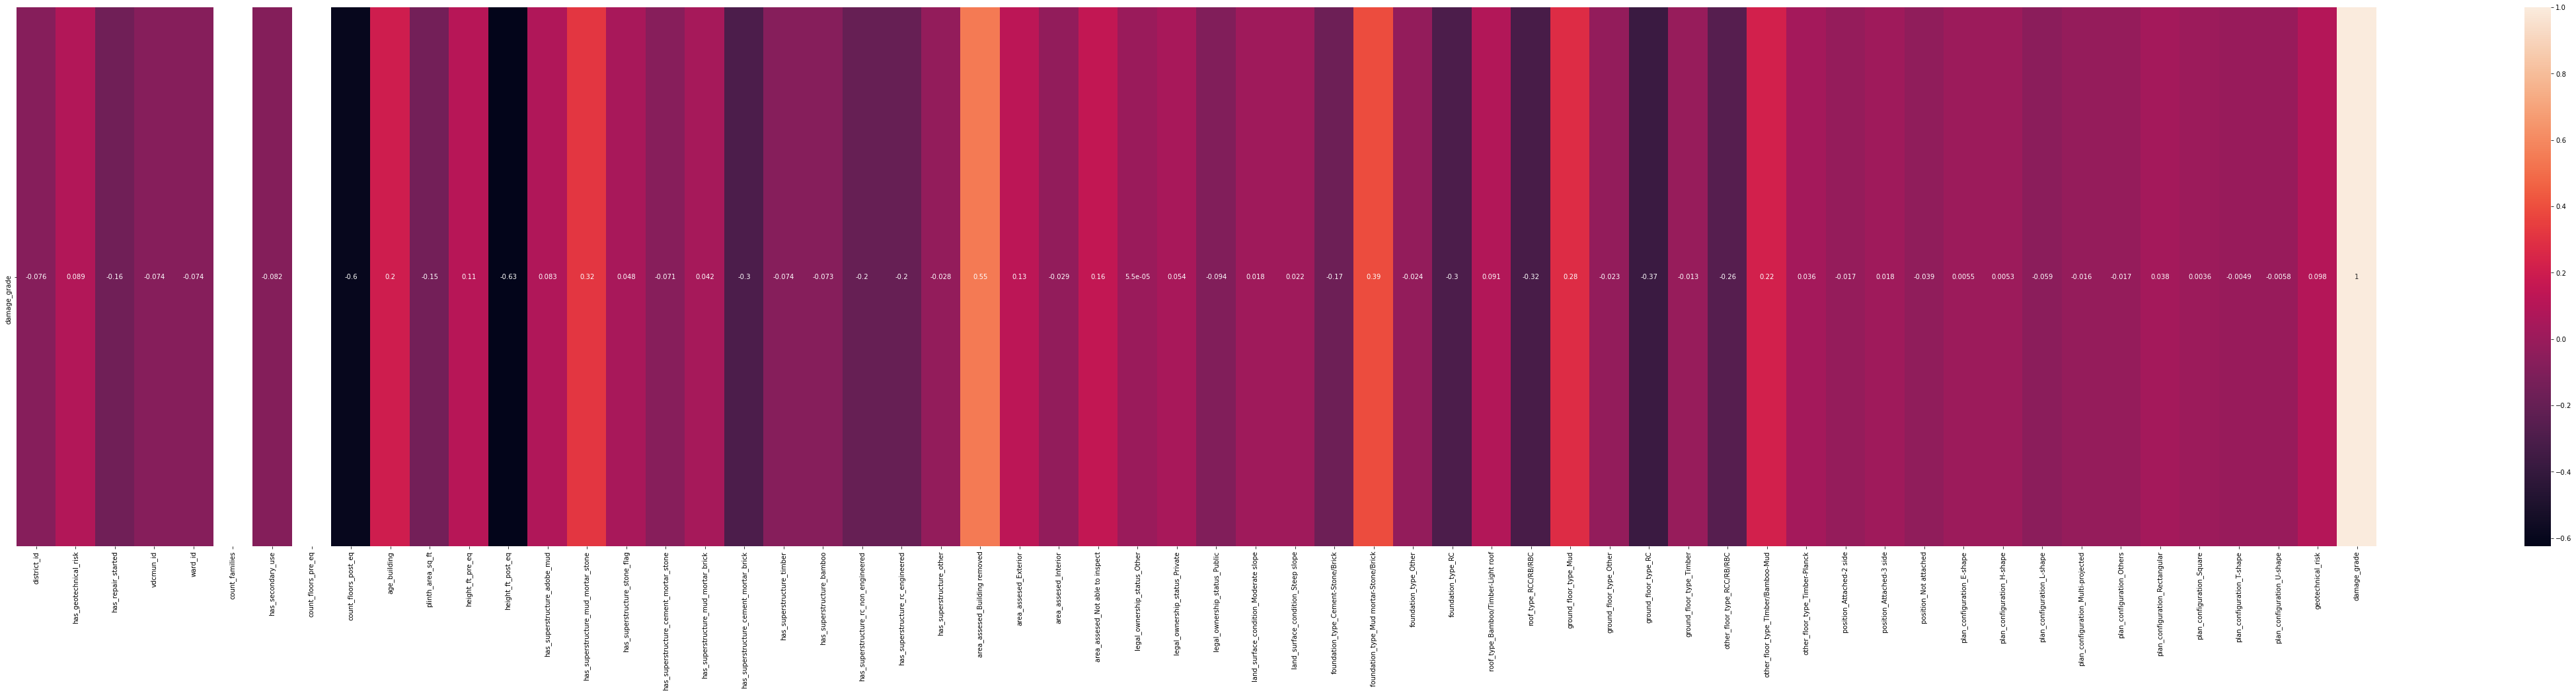

In [391]:
plt.figure(figsize=(80,15))
sns.heatmap(data1.corr().tail(1),annot=True)
plt.savefig('corr_.jpeg')

In [392]:
data1.count_families.unique()

array([1.])

In [393]:
data1.count_floors_pre_eq

4618     2.0
17107    2.0
45433    2.0
3828     2.0
24588    2.0
        ... 
17051    2.0
7352     2.0
8677     2.0
769      2.0
21151    2.0
Name: count_floors_pre_eq, Length: 40000, dtype: float64

In [394]:
x_train.drop(columns=['count_families','count_floors_pre_eq'],inplace=True)

In [395]:
x_test.drop(columns=['count_families','count_floors_pre_eq'],inplace=True)

In [396]:
y_train

4618     4
17107    3
45433    4
3828     2
24588    4
        ..
17051    4
7352     1
8677     4
769      4
21151    2
Name: damage_grade, Length: 40000, dtype: int64

In [397]:
x_train

district_id  has_geotechnical_risk  has_repair_started  vdcmun_id  \
4618          27.0                    0.0                 0.0     2718.0   
17107         40.0                    0.0                 1.0     4022.0   
45433         38.0                    0.0                 1.0     3822.0   
3828          20.0                    0.0                 1.0     2014.0   
24588         37.0                    0.0                 0.0     3703.0   
...            ...                    ...                 ...        ...   
17051         22.0                    1.0                 0.0     2220.0   
7352          27.0                    0.0                 0.0     2704.0   
8677          21.0                    0.0                 0.0     2117.0   
769           28.0                    0.0                 0.0     2838.0   
21151         31.0                    0.0                 0.0     3120.0   

        ward_id  has_secondary_use  count_floors_post_eq  age_building  \
4618   271805.0                0.0                   3.0          20.0   
17107  402211.0                1.0                   2.0          20.0   
45433  382205.0                0.0                   1.0          27.0   
3828   201404.0                0.0                   2.0          10.0   
24588  370307.0                0.0                   2.0          21.0   
...         ...                ...                   ...           ...   
17051  222005.0                0.0                   2.0           7.0   
7352   270417.0                0.0                   3.0          10.0   
8677   211701.0                0.0                   3.0          57.0   
769    283808.0                0.0                   1.0           5.0   
21151  312011.0                0.0                   2.0           7.0   

       plinth_area_sq_ft  height_ft_pre_eq  ...  plan_configuration_E-shape  \
4618               324.0              21.0  ...                           0   
17107              450.0              14.0  ...                           0   
45433              400.0              16.0  ...                           0   
3828               250.0              20.0  ...                           0   
24588              545.0              14.0  ...                           0   
...                  ...               ...  ...                         ...   
17051              324.0              12.0  ...                           0   
7352               450.0              28.0  ...                           0   
8677               365.0              17.0  ...                           0   
769                260.0              14.0  ...                           0   
21151              811.5              16.0  ...                           0   

       plan_configuration_H-shape  plan_configuration_L-shape  \
4618                            0                           0   
17107                           0                           0   
45433                           0                           0   
3828                            0                           0   
24588                           0                           0   
...                           ...                         ...   
17051                           0                           0   
7352                            0                           0   
8677                            0                           0   
769                             0                           0   
21151                           0                           0   

       plan_configuration_Multi-projected  plan_configuration_Others  \
4618                                    0                          0   
17107                                   0                          0   
45433                                   0                          0   
3828                                    0                          0   
24588                                   0                          0   
...                                   ...  

In [398]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 4618 to 21151
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   district_id                             40000 non-null  float64
 1   has_geotechnical_risk                   40000 non-null  float64
 2   has_repair_started                      40000 non-null  float64
 3   vdcmun_id                               40000 non-null  float64
 4   ward_id                                 40000 non-null  float64
 5   has_secondary_use                       40000 non-null  float64
 6   count_floors_post_eq                    40000 non-null  float64
 7   age_building                            40000 non-null  float64
 8   plinth_area_sq_ft                       40000 non-null  float64
 9   height_ft_pre_eq                        40000 non-null  float64
 10  height_ft_post_eq                       40000 non-null 

In [399]:
x_train.district_id.astype(int)

4618     27
17107    40
45433    38
3828     20
24588    37
         ..
17051    22
7352     27
8677     21
769      28
21151    31
Name: district_id, Length: 40000, dtype: int32

In [400]:
conti_list=['age_building','plinth_area_sq_ft','height_ft_pre_eq','height_ft_post_eq']
cat_list=[]
for col in x_train.columns:
    if col not in conti_list:
        cat_list.append(col)

In [401]:
cat_list

['district_id',
 'has_geotechnical_risk',
 'has_repair_started',
 'vdcmun_id',
 'ward_id',
 'has_secondary_use',
 'count_floors_post_eq',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'area_assesed_Building removed',
 'area_assesed_Exterior',
 'area_assesed_Interior',
 'area_assesed_Not able to inspect',
 'legal_ownership_status_Other',
 'legal_ownership_status_Private',
 'legal_ownership_status_Public',
 'land_surface_condition_Moderate slope',
 'land_surface_condition_Steep slope',
 'foundation_type_Cement-Stone/Brick',
 'foundation_type_Mud mortar-Stone/Brick',
 'foundation_type_Other',
 'foundation_type_RC',
 'roof_type_Bamboo/Timber

# conti vs cat

In [402]:
conti_df=x_train[conti_list]
cat_df = x_train[cat_list]

In [403]:
data2=pd.concat([conti_df,y_train],axis=1)

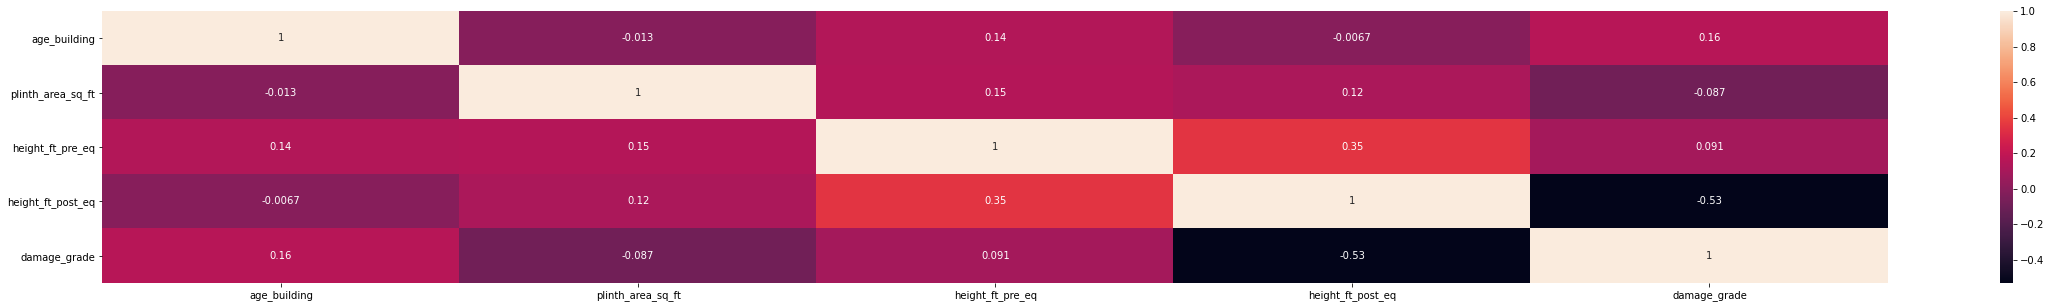

In [404]:
plt.figure(figsize=(40,5))
sns.heatmap(data2.corr(method='kendall'),annot=True)
plt.savefig('kendall.jpeg')

## Anova test

In [405]:
from sklearn.feature_selection import f_classif

In [406]:
f_val,p_val=f_classif(conti_df,y_train)

In [407]:
anova = pd.DataFrame(data=conti_df.columns)
anova['f_val']=f_val
anova['p_val']=p_val

In [408]:
anova

0         f_val          p_val
0       age_building    608.467655   0.000000e+00
1  plinth_area_sq_ft    242.118994  7.577911e-206
2   height_ft_pre_eq    168.023540  6.162611e-143
3  height_ft_post_eq  18477.728245   0.000000e+00

In [409]:
np.around(p_val,6)

array([0., 0., 0., 0.])

# information gain

In [410]:
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression

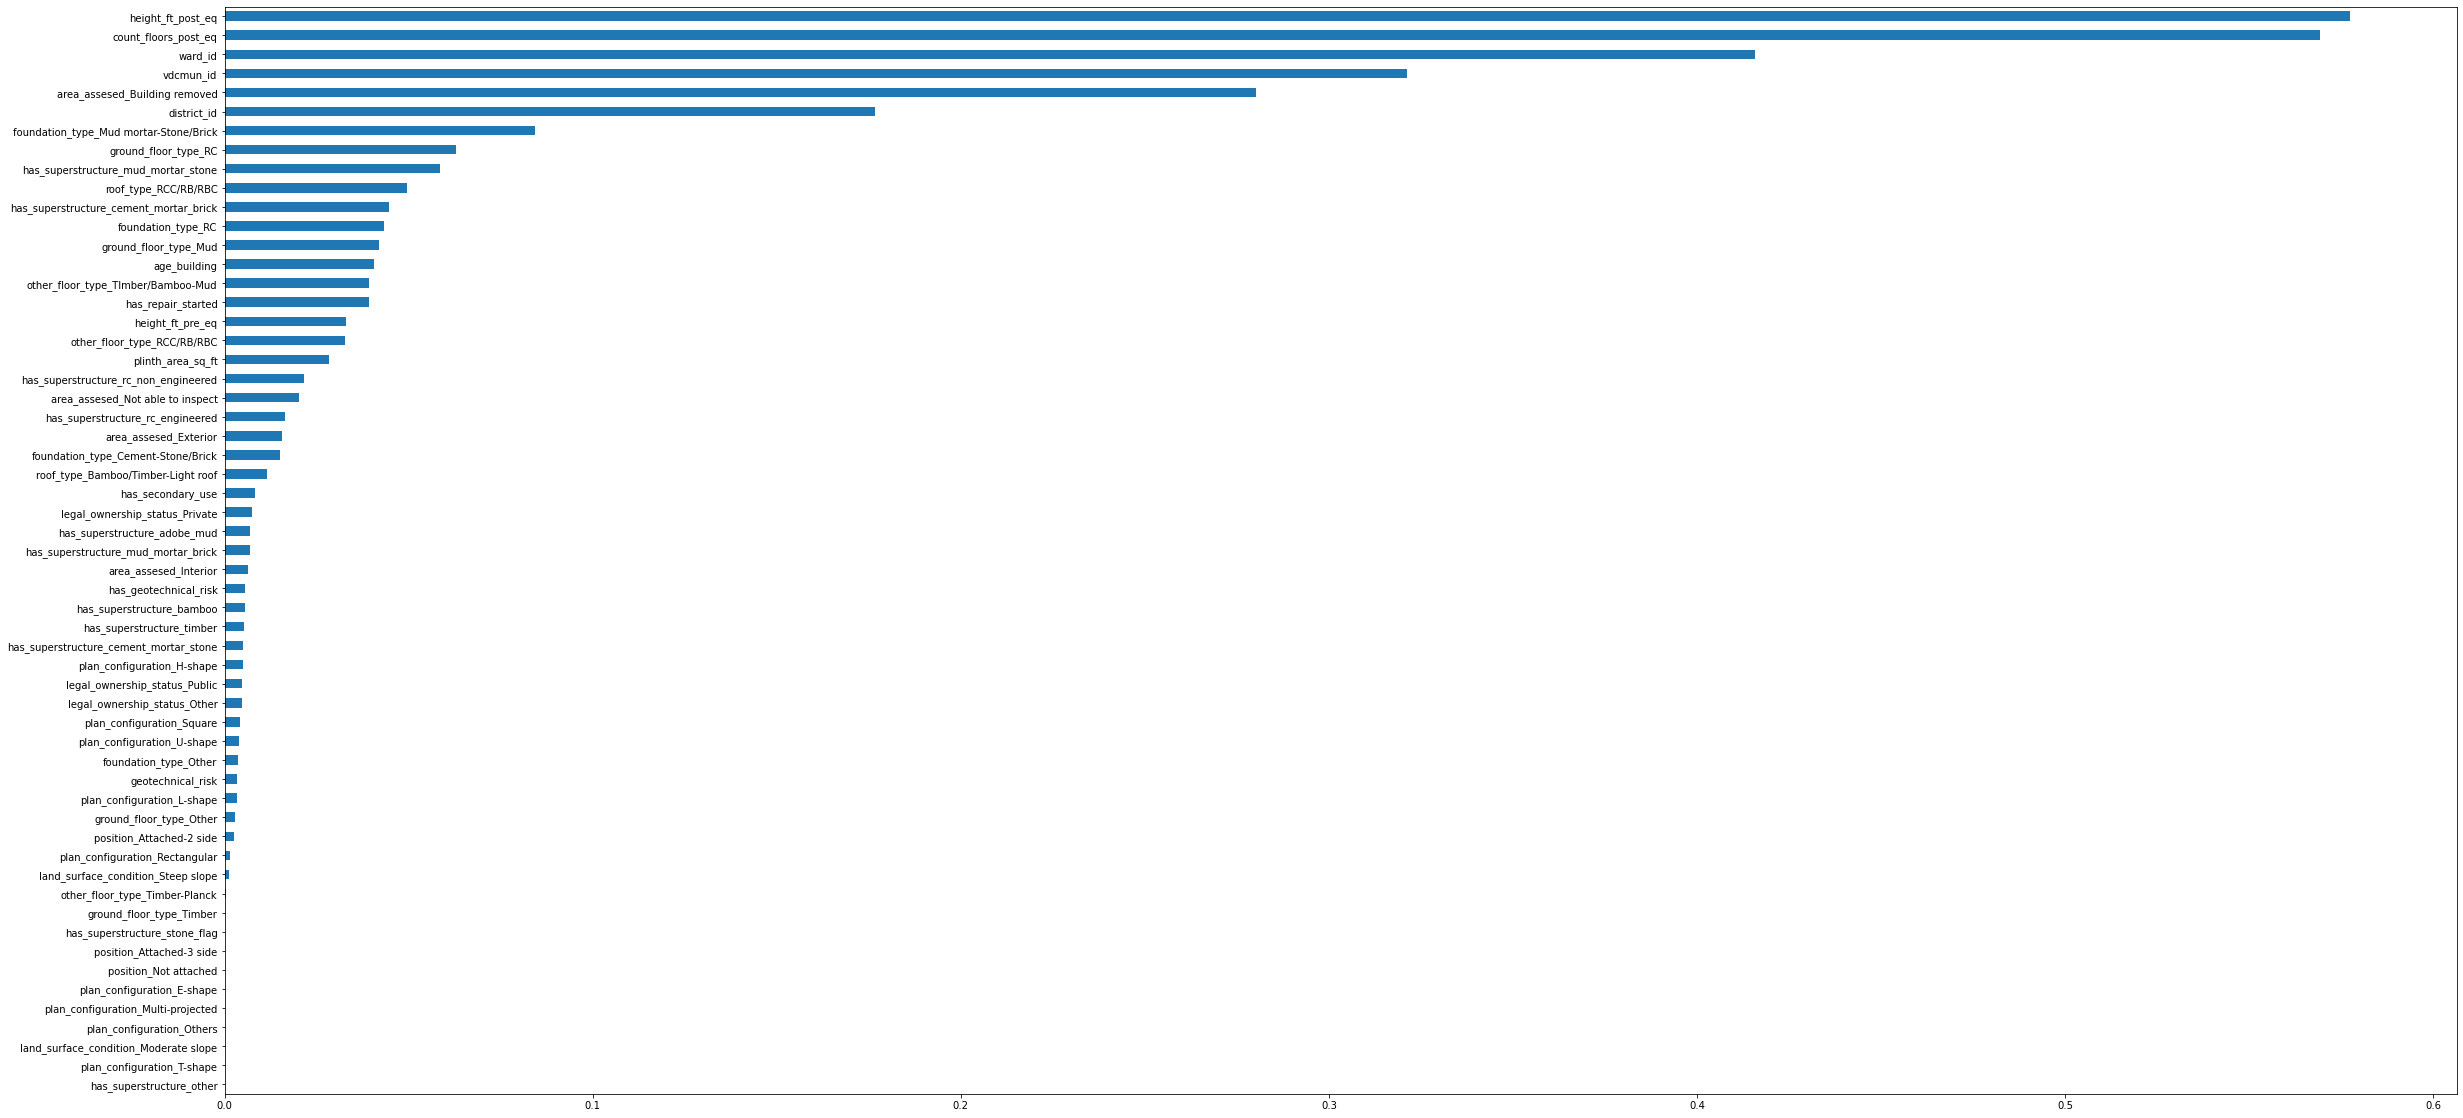

In [411]:
plt.figure(figsize=(40,20))
arr= mutual_info_classif(x_train,y_train)
s12=pd.Series(arr,index=x_train.columns)
s12.sort_values().plot(kind='barh')
plt.savefig('feature_img.jpeg')

# chi2

In [412]:
from sklearn.feature_selection import chi2

In [413]:
chi_val,p_val = chi2(cat_df,y_train)

In [414]:
pd.DataFrame({'chi2_sqr':np.around(chi_val,6),'P_val':np.around(p_val,6)},index = cat_df.columns)

chi2_sqr     P_val
district_id                             5.899077e+02  0.000000
has_geotechnical_risk                   2.970100e+02  0.000000
has_repair_started                      2.064439e+03  0.000000
vdcmun_id                               5.605696e+04  0.000000
ward_id                                 5.605429e+06  0.000000
has_secondary_use                       2.552040e+02  0.000000
count_floors_post_eq                    2.352657e+04  0.000000
has_superstructure_adobe_mud            4.707132e+02  0.000000
has_superstructure_mud_mortar_stone     1.212159e+03  0.000000
has_superstructure_stone_flag           1.188138e+02  0.000000
has_superstructure_cement_mortar_stone  2.125465e+02  0.000000
has_superstructure_mud_mortar_brick     3.091505e+02  0.000000
has_superstructure_cement_mortar_brick  3.726655e+03  0.000000
has_superstructure_timber               1.828216e+02  0.000000
has_superstructure_bamboo               2.171767e+02  0.000000
has_superstructure_rc_non_engineered    1.852196e+03  0.000000
has_superstructure_rc_engineered        2.392044e+03  0.000000
has_superstructure_other                5.613756e+01  0.000000
area_assesed_Building removed           1.627010e+04  0.000000
area_assesed_Exterior                   8.494700e+02  0.000000
area_assesed_Interior                   5.240464e+01  0.000000
area_assesed_Not able to inspect        1.529998e+03  0.000000
legal_ownership_status_Other            1.688639e+01  0.002034
legal_ownership_status_Private          5.767197e+00  0.217222
legal_ownership_status_Public           3.802992e+02  0.000000
land_surface_condition_Moderate slope   7.495539e+01  0.000000
land_surface_condition_Steep slope      2.249029e+01  0.000160
foundation_type_Cement-Stone/Brick      1.170684e+03  0.000000
foundation_type_Mud mortar-Stone/Brick  1.174514e+03  0.000000
foundation_type_Other                   5.461992e+01  0.000000
foundation_type_RC                      4.968281e+03  0.000000
roof_type_Bamboo/Timber-Light roof      1.688482e+02  0.000000
roof_type_RCC/RB/RBC                    4.959627e+03  0.000000
ground_floor_type_Mud                   7.389274e+02  0.000000
ground_floor_type_Other                 2.391263e+01  0.000083
ground_floor_type_RC                    6.091136e+03  0.000000
ground_floor_type_Timber                1.072097e+01  0.029886
other_floor_type_RCC/RB/RBC             3.383683e+03  0.000000
other_floor_type_TImber/Bamboo-Mud      1.061244e+03  0.000000
other_floor_type_Timber-Planck          6.237371e+01  0.000000
position_Attached-2 side                6.156254e+01  0.000000
position_Attached-3 side                9.480115e+01  0.000000
position_Not attached                   2.567469e+01  0.000037
plan_configuration_E-shape              2.644481e+00  0.618964
plan_configuration_H-shape              1.787459e+00  0.774776
plan_configuration_L-shape              1.465167e+02  0.000000
plan_configuration_Multi-projected      2.108175e+01  0.000305
plan_configuration_Others               1.588123e+01  0.003183
plan_configuration_Rectangular          3.464304e+00  0.483327
plan_configuration_Square               5.265636e+01  0.000000
plan_configuration_T-shape              5.367559e+00  0.251619
plan_configuration_U-shape              4.266438e+00  0.371147
geotechnical_risk                       7.441427e+02  0.000000

# Model Training and evaluation

In [415]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((40000, 57), (10000, 57), (40000,), (10000,))

In [416]:
x_train.head()

district_id  has_geotechnical_risk  has_repair_started  vdcmun_id  \
4618          27.0                    0.0                 0.0     2718.0   
17107         40.0                    0.0                 1.0     4022.0   
45433         38.0                    0.0                 1.0     3822.0   
3828          20.0                    0.0                 1.0     2014.0   
24588         37.0                    0.0                 0.0     3703.0   

        ward_id  has_secondary_use  count_floors_post_eq  age_building  \
4618   271805.0                0.0                   3.0          20.0   
17107  402211.0                1.0                   2.0          20.0   
45433  382205.0                0.0                   1.0          27.0   
3828   201404.0                0.0                   2.0          10.0   
24588  370307.0                0.0                   2.0          21.0   

       plinth_area_sq_ft  height_ft_pre_eq  ...  plan_configuration_E-shape  \
4618               324.0              21.0  ...                           0   
17107              450.0              14.0  ...                           0   
45433              400.0              16.0  ...                           0   
3828               250.0              20.0  ...                           0   
24588              545.0              14.0  ...                           0   

       plan_configuration_H-shape  plan_configuration_L-shape  \
4618                            0                           0   
17107                           0                           0   
45433                           0                           0   
3828                            0                           0   
24588                           0                           0   

       plan_configuration_Multi-projected  plan_configuration_Others  \
4618                                    0                          0   
17107                                   0                          0   
45433                                   0                          0   
3828                                    0                          0   
24588                                   0                          0   

       plan_configuration_Rectangular  plan_configuration_Square  \
4618                                1                          0   
17107                               1                          0   
45433                               1                          0   
3828                                1                          0   
24588                               1                          0   

       plan_configuration_T-shape  plan_configuration_U-shape  \
4618                            0                           0   
17107                           0                           0   
45433                           0                           0   
3828                            0                           0   
24588                           0                           0   

       geotechnical_risk  
4618                   0  
17107                  0  
45433                  0  
3828                   0  
24588                  0  

[5 rows x 57 columns]

In [417]:
x_test.head()

district_id  has_geotechnical_risk  has_repair_started  vdcmun_id  \
7151          27.0                    0.0                 0.0     2704.0   
31810         24.0                    0.0                 0.0     2401.0   
14841         31.0                    0.0                 0.0     3122.0   
39617         36.0                    0.0                 0.0     3661.0   
4225          23.0                    0.0                 0.0     2323.0   

        ward_id  has_secondary_use  count_floors_post_eq  age_building  \
7151   270402.0                0.0                   0.0          29.0   
31810  240108.0                0.0                   1.0           5.0   
14841  312203.0                1.0                   1.0          28.0   
39617  366105.0                0.0                   1.0          26.0   
4225   232306.0                0.0                   0.0          58.0   

       plinth_area_sq_ft  height_ft_pre_eq  ...  plan_configuration_E-shape  \
7151               219.0              18.0  ...                           0   
31810              545.0               7.0  ...                           0   
14841              429.0               7.0  ...                           0   
39617              385.0              18.0  ...                           0   
4225               448.0              18.0  ...                           0   

       plan_configuration_H-shape  plan_configuration_L-shape  \
7151                            0                           0   
31810                           0                           0   
14841                           0                           0   
39617                           0                           0   
4225                            0                           0   

       plan_configuration_Multi-projected  plan_configuration_Others  \
7151                                    0                          0   
31810                                   0                          0   
14841                                   0                          0   
39617                                   0                          0   
4225                                    0                          0   

       plan_configuration_Rectangular  plan_configuration_Square  \
7151                                1                          0   
31810                               1                          0   
14841                               1                          0   
39617                               1                          0   
4225                                1                          0   

       plan_configuration_T-shape  plan_configuration_U-shape  \
7151                            0                           0   
31810                           0                           0   
14841                           0                           0   
39617                           0                           0   
4225                            0                           0   

       geotechnical_risk  
7151                   0  
31810                  0  
14841                  0  
39617                  0  
4225                   0  

[5 rows x 57 columns]

In [418]:
y_train

4618     4
17107    3
45433    4
3828     2
24588    4
        ..
17051    4
7352     1
8677     4
769      4
21151    2
Name: damage_grade, Length: 40000, dtype: int64

In [419]:
y_test

7151     5
31810    3
14841    4
39617    3
4225     5
        ..
32085    2
30897    5
19730    2
12837    3
11180    5
Name: damage_grade, Length: 10000, dtype: int64

 # Logistic Regression

In [420]:
from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix

In [421]:
log_model = LogisticRegression(random_state=21)

In [422]:
log_model.fit(x_train, y_train)

LogisticRegression(random_state=21)

In [423]:
y_train_pred_log = log_model.predict(x_train)

In [424]:
print('********************************Training Data**************************************')
y_train_pred_log = log_model.predict(x_train)
print('Accuracy of training data in logistic model :', accuracy_score(y_train,y_train_pred_log)*100)
print('-'*100)
print('confusion matrics : \n', multilabel_confusion_matrix(y_train,y_train_pred_log))
print('-'*100)
print('classification report : \n',classification_report(y_train,y_train_pred_log))

********************************Training Data**************************************
Accuracy of training data in logistic model : 51.11750000000001
----------------------------------------------------------------------------------------------------
confusion matrics : 
 [[[35118  1014]
  [ 3221   647]]

 [[31534  2948]
  [ 4664   854]]

 [[28346  3917]
  [ 6094  1643]]

 [[23379  7080]
  [ 4754  4787]]

 [[22070  4594]
  [  820 12516]]]
----------------------------------------------------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           1       0.39      0.17      0.23      3868
           2       0.22      0.15      0.18      5518
           3       0.30      0.21      0.25      7737
           4       0.40      0.50      0.45      9541
           5       0.73      0.94      0.82     13336

    accuracy                           0.51     40000
   macro avg       0.41      0.39      0.39     4000

In [425]:
log_model.fit(x_test, y_test)

LogisticRegression(random_state=21)

In [426]:
y_test_pred_log = log_model.predict(x_test)

In [427]:
print('********************************Testing Data**************************************')
y_test_pred_log = log_model.predict(x_test)
print('Accuracy of training data in logistic model :', accuracy_score(y_test,y_test_pred_log)*100)
print('-'*100)
print('confusion matrics : \n', multilabel_confusion_matrix(y_test,y_test_pred_log))
print('-'*100)
print('classification report : \n',classification_report(y_test,y_test_pred_log))

********************************Testing Data**************************************
Accuracy of training data in logistic model : 50.849999999999994
----------------------------------------------------------------------------------------------------
confusion matrics : 
 [[[8897  136]
  [ 831  136]]

 [[7702  918]
  [1115  265]]

 [[7338  728]
  [1638  296]]

 [[5598 2017]
  [1189 1196]]

 [[5550 1116]
  [ 142 3192]]]
----------------------------------------------------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           1       0.50      0.14      0.22       967
           2       0.22      0.19      0.21      1380
           3       0.29      0.15      0.20      1934
           4       0.37      0.50      0.43      2385
           5       0.74      0.96      0.84      3334

    accuracy                           0.51     10000
   macro avg       0.43      0.39      0.38     10000
weighted avg      

# Ridge classifier

In [428]:
ridge_model =RidgeClassifier(random_state=21)

In [429]:
ridge_model.fit(x_train,y_train)

RidgeClassifier(random_state=21)

In [430]:
print('********************************Training Data**************************************')
y_train_pred_ridge = ridge_model.predict(x_train)
print('Accuracy of training data in ridge model :', accuracy_score(y_train,y_train_pred_ridge)*100)
print('-'*100)
print('confusion matrics : \n', multilabel_confusion_matrix(y_train,y_train_pred_ridge))
print('-'*100)
print('classification report : \n',classification_report(y_train,y_train_pred_ridge))

********************************Training Data**************************************
Accuracy of training data in ridge model : 61.2825
----------------------------------------------------------------------------------------------------
confusion matrics : 
 [[[34308  1824]
  [ 1651  2217]]

 [[33756   726]
  [ 4931   587]]

 [[28553  3710]
  [ 5427  2310]]

 [[22952  7507]
  [ 3096  6445]]

 [[24944  1720]
  [  382 12954]]]
----------------------------------------------------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           1       0.55      0.57      0.56      3868
           2       0.45      0.11      0.17      5518
           3       0.38      0.30      0.34      7737
           4       0.46      0.68      0.55      9541
           5       0.88      0.97      0.92     13336

    accuracy                           0.61     40000
   macro avg       0.54      0.52      0.51     40000
weighted av

In [431]:
ridge_model.fit(x_test,y_test)

RidgeClassifier(random_state=21)

In [432]:
print('********************************Testing Data**************************************')
y_test_pred_ridge = ridge_model.predict(x_test)
print('Accuracy of training data in Ridge model :', accuracy_score(y_test,y_test_pred_ridge)*100)
print('-'*100)
print('confusion matrics : \n', multilabel_confusion_matrix(y_test,y_test_pred_ridge))
print('-'*100)
print('classification report : \n',classification_report(y_test,y_test_pred_ridge))

********************************Testing Data**************************************
Accuracy of training data in Ridge model : 60.68
----------------------------------------------------------------------------------------------------
confusion matrics : 
 [[[8618  415]
  [ 450  517]]

 [[8379  241]
  [1193  187]]

 [[7242  824]
  [1429  505]]

 [[5595 2020]
  [ 769 1616]]

 [[6234  432]
  [  91 3243]]]
----------------------------------------------------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           1       0.55      0.53      0.54       967
           2       0.44      0.14      0.21      1380
           3       0.38      0.26      0.31      1934
           4       0.44      0.68      0.54      2385
           5       0.88      0.97      0.93      3334

    accuracy                           0.61     10000
   macro avg       0.54      0.52      0.50     10000
weighted avg       0.59      0.61 

# K-Nearest Neighbour

In [433]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### MinMaxScalar

In [434]:
norm_scaler = MinMaxScaler()
norm_scaler.fit(x_train)
norm_array = norm_scaler.transform(x_train)
x_train_scaler_norm = pd.DataFrame(norm_array,columns=x_train.columns)

In [435]:
x_train_scaler_norm

district_id  has_geotechnical_risk  has_repair_started  vdcmun_id  \
0         0.513889                    0.0                 0.0   0.510950   
1         0.875000                    0.0                 1.0   0.881826   
2         0.819444                    0.0                 1.0   0.824943   
3         0.319444                    0.0                 1.0   0.310722   
4         0.791667                    0.0                 0.0   0.791098   
...            ...                    ...                 ...        ...   
39995     0.375000                    1.0                 0.0   0.369312   
39996     0.513889                    0.0                 0.0   0.506968   
39997     0.347222                    0.0                 0.0   0.340017   
39998     0.541667                    0.0                 0.0   0.545080   
39999     0.625000                    0.0                 0.0   0.625284   

        ward_id  has_secondary_use  count_floors_post_eq  age_building  \
0      0.510952                0.0                   0.6      0.333333   
1      0.881848                1.0                   0.4      0.333333   
2      0.824948                0.0                   0.2      0.450000   
3      0.310720                0.0                   0.4      0.166667   
4      0.791108                0.0                   0.4      0.350000   
...         ...                ...                   ...           ...   
39995  0.369312                0.0                   0.4      0.116667   
39996  0.507004                0.0                   0.6      0.166667   
39997  0.340006                0.0                   0.6      0.950000   
39998  0.545090                0.0                   0.2      0.083333   
39999  0.625304                0.0                   0.4      0.116667   

       plinth_area_sq_ft  height_ft_pre_eq  ...  plan_configuration_E-shape  \
0               0.342549          0.681818  ...                         0.0   
1               0.512475          0.363636  ...                         0.0   
2               0.445044          0.454545  ...                         0.0   
3               0.242751          0.636364  ...                         0.0   
4               0.640593          0.363636  ...                         0.0   
...                  ...               ...  ...                         ...   
39995           0.342549          0.272727  ...                         0.0   
39996           0.512475          1.000000  ...                         0.0   
39997           0.397842          0.500000  ...                         0.0   
39998           0.256237          0.363636  ...                         0.0   
39999           1.000000          0.454545  ...                         0.0   

       plan_configuration_H-shape  plan_configuration_L-shape  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
39995                         0.0                         0.0   
39996                         0.0                         0.0   
39997                         0.0                         0.0   
39998                         0.0                         0.0   
39999                         0.0                         0.0   

       plan_configuration_Multi-projected  plan_configuration_Others  \
0                                     0.0                        0.0   
1                                     0.0                        0.0   
2                                     0.0                        0.0   
3                                     0.0                        0.0   
4                                     0.0                        0.0   
...                                   ...  

In [436]:
from sklearn.neighbors import KNeighborsClassifier

In [437]:
knn_model_norm = KNeighborsClassifier()
knn_model_norm.fit(x_train_scaler_norm, y_train)

KNeighborsClassifier()

In [438]:
print('********************************Training Data**************************************')
y_train_pred_knn = knn_model_norm.predict(x_train_scaler_norm)
print('Accuracy of training data in knn model :', accuracy_score(y_train,y_train_pred_knn)*100)
print('-'*100)
print('confusion matrics : \n', multilabel_confusion_matrix(y_train,y_train_pred_knn))
print('-'*100)
print('classification report : \n',classification_report(y_train,y_train_pred_knn))

********************************Training Data**************************************
Accuracy of training data in knn model : 72.435
----------------------------------------------------------------------------------------------------
confusion matrics : 
 [[[34218  1914]
  [ 1025  2843]]

 [[31906  2576]
  [ 2414  3104]]

 [[28907  3356]
  [ 3404  4333]]

 [[27656  2803]
  [ 3197  6344]]

 [[26287   377]
  [  986 12350]]]
----------------------------------------------------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           1       0.60      0.74      0.66      3868
           2       0.55      0.56      0.55      5518
           3       0.56      0.56      0.56      7737
           4       0.69      0.66      0.68      9541
           5       0.97      0.93      0.95     13336

    accuracy                           0.72     40000
   macro avg       0.67      0.69      0.68     40000
weighted avg  

In [439]:
norm_scaler = MinMaxScaler()
norm_scaler.fit(x_test)
norm_array = norm_scaler.transform(x_test)
x_test_scaler_norm = pd.DataFrame(norm_array,columns=x_test.columns)

In [440]:
x_test_scale_norm =norm_scaler.transform(x_test)

In [441]:
knn_model_norm = KNeighborsClassifier

In [442]:
knn_model_norm = KNeighborsClassifier()
knn_model_norm.fit(x_test_scaler_norm, y_test)

KNeighborsClassifier()

In [443]:
print('********************************Testing Data**************************************')
y_test_pred_knn = knn_model_norm.predict(x_test_scaler_norm)
print('Accuracy of training data in knn model :', accuracy_score(y_test,y_test_pred_knn)*100)
print('-'*100)
print('confusion matrics : \n', multilabel_confusion_matrix(y_test,y_test_pred_knn))
print('-'*100)
print('classification report : \n',classification_report(y_test,y_test_pred_knn))

********************************Testing Data**************************************
Accuracy of training data in knn model : 71.36
----------------------------------------------------------------------------------------------------
confusion matrics : 
 [[[8555  478]
  [ 294  673]]

 [[7972  648]
  [ 623  757]]

 [[7224  842]
  [ 845 1089]]

 [[6837  778]
  [ 810 1575]]

 [[6548  118]
  [ 292 3042]]]
----------------------------------------------------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           1       0.58      0.70      0.64       967
           2       0.54      0.55      0.54      1380
           3       0.56      0.56      0.56      1934
           4       0.67      0.66      0.66      2385
           5       0.96      0.91      0.94      3334

    accuracy                           0.71     10000
   macro avg       0.66      0.68      0.67     10000
weighted avg       0.72      0.71   

#### Hyperparameter tunning

In [444]:
knn_model_norm_hyp = KNeighborsClassifier()

In [445]:
hyperparameter = {'n_neighbors':np.arange(3,10),
                 'weights':['uniform','distance'],
                 'algorithm':['auto','ball_tree','kd_tree','brute'],
                 'p':[1,2],
                 'metric':['minkowski']}

In [446]:
rscv_knn = RandomizedSearchCV(knn_model_norm_hyp, hyperparameter,cv=5)

In [447]:
rscv_knn.fit(x_train_scaler_norm,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'metric': ['minkowski'],
                                        'n_neighbors': array([3, 4, 5, 6, 7, 8, 9]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [448]:
rscv_knn.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8, p=1,
                     weights='distance')

In [449]:
rscv_knn.best_score_

0.6319

In [450]:
knn_model_norm_hyp_1 = KNeighborsClassifier(leaf_size=43, n_neighbors=9,p=1,weights='distance')
knn_model_norm_hyp_1.fit(x_train_scaler_norm, y_train)

KNeighborsClassifier(leaf_size=43, n_neighbors=9, p=1, weights='distance')

In [451]:
print('********************************Training Data**************************************')
y_train_pred_knn = knn_model_norm_hyp_1.predict(x_train_scaler_norm)
print('Accuracy of training data in knn model :', accuracy_score(y_train,y_train_pred_knn)*100)
print('-'*100)
print('confusion matrics : \n', multilabel_confusion_matrix(y_train,y_train_pred_knn))
print('-'*100)
print('classification report : \n',classification_report(y_train,y_train_pred_knn))

********************************Training Data**************************************
Accuracy of training data in knn model : 99.965
----------------------------------------------------------------------------------------------------
confusion matrics : 
 [[[36126     6]
  [    0  3868]]

 [[34478     4]
  [    4  5514]]

 [[32260     3]
  [    5  7732]]

 [[30458     1]
  [    3  9538]]

 [[26664     0]
  [    2 13334]]]
----------------------------------------------------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3868
           2       1.00      1.00      1.00      5518
           3       1.00      1.00      1.00      7737
           4       1.00      1.00      1.00      9541
           5       1.00      1.00      1.00     13336

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg  

In [452]:
x_test_scale_arr = norm_scaler.transform(x_test)
x_train_scaler_norm = pd.DataFrame(x_test_scale_arr,columns=x_test.columns)

In [453]:
knn_model_norm_hyp_1 = KNeighborsClassifier(leaf_size=43, n_neighbors=9,p=1,weights='distance')
knn_model_norm_hyp_1.fit(x_test_scaler_norm, y_test)

KNeighborsClassifier(leaf_size=43, n_neighbors=9, p=1, weights='distance')

In [454]:
print('********************************Testing Data**************************************')
y_test_pred_knn = knn_model_norm_hyp_1.predict(x_test_scaler_norm)
print('Accuracy of testing data in knn model :', accuracy_score(y_test,y_test_pred_knn)*100)
print('-'*100)
print('confusion matrics : \n', multilabel_confusion_matrix(y_test,y_test_pred_knn))
print('-'*100)
print('classification report : \n',classification_report(y_test,y_test_pred_knn))

********************************Testing Data**************************************
Accuracy of testing data in knn model : 100.0
----------------------------------------------------------------------------------------------------
confusion matrics : 
 [[[9033    0]
  [   0  967]]

 [[8620    0]
  [   0 1380]]

 [[8066    0]
  [   0 1934]]

 [[7615    0]
  [   0 2385]]

 [[6666    0]
  [   0 3334]]]
----------------------------------------------------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       967
           2       1.00      1.00      1.00      1380
           3       1.00      1.00      1.00      1934
           4       1.00      1.00      1.00      2385
           5       1.00      1.00      1.00      3334

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00    

In [455]:
x_train_scaler_norm

district_id  has_geotechnical_risk  has_repair_started  vdcmun_id  \
0        0.513889                    0.0                 0.0   0.507636   
1        0.430556                    0.0                 0.0   0.421946   
2        0.625000                    0.0                 0.0   0.625848   
3        0.763889                    0.0                 0.0   0.778281   
4        0.402778                    0.0                 0.0   0.399887   
...           ...                    ...                 ...        ...   
9995     1.000000                    0.0                 1.0   1.000000   
9996     0.402778                    0.0                 0.0   0.408654   
9997     0.736111                    0.0                 0.0   0.737839   
9998     0.763889                    0.0                 0.0   0.767534   
9999     0.319444                    0.0                 1.0   0.318156   

       ward_id  has_secondary_use  count_floors_post_eq  age_building  \
0     0.507617                0.0                   0.0      0.483333   
1     0.421944                0.0                   0.2      0.083333   
2     0.625831                1.0                   0.2      0.466667   
3     0.778268                0.0                   0.2      0.433333   
4     0.399880                0.0                   0.0      0.966667   
...        ...                ...                   ...           ...   
9995  1.000000                0.0                   0.4      0.666667   
9996  0.408644                0.0                   0.0      0.416667   
9997  0.737825                0.0                   0.6      0.150000   
9998  0.767533                0.0                   0.4      0.033333   
9999  0.318147                0.0                   0.0      0.166667   

      plinth_area_sq_ft  height_ft_pre_eq  ...  plan_configuration_E-shape  \
0              0.200000          0.510638  ...                         0.0   
1              0.637584          0.042553  ...                         0.0   
2              0.481879          0.042553  ...                         0.0   
3              0.422819          0.510638  ...                         0.0   
4              0.507383          0.510638  ...                         0.0   
...                 ...               ...  ...                         ...   
9995           0.357047          0.510638  ...                         0.0   
9996           0.314094          0.510638  ...                         0.0   
9997           0.442953          0.978723  ...                         0.0   
9998           0.322148          0.382979  ...                         0.0   
9999           0.510067          0.680851  ...                         0.0   

      plan_configuration_H-shape  plan_configuration_L-shape  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         0.0   
...                          ...                         ...   
9995                         0.0                         0.0   
9996                         0.0                         0.0   
9997                         0.0                         0.0   
9998                         0.0                         0.0   
9999                         0.0                         0.0   

      plan_configuration_Multi-projected  plan_configuration_Others  \
0                                    0.0                        0.0   
1                                    0.0                        0.0   
2                                    0.0                        0.0   
3                                    0.0                        0.0   
4                                    0.0                        0.0   
...                                  ...                        ...   
9995                     

In [456]:
x_test_scale_norm

array([[0.51388889, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.43055556, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.625     , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.73611111, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.76388889, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31944444, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

### StyandardScaler

In [457]:
std_scaler = StandardScaler()
std_scale_arr = std_scaler.fit_transform(x_train)
x_train_std_scale_df = pd.DataFrame(std_scale_arr,columns=x_train.columns)

In [458]:
knn_model_std = KNeighborsClassifier()
knn_model_std.fit(x_train_std_scale_df,y_train)

KNeighborsClassifier()

In [459]:
print('********************************Training Data**************************************')
y_train_pred_knn = knn_model_std.predict(x_train_std_scale_df)
print('Accuracy of training data in knn model :', accuracy_score(y_train,y_train_pred_knn)*100)
print('-'*100)
print('confusion matrics : \n', multilabel_confusion_matrix(y_train,y_train_pred_knn))
print('-'*100)
print('classification report : \n',classification_report(y_train,y_train_pred_knn))

********************************Training Data**************************************
Accuracy of training data in knn model : 72.855
----------------------------------------------------------------------------------------------------
confusion matrics : 
 [[[34167  1965]
  [ 1063  2805]]

 [[31900  2582]
  [ 2435  3083]]

 [[28991  3272]
  [ 3358  4379]]

 [[27722  2737]
  [ 3109  6432]]

 [[26362   302]
  [  893 12443]]]
----------------------------------------------------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           1       0.59      0.73      0.65      3868
           2       0.54      0.56      0.55      5518
           3       0.57      0.57      0.57      7737
           4       0.70      0.67      0.69      9541
           5       0.98      0.93      0.95     13336

    accuracy                           0.73     40000
   macro avg       0.68      0.69      0.68     40000
weighted avg  

In [460]:
knn_model_std_hyp = KNeighborsClassifier()

In [461]:
hyperparameter

{'n_neighbors': array([3, 4, 5, 6, 7, 8, 9]),
 'weights': ['uniform', 'distance'],
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'p': [1, 2],
 'metric': ['minkowski']}

# Decision Tree

In [462]:
from sklearn.tree import DecisionTreeClassifier , plot_tree

In [463]:
dt_model = DecisionTreeClassifier(random_state=21)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [466]:
dt_model = DecisionTreeClassifier(random_state=21)
dt_model.fit(x_test,y_test)

DecisionTreeClassifier(random_state=21)

In [468]:
dt_model_hyp = DecisionTreeClassifier(random_state=21)
hyperparameter_dt = {'criterion':['gini','entropy'],"max_depth" : np.arange(3,8),
                    "min_samples_split" : np.arange(2,20),"min_samples_leaf" : np.arange(2,10),'random_state' : [21]}

In [469]:
rscv_dt=RandomizedSearchCV(dt_model_hyp,hyperparameter_dt,cv=5)

In [470]:
rscv_dt.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=21),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'random_state': [21]})

In [471]:
rscv_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=5, random_state=21)

In [472]:
rscv_dt.best_score_

0.642875

In [473]:
dt_model_hyp_1 = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=5, min_samples_split=8, random_state=21)

In [474]:
dt_model_hyp_1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       min_samples_split=8, random_state=21)

In [475]:
print('******************************** Training data **************************************')
y_train_pred_dt = dt_model_hyp_1.predict(x_train)
print('Accuracy of training data in DT model :' , accuracy_score(y_train,y_train_pred_dt)*100)
print('-'*100)
print('Confusion matrics : \n',multilabel_confusion_matrix(y_train,y_train_pred_dt))
print('-'*100)
print('classication report : \n',classification_report(y_train,y_train_pred_dt))

******************************** Training data **************************************
Accuracy of training data in DT model : 65.0825
----------------------------------------------------------------------------------------------------
Confusion matrics : 
 [[[34548  1584]
  [ 1659  2209]]

 [[31639  2843]
  [ 3502  2016]]

 [[30194  2069]
  [ 6508  1229]]

 [[22988  7471]
  [ 1613  7928]]

 [[26664     0]
  [  685 12651]]]
----------------------------------------------------------------------------------------------------
classication report : 
               precision    recall  f1-score   support

           1       0.58      0.57      0.58      3868
           2       0.41      0.37      0.39      5518
           3       0.37      0.16      0.22      7737
           4       0.51      0.83      0.64      9541
           5       1.00      0.95      0.97     13336

    accuracy                           0.65     40000
   macro avg       0.58      0.57      0.56     40000
weighted avg  

In [476]:
dt_model_hyp_1.fit(x_test,y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       min_samples_split=8, random_state=21)

In [477]:
print('******************************** Testing data **************************************')
y_test_pred_dt = dt_model_hyp_1.predict(x_test)
print('Accuracy of training data in DT model :' , accuracy_score(y_test,y_test_pred_dt)*100)
print('-'*100)
print('Confusion matrics : \n',multilabel_confusion_matrix(y_test,y_test_pred_dt))
print('-'*100)
print('classication report : \n',classification_report(y_test,y_test_pred_dt))

******************************** Testing data **************************************
Accuracy of training data in DT model : 65.51
----------------------------------------------------------------------------------------------------
Confusion matrics : 
 [[[8563  470]
  [ 405  562]]

 [[8069  551]
  [ 912  468]]

 [[7374  692]
  [1450  484]]

 [[5879 1736]
  [ 504 1881]]

 [[6666    0]
  [ 178 3156]]]
----------------------------------------------------------------------------------------------------
classication report : 
               precision    recall  f1-score   support

           1       0.54      0.58      0.56       967
           2       0.46      0.34      0.39      1380
           3       0.41      0.25      0.31      1934
           4       0.52      0.79      0.63      2385
           5       1.00      0.95      0.97      3334

    accuracy                           0.66     10000
   macro avg       0.59      0.58      0.57     10000
weighted avg       0.65      0.66    

After Hyperparameter tunning accuracy descreases

In [482]:
result = dt_model_hyp_1.cost_complexity_pruning_path(x_train,y_train)
result

{'ccp_alphas': array([0.00000000e+00, 2.24150724e-04, 2.57855990e-04, 2.73426580e-04,
        2.78778270e-04, 2.88447389e-04, 2.91875882e-04, 2.92878528e-04,
        2.95600961e-04, 3.77751568e-04, 3.80705916e-04, 3.98838200e-04,
        3.99513379e-04, 4.02994830e-04, 4.24017791e-04, 4.76085306e-04,
        5.00326613e-04, 5.19401058e-04, 5.59071621e-04, 5.90043976e-04,
        6.10157222e-04, 6.57147811e-04, 6.58205369e-04, 7.13941307e-04,
        7.22218171e-04, 7.80931330e-04, 8.06966455e-04, 8.22240812e-04,
        8.34961662e-04, 8.37955282e-04, 8.64989226e-04, 8.67438624e-04,
        8.95174297e-04, 9.89376226e-04, 9.95616653e-04, 1.04443639e-03,
        1.15876974e-03, 1.21074866e-03, 1.29075883e-03, 1.30188335e-03,
        1.33959228e-03, 1.36703068e-03, 1.55397016e-03, 1.61615465e-03,
        1.71559118e-03, 2.10709476e-03, 3.17820404e-03, 3.22003862e-03,
        3.27678875e-03, 3.59481394e-03, 3.81669354e-03, 4.32244449e-03,
        5.70724485e-03, 6.19778542e-03, 7.70036601

In [483]:
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list

array([0.00000000e+00, 2.24150724e-04, 2.57855990e-04, 2.73426580e-04,
       2.78778270e-04, 2.88447389e-04, 2.91875882e-04, 2.92878528e-04,
       2.95600961e-04, 3.77751568e-04, 3.80705916e-04, 3.98838200e-04,
       3.99513379e-04, 4.02994830e-04, 4.24017791e-04, 4.76085306e-04,
       5.00326613e-04, 5.19401058e-04, 5.59071621e-04, 5.90043976e-04,
       6.10157222e-04, 6.57147811e-04, 6.58205369e-04, 7.13941307e-04,
       7.22218171e-04, 7.80931330e-04, 8.06966455e-04, 8.22240812e-04,
       8.34961662e-04, 8.37955282e-04, 8.64989226e-04, 8.67438624e-04,
       8.95174297e-04, 9.89376226e-04, 9.95616653e-04, 1.04443639e-03,
       1.15876974e-03, 1.21074866e-03, 1.29075883e-03, 1.30188335e-03,
       1.33959228e-03, 1.36703068e-03, 1.55397016e-03, 1.61615465e-03,
       1.71559118e-03, 2.10709476e-03, 3.17820404e-03, 3.22003862e-03,
       3.27678875e-03, 3.59481394e-03, 3.81669354e-03, 4.32244449e-03,
       5.70724485e-03, 6.19778542e-03, 7.70036601e-03, 8.43737525e-03,
      

# Hyperparameter tuning with pruning

In [484]:
dt_model_hyp_prun = DecisionTreeClassifier(criterion='entropy', max_depth = 7, min_samples_leaf=5,
                                           min_samples_split=8, random_state=21,ccp_alpha= 0.0002578559898768658)
dt_model_hyp_prun.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0002578559898768658, criterion='entropy',
                       max_depth=7, min_samples_leaf=5, min_samples_split=8,
                       random_state=21)

In [485]:
print('****************************************Training data***************************************')
y_train_pred_dt = dt_model_hyp_prun.predict(x_train)
print('Accuracy of training data in DT model :' , accuracy_score(y_train,y_train_pred_dt)*100)
print('-'*100)
print('confusion matrics : \n', multilabel_confusion_matrix(y_train,y_train_pred_dt))
print('-'*100)
print('Classification report: \n',classification_report(y_train,y_train_pred_dt))

****************************************Training data***************************************
Accuracy of training data in DT model : 65.0825
----------------------------------------------------------------------------------------------------
confusion matrics : 
 [[[34548  1584]
  [ 1659  2209]]

 [[31639  2843]
  [ 3502  2016]]

 [[30194  2069]
  [ 6508  1229]]

 [[22988  7471]
  [ 1613  7928]]

 [[26664     0]
  [  685 12651]]]
----------------------------------------------------------------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           1       0.58      0.57      0.58      3868
           2       0.41      0.37      0.39      5518
           3       0.37      0.16      0.22      7737
           4       0.51      0.83      0.64      9541
           5       1.00      0.95      0.97     13336

    accuracy                           0.65     40000
   macro avg       0.58      0.57      0.56     40000
weight

In [486]:
dt_model_hyp_prun = DecisionTreeClassifier(criterion='entropy', max_depth = 7, min_samples_leaf=5,
                                           min_samples_split=8, random_state=21,ccp_alpha= 0.0002578559898768658)
dt_model_hyp_prun.fit(x_test,y_test)

DecisionTreeClassifier(ccp_alpha=0.0002578559898768658, criterion='entropy',
                       max_depth=7, min_samples_leaf=5, min_samples_split=8,
                       random_state=21)

In [487]:
print('****************************************Testing data***************************************')
y_test_pred_dt = dt_model_hyp_prun.predict(x_test)
print('Accuracy of training data in DT model :' , accuracy_score(y_test,y_test_pred_dt)*100)
print('-'*100)
print('confusion matrics : \n', multilabel_confusion_matrix(y_test,y_test_pred_dt))
print('-'*100)
print('Classification report: \n',classification_report(y_test,y_test_pred_dt))

****************************************Testing data***************************************
Accuracy of training data in DT model : 65.51
----------------------------------------------------------------------------------------------------
confusion matrics : 
 [[[8563  470]
  [ 405  562]]

 [[8069  551]
  [ 912  468]]

 [[7374  692]
  [1450  484]]

 [[5879 1736]
  [ 504 1881]]

 [[6666    0]
  [ 178 3156]]]
----------------------------------------------------------------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           1       0.54      0.58      0.56       967
           2       0.46      0.34      0.39      1380
           3       0.41      0.25      0.31      1934
           4       0.52      0.79      0.63      2385
           5       1.00      0.95      0.97      3334

    accuracy                           0.66     10000
   macro avg       0.59      0.58      0.57     10000
weighted avg       0.65      

# Random Forest

In [488]:
from sklearn.ensemble import RandomForestClassifier

In [489]:
rf_model = RandomForestClassifier(random_state = 21)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=21)

In [490]:
print('**************************** Training data***********************************')
y_train_pred_rf = rf_model.predict(x_train)
print('accuracy of training dayta in RF model : ',accuracy_score(y_train,y_train_pred_rf)*100)
print('-'*100)
print('confusion matrics : \n',multilabel_confusion_matrix(y_train,y_train_pred_rf))
print('-'*100)
print('classiffication report : \n', classification_report(y_train,y_train_pred_rf))

**************************** Training data***********************************
accuracy of training dayta in RF model :  99.965
----------------------------------------------------------------------------------------------------
confusion matrics : 
 [[[36129     3]
  [    3  3865]]

 [[34478     4]
  [    4  5514]]

 [[32261     2]
  [    6  7731]]

 [[30455     4]
  [    0  9541]]

 [[26663     1]
  [    1 13335]]]
----------------------------------------------------------------------------------------------------
classiffication report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3868
           2       1.00      1.00      1.00      5518
           3       1.00      1.00      1.00      7737
           4       1.00      1.00      1.00      9541
           5       1.00      1.00      1.00     13336

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg      

In [491]:
rf_model = RandomForestClassifier(random_state = 21)
rf_model.fit(x_test, y_test)

RandomForestClassifier(random_state=21)

In [492]:
print('**************************** Testing data***********************************')
y_test_pred_rf = rf_model.predict(x_test)
print('accuracy of testing dayta in RF model : ',accuracy_score(y_test,y_test_pred_rf)*100)
print('-'*100)
print('confusion matrics : \n',multilabel_confusion_matrix(y_test,y_test_pred_rf))
print('-'*100)
print('classiffication report : \n', classification_report(y_test,y_test_pred_rf))

**************************** Testing data***********************************
accuracy of testing dayta in RF model :  100.0
----------------------------------------------------------------------------------------------------
confusion matrics : 
 [[[9033    0]
  [   0  967]]

 [[8620    0]
  [   0 1380]]

 [[8066    0]
  [   0 1934]]

 [[7615    0]
  [   0 2385]]

 [[6666    0]
  [   0 3334]]]
----------------------------------------------------------------------------------------------------
classiffication report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       967
           2       1.00      1.00      1.00      1380
           3       1.00      1.00      1.00      1934
           4       1.00      1.00      1.00      2385
           5       1.00      1.00      1.00      3334

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.

In [493]:
rf_model.feature_importances_

array([3.62949654e-02, 6.54063094e-03, 1.83896105e-02, 7.28496506e-02,
       8.22449159e-02, 9.53089290e-03, 1.36156640e-01, 6.78316374e-02,
       6.89640599e-02, 4.64119212e-02, 1.95179880e-01, 5.19849963e-03,
       1.20560763e-02, 3.12604621e-03, 2.32221499e-03, 4.59419070e-03,
       6.88896244e-03, 1.13872092e-02, 6.13497594e-03, 3.85048739e-03,
       2.06576253e-03, 1.94232163e-03, 5.19987644e-02, 1.19891354e-02,
       6.49267176e-04, 3.51915244e-03, 8.34536910e-04, 3.47692907e-03,
       2.56108135e-03, 1.01445278e-02, 3.64992967e-03, 3.19580799e-03,
       1.15116074e-02, 5.68849543e-04, 4.70044640e-03, 1.20834744e-02,
       5.92327464e-03, 8.99845535e-03, 3.76598764e-04, 9.74176009e-03,
       7.45402513e-04, 2.21142444e-03, 1.09028788e-02, 7.64294606e-03,
       3.75974715e-03, 8.75395118e-04, 1.09456463e-02, 2.36133720e-05,
       2.34722665e-05, 2.06504766e-03, 1.53200802e-04, 2.64441935e-04,
       3.62251772e-03, 1.77524299e-03, 3.77720587e-04, 5.27804956e-06,
      

# Adaboost

In [494]:
from sklearn.ensemble import AdaBoostClassifier

In [495]:
ada_model = AdaBoostClassifier(random_state=21)
ada_model.fit(x_train,y_train)

AdaBoostClassifier(random_state=21)

In [496]:
print('*****************************************Training data ************************************')
y_train_pred_adaboost = ada_model.predict(x_train)
print('accuracy of training data in adaboost model : ',accuracy_score(y_train,y_train_pred_adaboost)*100)
print('-'*100)
print("confusion matrics : \n",multilabel_confusion_matrix(y_train, y_train_pred_adaboost))
print('_'*100)
print('classification report : \n',classification_report(y_train, y_train_pred_adaboost))

*****************************************Training data ************************************
accuracy of training data in adaboost model :  64.785
----------------------------------------------------------------------------------------------------
confusion matrics : 
 [[[34032  2100]
  [ 1582  2286]]

 [[33012  1470]
  [ 4452  1066]]

 [[27617  4646]
  [ 4997  2740]]

 [[24659  5800]
  [ 2407  7134]]

 [[26594    70]
  [  648 12688]]]
____________________________________________________________________________________________________
classification report : 
               precision    recall  f1-score   support

           1       0.52      0.59      0.55      3868
           2       0.42      0.19      0.26      5518
           3       0.37      0.35      0.36      7737
           4       0.55      0.75      0.63      9541
           5       0.99      0.95      0.97     13336

    accuracy                           0.65     40000
   macro avg       0.57      0.57      0.56     40000


In [497]:
ada_model = AdaBoostClassifier(random_state=21)
ada_model.fit(x_test,y_test)

AdaBoostClassifier(random_state=21)

In [498]:
print('*****************************************Testing data ************************************')
y_test_pred_adaboost = ada_model.predict(x_test)
print('accuracy of training data in adaboost model : ',accuracy_score(y_test,y_test_pred_adaboost)*100)
print('-'*100)
print("confusion matrics : \n",multilabel_confusion_matrix(y_test, y_test_pred_adaboost))
print('_'*100)
print('classification report : \n',classification_report(y_test, y_test_pred_adaboost))

*****************************************Testing data ************************************
accuracy of training data in adaboost model :  63.51
----------------------------------------------------------------------------------------------------
confusion matrics : 
 [[[8399  634]
  [ 421  546]]

 [[8202  418]
  [1149  231]]

 [[6887 1179]
  [1209  725]]

 [[6230 1385]
  [ 706 1679]]

 [[6633   33]
  [ 164 3170]]]
____________________________________________________________________________________________________
classification report : 
               precision    recall  f1-score   support

           1       0.46      0.56      0.51       967
           2       0.36      0.17      0.23      1380
           3       0.38      0.37      0.38      1934
           4       0.55      0.70      0.62      2385
           5       0.99      0.95      0.97      3334

    accuracy                           0.64     10000
   macro avg       0.55      0.55      0.54     10000
weighted avg       0.6

# Hyperparameter tuning

In [499]:
ada_model_hyp = AdaBoostClassifier(random_state=21)
hyperparameter_ada = {'n_estimators': np.arange(35,60), 'learning_rate': np.arange(0.01, 1, 0.01)}


In [500]:
rscv_ada = RandomizedSearchCV(ada_model_hyp, hyperparameter_ada, cv=5)

In [501]:
rscv_ada.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=21),
                   param_distributions={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                                        'n_estimators': array([35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])})

In [502]:
rscv_ada.best_estimator_

AdaBoostClassifier(learning_rate=0.97, n_estimators=59, random_state=21)

In [503]:
rscv_ada.best_score_

0.6448499999999999

In [504]:
ada_model_hyp_1 = AdaBoostClassifier(learning_rate=0.75, n_estimators=51, random_state=21)
ada_model_hyp_1.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.75, n_estimators=51, random_state=21)

In [505]:
print('*****************************************Training data ************************************')
y_train_pred_adaboost = ada_model_hyp_1.predict(x_train)
print('accuracy of training data in adaboost model : ',accuracy_score(y_train,y_train_pred_adaboost)*100)
print('-'*100)
print("confusion matrics : \n",multilabel_confusion_matrix(y_train, y_train_pred_adaboost))
print('_'*100)
print('classification report : \n',classification_report(y_train, y_train_pred_adaboost))

*****************************************Training data ************************************
accuracy of training data in adaboost model :  64.88000000000001
----------------------------------------------------------------------------------------------------
confusion matrics : 
 [[[34394  1738]
  [ 1713  2155]]

 [[33113  1369]
  [ 4537   981]]

 [[27219  5044]
  [ 4780  2957]]

 [[24575  5884]
  [ 2346  7195]]

 [[26651    13]
  [  672 12664]]]
____________________________________________________________________________________________________
classification report : 
               precision    recall  f1-score   support

           1       0.55      0.56      0.56      3868
           2       0.42      0.18      0.25      5518
           3       0.37      0.38      0.38      7737
           4       0.55      0.75      0.64      9541
           5       1.00      0.95      0.97     13336

    accuracy                           0.65     40000
   macro avg       0.58      0.56      0.56

In [506]:
print('*****************************************Testing data ************************************')
y_test_pred_adaboost = ada_model.predict(x_test)
print('accuracy of training data in adaboost model : ',accuracy_score(y_test,y_test_pred_adaboost)*100)
print('-'*100)
print("confusion matrics : \n",multilabel_confusion_matrix(y_test, y_test_pred_adaboost))
print('_'*100)
print('classification report : \n',classification_report(y_test, y_test_pred_adaboost))

*****************************************Testing data ************************************
accuracy of training data in adaboost model :  63.51
----------------------------------------------------------------------------------------------------
confusion matrics : 
 [[[8399  634]
  [ 421  546]]

 [[8202  418]
  [1149  231]]

 [[6887 1179]
  [1209  725]]

 [[6230 1385]
  [ 706 1679]]

 [[6633   33]
  [ 164 3170]]]
____________________________________________________________________________________________________
classification report : 
               precision    recall  f1-score   support

           1       0.46      0.56      0.51       967
           2       0.36      0.17      0.23      1380
           3       0.38      0.37      0.38      1934
           4       0.55      0.70      0.62      2385
           5       0.99      0.95      0.97      3334

    accuracy                           0.64     10000
   macro avg       0.55      0.55      0.54     10000
weighted avg       0.6

In [507]:
imp_feature_train_df = x_train[['district_id', 'has_geotechnical_risk', 'has_repair_started','vdcmun_id', 'ward_id', 'count_floors_post_eq', 'age_building','plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq']]

In [508]:
imp_feature_test_df = x_test[['district_id', 'has_geotechnical_risk', 'has_repair_started','vdcmun_id', 'ward_id', 'count_floors_post_eq', 'age_building','plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq']]

In [509]:
rf_model_imp_features = RandomForestClassifier(random_state=21)
rf_model_imp_features.fit(imp_feature_train_df,y_train)

RandomForestClassifier(random_state=21)

In [510]:
print('*****************************************Training data ************************************')
y_train_pred_rf = rf_model_imp_features.predict(imp_feature_train_df)
print('accuracy of training data in adaboost model : ',accuracy_score(y_train,y_train_pred_rf)*100)
print('-'*100)
print("confusion matrics : \n",multilabel_confusion_matrix(y_train, y_train_pred_rf))
print('_'*100)
print('classification report : \n',classification_report(y_train, y_train_pred_rf))

*****************************************Training data ************************************
accuracy of training data in adaboost model :  99.8475
----------------------------------------------------------------------------------------------------
confusion matrics : 
 [[[36121    11]
  [   12  3856]]

 [[34467    15]
  [   16  5502]]

 [[32248    15]
  [   20  7717]]

 [[30440    19]
  [    9  9532]]

 [[26663     1]
  [    4 13332]]]
____________________________________________________________________________________________________
classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3868
           2       1.00      1.00      1.00      5518
           3       1.00      1.00      1.00      7737
           4       1.00      1.00      1.00      9541
           5       1.00      1.00      1.00     13336

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000

In [511]:
import pickle

In [512]:
with open('model_pkl','wb') as f:
    pickle.dump(rf_model_imp_features,f)